<a href="https://colab.research.google.com/github/Miguithub/MF-BTC/blob/main/MCP1_LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# LIB

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

---

# EXT

In [ ]:
# # API Key y parámetros generales
# api_key = "EjsF3b55e_87hI7reA6lHGP9bDuqETeL"
# tickers = "BTC"
# start_date = "2016-06-01"
# end_date = "2017-06-01"
# limit = 50000

# # Headers para autenticación
# headers = {
#     "Authorization": f"Bearer {api_key}"
# }


# dataframes = {}

# # Bucle para cada ticker
# for symbol in tickers:
#     print(f"Extrayendo datos de {symbol}...")
#     base_url = f"https://api.polygon.io/v2/aggs/ticker/X:{symbol}USD/range/5/minute"
#     next_url = f"{base_url}/{start_date}/{end_date}?adjusted=true&sort=asc&limit={limit}&apiKey={api_key}"

#     all_data = []

#     while next_url:
#         response = requests.get(next_url, headers=headers)

#         if response.status_code == 200:
#             data = response.json()

#             if "results" in data:
#                 all_data.extend(data["results"])

#                 if "next_url" in data:
#                     next_url = data["next_url"]
#                     time.sleep(1)
#                 else:
#                     break
#             else:
#                 print(f"No se encontraron más datos para {symbol}.")
#                 break
#         else:
#             print(f"Error al obtener datos de {symbol}: {response.status_code}, {response.text}")
#             break

#     # Convertir a DataFrame con sufijos si hay datos
#     if all_data:
#         df = pd.DataFrame(all_data)
#         df["Datetime"] = pd.to_datetime(df["t"], unit="ms")
#         df = df[["Datetime", "o", "h", "l", "c", "v"]]
#         dataframes[symbol] = df
#         print(f"{symbol} extraído con éxito. Total de filas: {len(df)}")
#     else:
#         print(f"No se pudo obtener datos para {symbol}.")

# # Unir todos los DataFrames por la columna 'Datetime'
# mf2 = None
# for df in dataframes.values():
#     if mf2 is None:
#         mf2 = df
#     else:
#         mf2 = pd.merge(mf2, df, on="Datetime", how="outer")

# # Ordenar por fecha y mostrar info
# mf2 = mf2.sort_values("Datetime").reset_index(drop=True)
# mf2.info()


In [ ]:
# # API Key y parámetros generales
# api_key = "EjsF3b55e_87hI7reA6lHGP9bDuqETeL"
# tickers = ["BTC", "ETH", "USDT", "XRP", "SOL", "DOGE"]
# start_date = "2016-06-01"
# end_date = "2025-06-01"
# limit = 50000

# # Headers para autenticación
# headers = {
#     "Authorization": f"Bearer {api_key}"
# }


# dataframes = {}

# # Bucle para cada ticker
# for symbol in tickers:
#     print(f"Extrayendo datos de {symbol}...")
#     base_url = f"https://api.polygon.io/v2/aggs/ticker/X:{symbol}USD/range/5/minute"
#     next_url = f"{base_url}/{start_date}/{end_date}?adjusted=true&sort=asc&limit={limit}&apiKey={api_key}"

#     all_data = []

#     while next_url:
#         response = requests.get(next_url, headers=headers)

#         if response.status_code == 200:
#             data = response.json()

#             if "results" in data:
#                 all_data.extend(data["results"])

#                 if "next_url" in data:
#                     next_url = data["next_url"]
#                     time.sleep(1)
#                 else:
#                     break
#             else:
#                 print(f"No se encontraron más datos para {symbol}.")
#                 break
#         else:
#             print(f"Error al obtener datos de {symbol}: {response.status_code}, {response.text}")
#             break

#     # Convertir a DataFrame con sufijos si hay datos
#     if all_data:
#         df = pd.DataFrame(all_data)
#         df["Datetime"] = pd.to_datetime(df["t"], unit="ms")
#         df = df[["Datetime", "o", "h", "l", "c", "v"]]
#         df.columns = ["Datetime", f"{symbol}_Open", f"{symbol}_High", f"{symbol}_Low", f"{symbol}_Close", f"{symbol}_Volume"]
#         dataframes[symbol] = df
#         print(f"{symbol} extraído con éxito. Total de filas: {len(df)}")
#     else:
#         print(f"No se pudo obtener datos para {symbol}.")

# # Unir todos los DataFrames por la columna 'Datetime'
# mf1 = None
# for df in dataframes.values():
#     if mf1 is None:
#         mf1 = df
#     else:
#         mf1 = pd.merge(mf1, df, on="Datetime", how="outer")

# # Ordenar por fecha y mostrar info
# mf1 = mf1.sort_values("Datetime").reset_index(drop=True)
# mf1.info()


In [ ]:
mf1 = bin.copy()

BTC

In [ ]:
mf1.rename(columns=lambda col: col.replace("BTC_", "") if col.startswith("BTC_") else col, inplace=True)

Cleaning

In [ ]:
mf1.drop(columns=[
    "Open",
    "ETH_Open", "ETH_High", "ETH_Low",
    "USDT_Open", "USDT_High", "USDT_Low",
    "SOL_Open", "SOL_High", "SOL_Low",
    "XRP_Open", "XRP_High", "XRP_Low",
    "DOGE_Open", "DOGE_High", "DOGE_Low"
], inplace=True)

In [ ]:
# mf1.drop(columns=[
#     "ETH_Volume",
#     "USDT_Volume",
#     "SOL_Volume",
#     "XRP_Volume",
#     "DOGE_Volume",
#     "ETH_Close",
#     "USDT_Close",
#     "SOL_Close",
#     "XRP_Close",
#     "DOGE_Close"
# ], inplace=True)

In [ ]:
# Convertir todas las columnas float64 a float32
mf1 = mf1.astype({col: "float32" for col in mf1.select_dtypes(include=["float64"]).columns})
mf1.info()

In [ ]:
mf1.tail()

In [ ]:
mf1.head()

---

# Y

CREACION BINARIA BITCOIN

In [ ]:
bin = mf1[["Datetime", "Volume", "Close"]].copy()

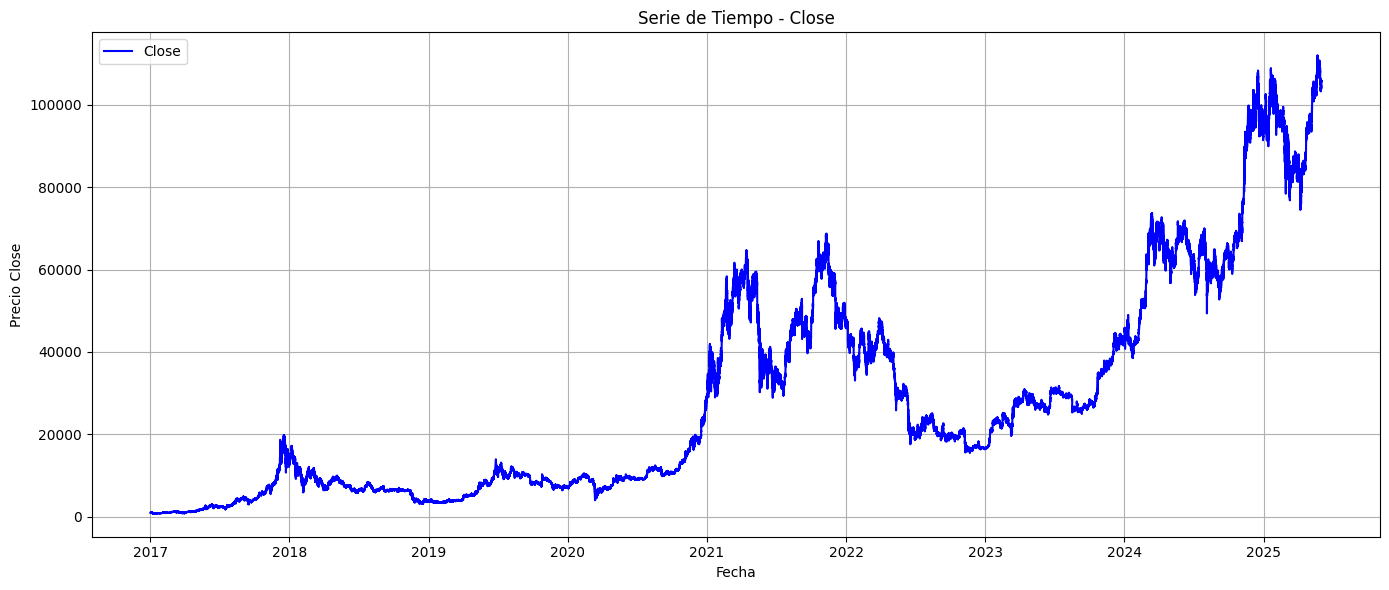

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(bin["Datetime"], bin["Close"], label="Close", color="blue")
plt.title("Serie de Tiempo - Close")
plt.xlabel("Fecha")
plt.ylabel("Precio Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Y

In [ ]:
delta = mf1['Close'].shift(-1) - mf1['Close']
tolerancia = mf1['Close'] * 0.0001

mf1['Y1_1'] = np.select(
    condlist=[
        delta > tolerancia,                          # Subida
        delta <= tolerancia,
    ],
    choicelist=[0, 1],
    default=np.nan
)

In [ ]:
# Ver el conteo de observaciones por clase en B1
conteo_clases = mf1['Y1_1'].value_counts(dropna=False)
print(conteo_clases)

#X

In [ ]:
delta = mf1['Close'].shift(1) - mf1['Close']
tolerancia = mf1['Close'] * 0.0001

mf1['B1'] = np.select(
    condlist=[
        delta > tolerancia,                          # Subida
        delta <= tolerancia,
    ],
    choicelist=[0, 1],
    default=np.nan
)

In [ ]:
# Ver el conteo de observaciones por clase en B1
conteo_clases = mf1['B1'].value_counts(dropna=False)
print(conteo_clases)

In [ ]:
import numpy as np

# Generar ruido blanco con media 0 y desviación estándar 1
np.random.seed(42)  # Para reproducibilidad
mf1['RB'] = np.random.normal(loc=0, scale=1, size=len(mf1))

#VB

In [ ]:
# Definir las ventanas para calcular volatilidad
ventanas_vol = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "8h": 96,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2160,
    "2s": 4320,
    "1m": 9132,
    "2m": 18264,
    "3m": 27369,
    "4m": 36528,
    "5m": 45660,
    "6m": 54792,
    "9m": 82188,
    "1a": 109575,
    "2a": 219150,
    "3a": 328725,
    "4a": 438300
}



# Calcular SD y Volatilidad (VB) para cada ventana
for nombre, ventana in ventanas_vol.items():
    sd_col = f"SD_{ventana}"
    vb_col = f"VB{nombre}"

    mf1[sd_col] = mf1["Close"].rolling(window=ventana, min_periods=ventana).std()
    mf1[vb_col] = mf1[sd_col] * np.sqrt(ventana)


**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'MC', 'Y1_1', 'SD_1', 'VB5', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", 'VB10', 'VB15', 'VB30', 'VB1h', 'VB2h', 'VB4h', 'VB6h', 'VB8h', 'VB12h',
             'VB1d', 'VB3d', 'VB4d', 'VB5d', 'VB1s', 'VB2s', 'VB1m', 'VB2m', 'VB3m',
             'VB4m', 'VB5m', 'VB6m', 'VB9m', 'VB1a', 'VB2a', 'VB3a', 'VB4a']

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
1      VB10            0.000834
7      VB6h            0.000536
8      VB8h            0.000285
4      VB1h            0.000281
11     VB3d            0.000114
9     VB12h            0.000054
2      VB15            0.000000
6      VB4h            0.000000
5      VB2h            0.000000
3      VB30            0.000000
0       VB5            0.000000
10     VB1d            0.000000
12     VB4d            0.000000
13     VB5d            0.000000
14     VB1s            0.000000
15     VB2s            0.000000
16     VB1m            0.000000
17     VB2m            0.000000
18     VB3m            0.000000
19     VB4m            0.000000
20     VB5m            0.000000
21     VB6m            0.000000
22     VB9m            0.000000
23     VB1a            0.000000
24     VB2a            0.000000
25     VB3a            0.000000
26     VB4a            0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'VB10', 'VB15', 'VB30', 'VB1h', 'VB2h', 'VB4h', 'VB6h', 'VB8h', 'VB12h',
          'VB1d', 'VB3d', 'VB4d', 'VB5d', 'VB1s', 'VB2s', 'VB1m', 'VB2m', 'VB3m',
          'VB4m', 'VB5m', 'VB6m', 'VB9m', 'VB1a', 'VB2a', 'VB3a', 'VB4a']

# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


KeyboardInterrupt: 

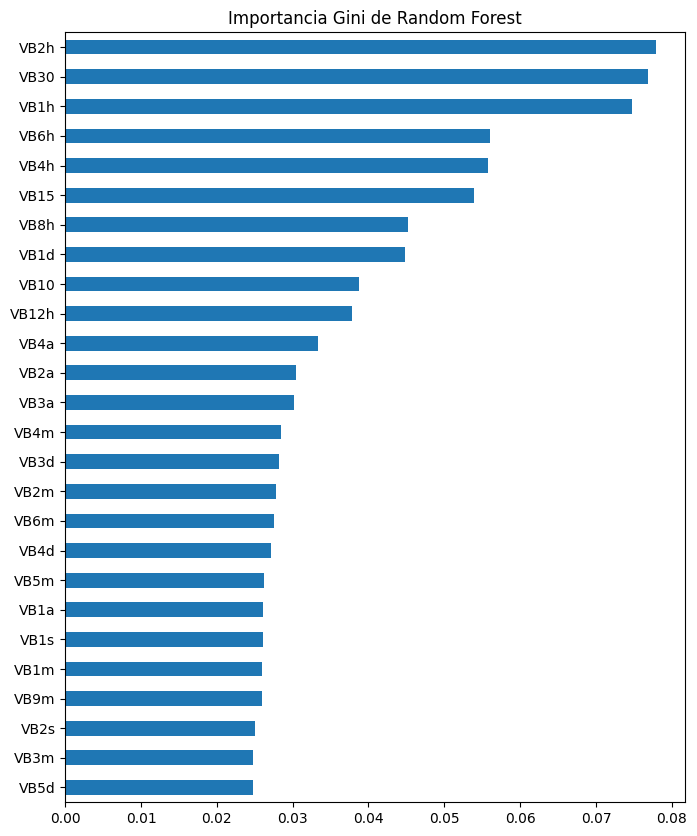

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


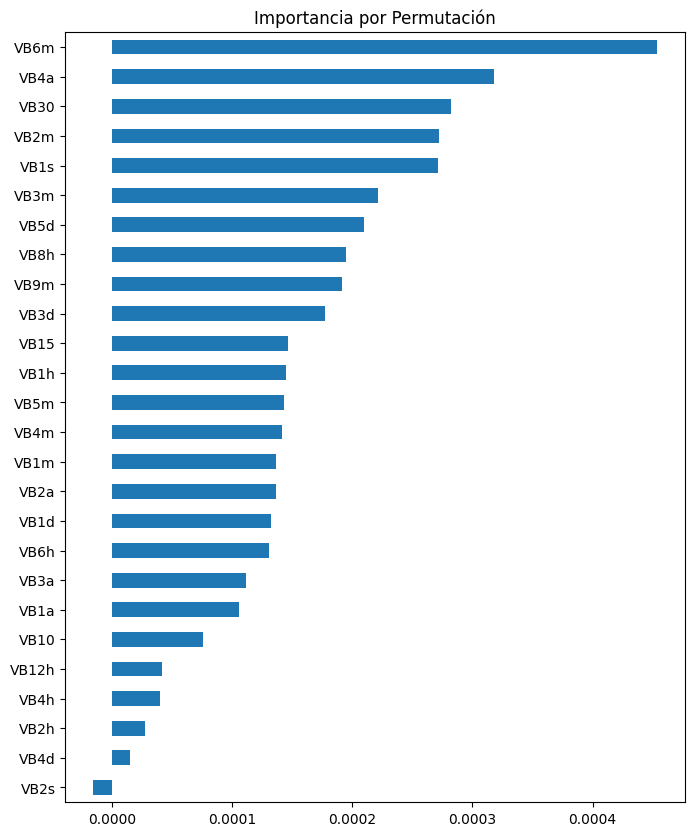

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB10_ratio_VB6h', 'VB10_grad_VB6h', 'VB10_zscore_VB6h', 'VB10_ratio_VB8h', 'VB10_grad_VB8h', 'VB10_zscore_VB8h', 'VB10_ratio_VB1s', 'VB10_grad_VB1s', 'VB10_zscore_VB1s', 'VB10_ratio_VB1m', 'VB10_grad_VB1m', 'VB10_zscore_VB1m', 'VB10_ratio_VB2m', 'VB10_grad_VB2m', 'VB10_zscore_VB2m', 'VB10_ratio_VB6m', 'VB10_grad_VB6m', 'VB10_zscore_VB6m', 'VB10_ratio_VB4a', 'VB10_grad_VB4a', 'VB10_zscore_VB4a', 'VB30_ratio_VB6h', 'VB30_grad_VB6h', 'VB30_zscore_VB6h', 'VB30_ratio_VB8h', 'VB30_grad_VB8h', 'VB30_zscore_VB8h', 'VB30_ratio_VB1s', 'VB30_grad_VB1s', 'VB30_zscore_VB1s', 'VB30_ratio_VB1m', 'VB30_grad_VB1m', 'VB30_zscore_VB1m', 'VB30_ratio_VB2m', 'VB30_grad_VB2m', 'VB30_zscore_VB2m', 'VB30_ratio_VB6m', 'VB30_grad_VB6m', 'VB30_zscore_VB6m', 'VB30_ratio_VB4a', 'VB30_grad_VB4a', 'VB30_zscore_VB4a', 'VB1h_ratio_VB6h', 'VB1h_grad_VB6h', 'VB1h_zscore_VB6h', 'VB1h_ratio_VB8h', 'VB1h_grad_VB8h', 'VB1h_zscore_VB8h', 'VB1h_ratio_VB1s', 'VB1h_grad_VB1s', 'VB1h_zscore_VB1s', 'VB1h_ratio_VB1m', 'VB1h_grad_VB1m', 'VB1h_zscore_VB1m', 'VB1h_ratio_VB2m', 'VB1h_grad_VB2m', 'VB1h_zscore_VB2m', 'VB1h_ratio_VB6m', 'VB1h_grad_VB6m', 'VB1h_zscore_VB6m', 'VB1h_ratio_VB4a', 'VB1h_grad_VB4a', 'VB1h_zscore_VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:10:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 7388 33746]
 [ 7046 41218]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.18      0.27     41134
           1       0.55      0.85      0.67     48264

    accuracy                           0.54     89398
   macro avg       0.53      0.52      0.47     89398
weighted avg       0.53      0.54      0.48     89398

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3750 16818]
 [ 3547 20585]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.18      0.27     20568
           1       0.55      0.85      0.67     24132

    accuracy                           0.54     44700
   macro avg       0.53      0.52      0.47     44700
weighted avg       0.53      0.54      0.49     44700



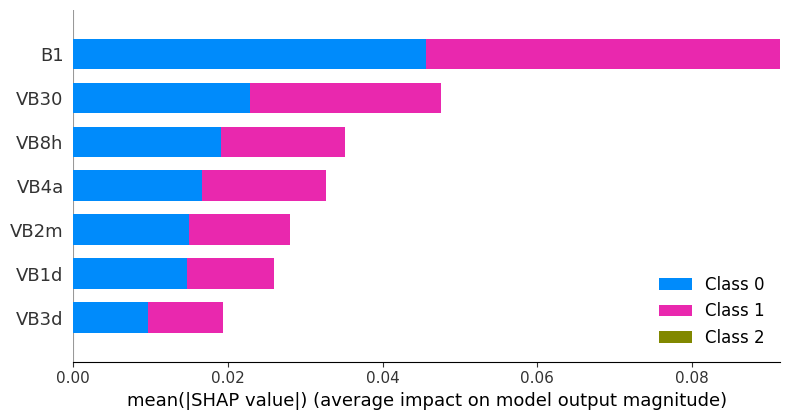

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


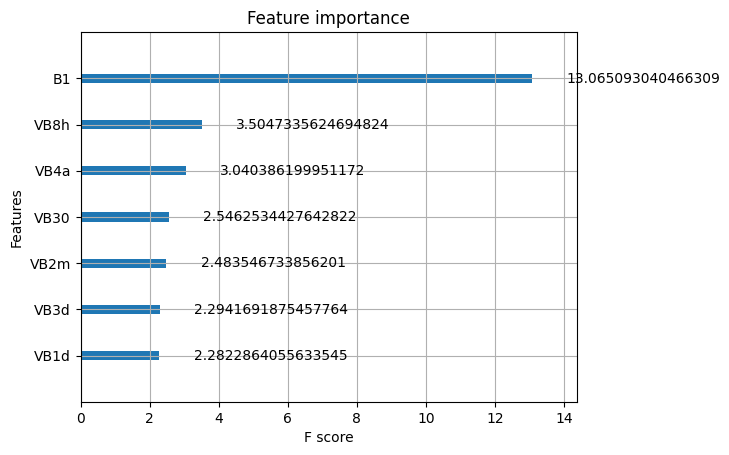

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


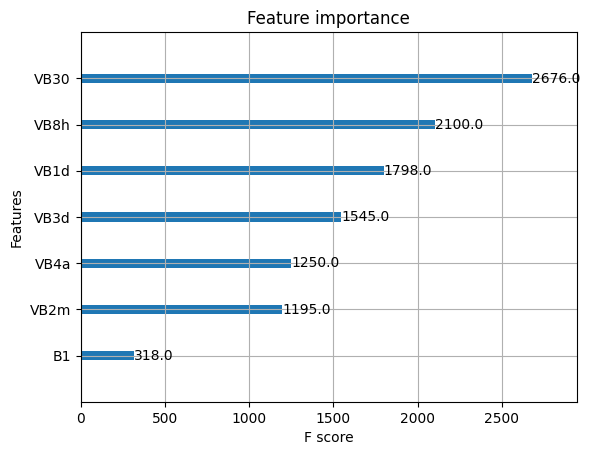

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


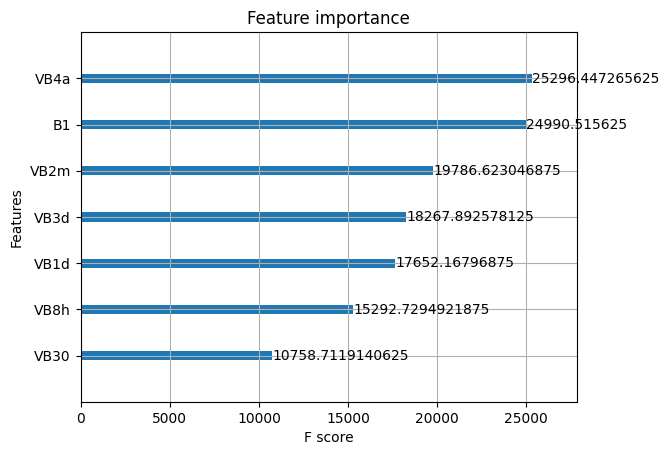

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

#VVo

In [ ]:
# Definir las ventanas para calcular volatilidad
ventanas_vol = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "8h": 96,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2160,
    "2s": 4320,
    "1m": 9132,
    "2m": 18264,
    "3m": 27369,
    "4m": 36528,
    "5m": 45660,
    "6m": 54792,
    "9m": 82188,
    "1a": 109575,
    "2a": 219150,
    "3a": 328725,
    "4a": 438300
}
# Calcular SD y Volatilidad (VB) para cada ventana
for nombre, ventana in ventanas_vol.items():
    vosd_col = f"VoSD_{ventana}"
    vvo_col = f"VVo{nombre}"

    mf1[vosd_col] = mf1["Volume"].rolling(window=ventana, min_periods=ventana).std()
    mf1[vvo_col] = mf1[vosd_col] * np.sqrt(ventana)

/tmp/ipython-input-13-4243245932.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vosd_col] = mf1["Volume"].rolling(window=ventana, min_periods=ventana).std()
/tmp/ipython-input-13-4243245932.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vvo_col] = mf1[vosd_col] * np.sqrt(ventana)
/tmp/ipython-input-13-4243245932.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'MC', 'Y1_1', 'SD_1', 'VB5', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo8h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m", "VVo3m", "VVo4m", "VVo5m",
 "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
3     VVo1h            0.001141
6     VVo6h            0.001090
0     VVo10            0.000881
2     VVo30            0.000382
8    VVo12h            0.000219
9     VVo1d            0.000184
1     VVo15            0.000124
4     VVo2h            0.000042
7     VVo8h            0.000035
5     VVo4h            0.000000
10    VVo3d            0.000000
11    VVo4d            0.000000
12    VVo5d            0.000000
13    VVo1s            0.000000
14    VVo2s            0.000000
15    VVo1m            0.000000
16    VVo2m            0.000000
17    VVo3m            0.000000
18    VVo4m            0.000000
19    VVo5m            0.000000
20    VVo6m            0.000000
21    VVo9m            0.000000
22    VVo1a            0.000000
23    VVo2a            0.000000
24    VVo3a            0.000000
25    VVo4a            0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", "VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo8h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m", "VVo3m", "VVo4m", "VVo5m",
 "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]

# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

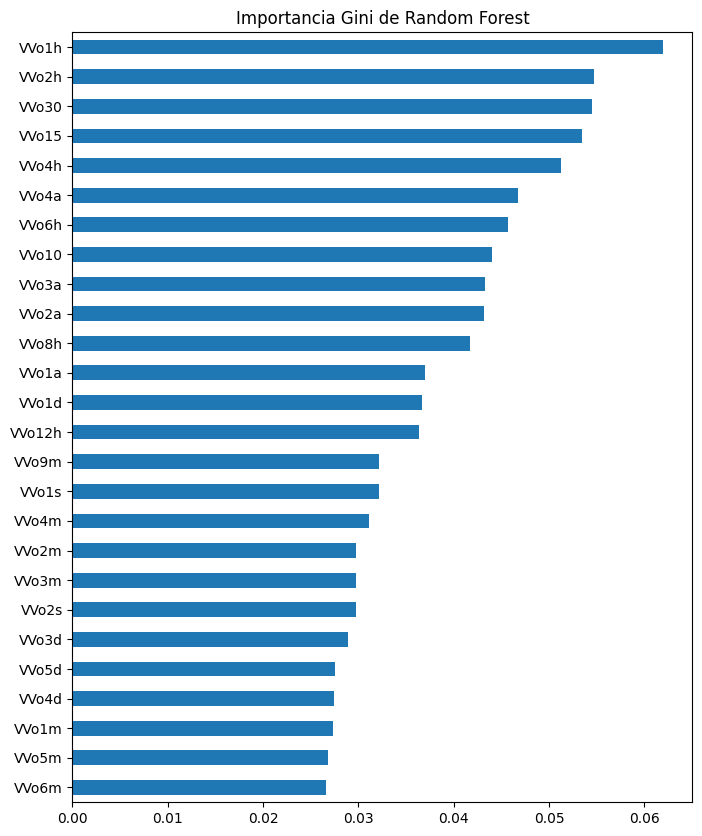

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


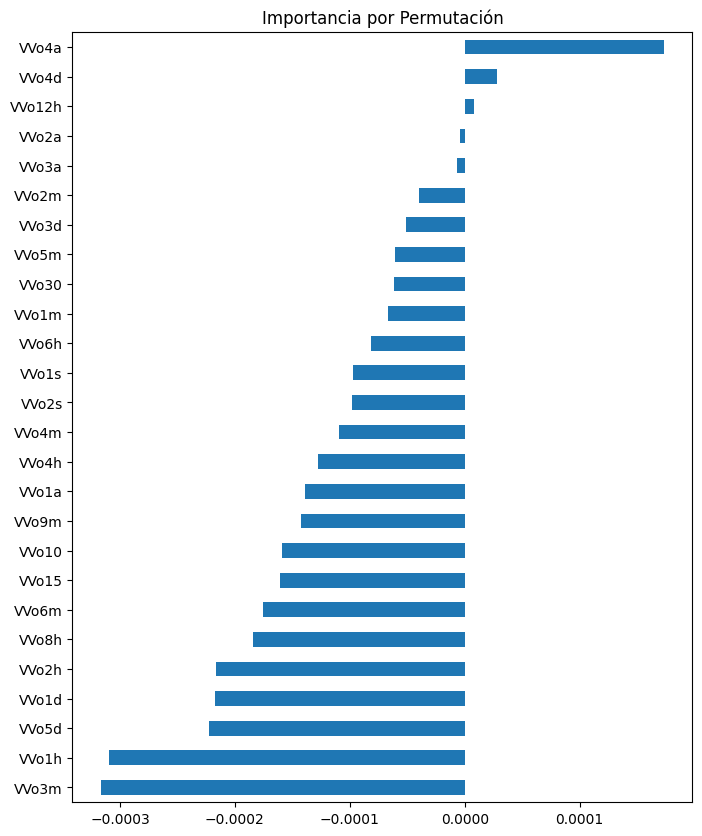

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",  'VVo10_ratio_VVo4h', 'VVo10_grad_VVo4h', 'VVo10_zscore_VVo4h',
            'VVo10_ratio_VVo6h', 'VVo10_grad_VVo6h', 'VVo10_zscore_VVo6h',
            'VVo10_ratio_VVo1d', 'VVo10_grad_VVo1d', 'VVo10_zscore_VVo1d',
            'VVo10_ratio_VVo1m', 'VVo10_grad_VVo1m', 'VVo10_zscore_VVo1m',
            'VVo10_ratio_VVo6m', 'VVo10_grad_VVo6m', 'VVo10_zscore_VVo6m',
            'VVo30_ratio_VVo4h', 'VVo30_grad_VVo4h', 'VVo30_zscore_VVo4h',
            'VVo30_ratio_VVo6h', 'VVo30_grad_VVo6h', 'VVo30_zscore_VVo6h',
            'VVo30_ratio_VVo1d', 'VVo30_grad_VVo1d', 'VVo30_zscore_VVo1d',
            'VVo30_ratio_VVo1m', 'VVo30_grad_VVo1m', 'VVo30_zscore_VVo1m',
            'VVo30_ratio_VVo6m', 'VVo30_grad_VVo6m', 'VVo30_zscore_VVo6m',
            'VVo1h_ratio_VVo4h', 'VVo1h_grad_VVo4h', 'VVo1h_zscore_VVo4h',
            'VVo1h_ratio_VVo6h', 'VVo1h_grad_VVo6h', 'VVo1h_zscore_VVo6h',
            'VVo1h_ratio_VVo1d', 'VVo1h_grad_VVo1d', 'VVo1h_zscore_VVo1d',
            'VVo1h_ratio_VVo1m', 'VVo1h_grad_VVo1m', 'VVo1h_zscore_VVo1m', 'VVo1h_ratio_VVo6m', 'VVo1h_grad_VVo6m', 'VVo1h_zscore_VVo6m']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[24950 52327]
 [20704 68119]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.55      0.32      0.41     77277
           1       0.57      0.77      0.65     88823

    accuracy                           0.56    166100
   macro avg       0.56      0.54      0.53    166100
weighted avg       0.56      0.56      0.54    166100

📊 MATRIZ DE CONFUSIÓN (TEST):
[[12579 26060]
 [10525 33887]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.54      0.33      0.41     38639
           1       0.57      0.76      0.65     44412

    accuracy                           0.56     83051
   macro avg       0.55      0.54      0.53     83051
weighted avg       0.56      0.56      0.54     83051



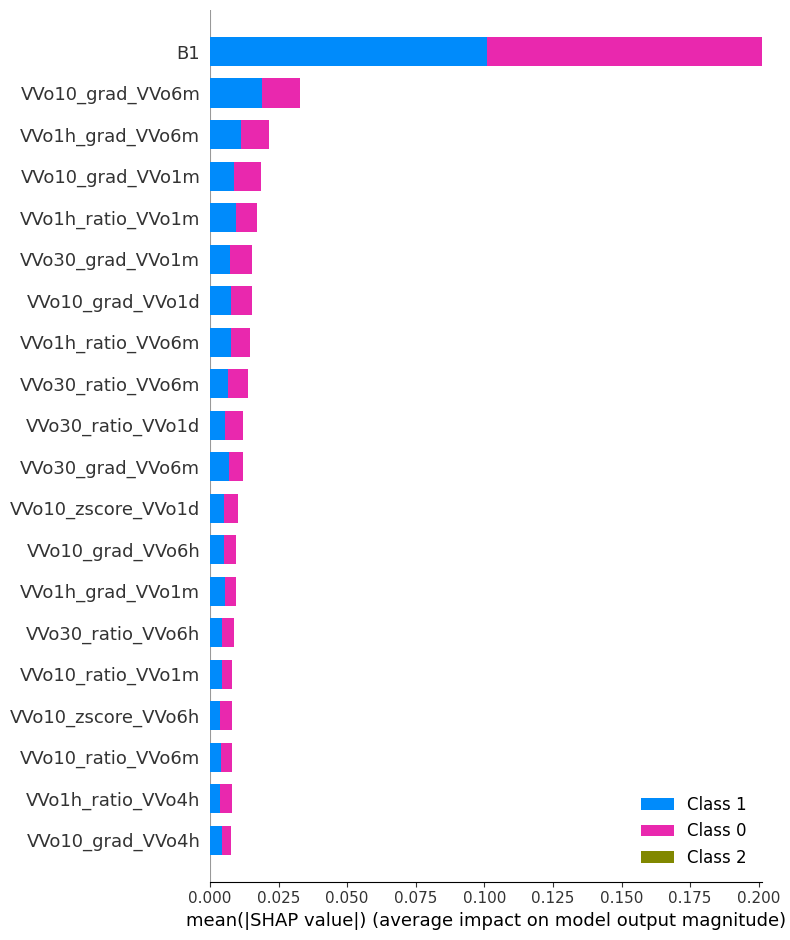

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


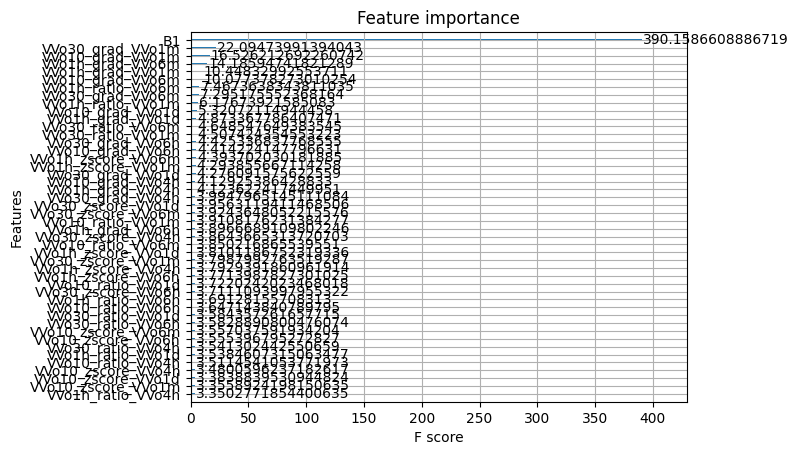

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


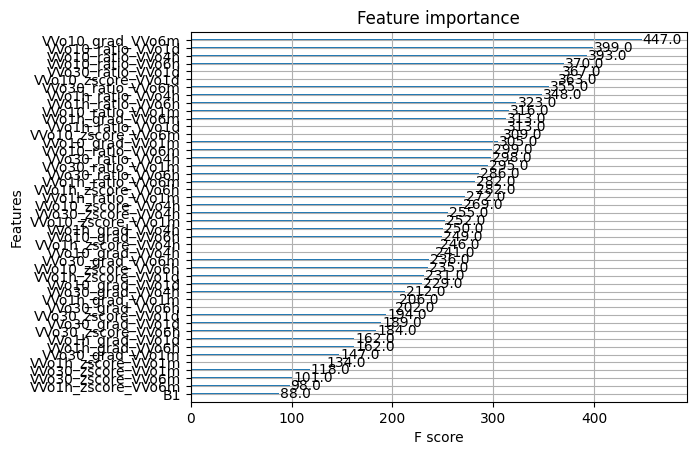

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


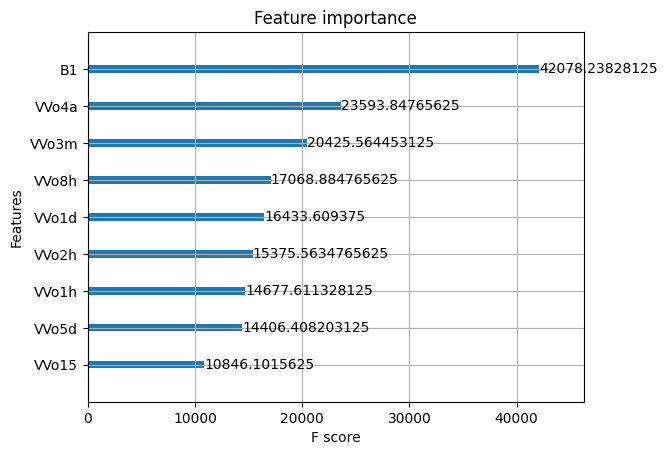

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

#VQ

In [ ]:
mf1["QBpc"] =  (mf1["Volume"] / mf1["Close"])

/tmp/ipython-input-14-2724450933.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["QBpc"] =  (mf1["Volume"] / mf1["Close"])


In [ ]:
# Definir las ventanas para calcular volatilidad
ventanas_vol = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "8h": 96,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2160,
    "2s": 4320,
    "1m": 9132,
    "2m": 18264,
    "3m": 27369,
    "4m": 36528,
    "5m": 45660,
    "6m": 54792,
    "9m": 82188,
    "1a": 109575,
    "2a": 219150,
    "3a": 328725,
    "4a": 438300
}
# Calcular SD y Volatilidad (VB) para cada ventana
for nombre, ventana in ventanas_vol.items():
    vosd_col = f"VoSD_{ventana}"
    vvo_col = f"VQ{nombre}"

    mf1[vosd_col] = mf1["QBpc"].rolling(window=ventana, min_periods=ventana).std()
    mf1[vvo_col] = mf1[vosd_col] * np.sqrt(ventana)

/tmp/ipython-input-15-297400012.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vvo_col] = mf1[vosd_col] * np.sqrt(ventana)
/tmp/ipython-input-15-297400012.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vvo_col] = mf1[vosd_col] * np.sqrt(ventana)
/tmp/ipython-input-15-297400012.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", 'VQ10', 'VQ15', 'VQ30', 'VQ1h', 'VQ2h', 'VQ4h', 'VQ6h', 'VQ8h',
             'VQ12h', 'VQ1d', 'VQ3d', 'VQ4d', 'VQ5d', 'VQ1s', 'VQ2s', 'VQ1m',
             'VQ2m', 'VQ3m', 'VQ4m', 'VQ5m', 'VQ6m', 'VQ9m', 'VQ1a', 'VQ2a', 'VQ3a', 'VQ4a']

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
4      VQ1h            0.001350
2      VQ15            0.000284
5      VQ2h            0.000187
6      VQ4h            0.000001
0        RB            0.000000
1      VQ10            0.000000
3      VQ30            0.000000
7      VQ6h            0.000000
8      VQ8h            0.000000
9     VQ12h            0.000000
10     VQ1d            0.000000
11     VQ3d            0.000000
12     VQ4d            0.000000
13     VQ5d            0.000000
14     VQ1s            0.000000
15     VQ2s            0.000000
16     VQ1m            0.000000
17     VQ2m            0.000000
18     VQ3m            0.000000
19     VQ4m            0.000000
20     VQ5m            0.000000
21     VQ6m            0.000000
22     VQ9m            0.000000
23     VQ1a            0.000000
24     VQ2a            0.000000
25     VQ3a            0.000000
26     VQ4a            0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", "VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo8h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m", "VVo3m", "VVo4m", "VVo5m",
 "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]

# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

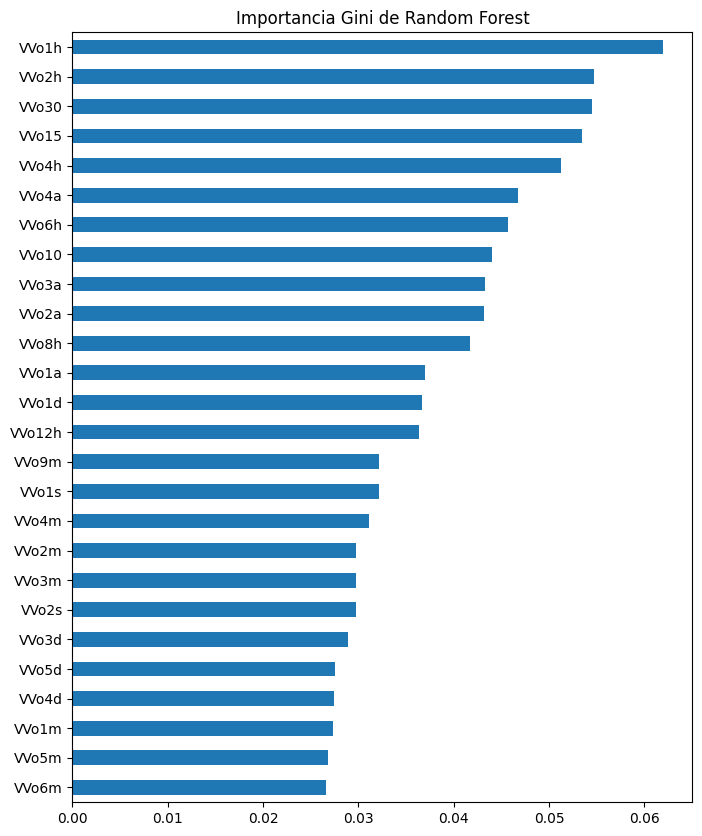

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


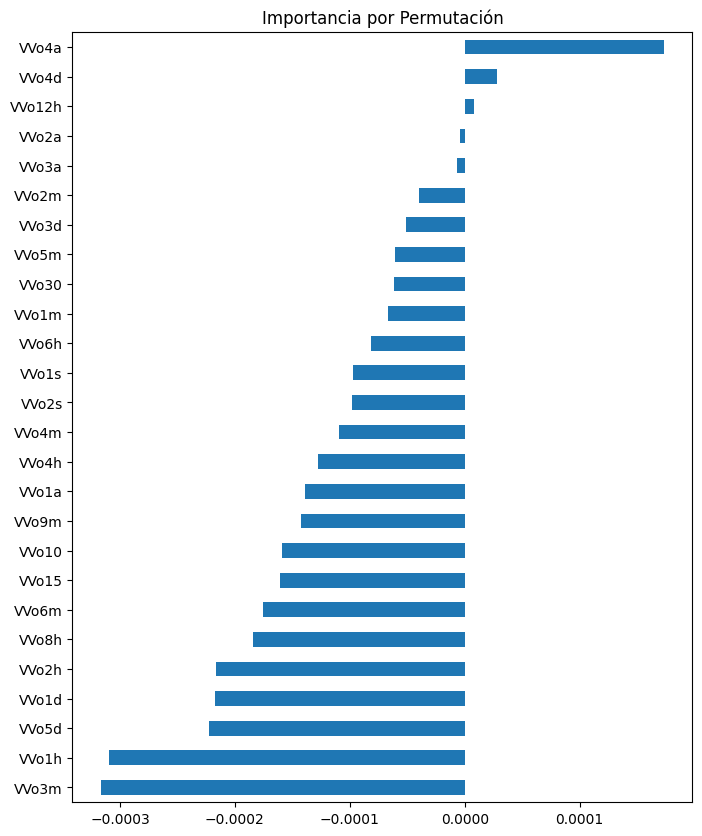

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",  'VVo10_ratio_VVo4h', 'VVo10_grad_VVo4h', 'VVo10_zscore_VVo4h',
            'VVo10_ratio_VVo6h', 'VVo10_grad_VVo6h', 'VVo10_zscore_VVo6h',
            'VVo10_ratio_VVo1d', 'VVo10_grad_VVo1d', 'VVo10_zscore_VVo1d',
            'VVo10_ratio_VVo1m', 'VVo10_grad_VVo1m', 'VVo10_zscore_VVo1m',
            'VVo10_ratio_VVo6m', 'VVo10_grad_VVo6m', 'VVo10_zscore_VVo6m',
            'VVo30_ratio_VVo4h', 'VVo30_grad_VVo4h', 'VVo30_zscore_VVo4h',
            'VVo30_ratio_VVo6h', 'VVo30_grad_VVo6h', 'VVo30_zscore_VVo6h',
            'VVo30_ratio_VVo1d', 'VVo30_grad_VVo1d', 'VVo30_zscore_VVo1d',
            'VVo30_ratio_VVo1m', 'VVo30_grad_VVo1m', 'VVo30_zscore_VVo1m',
            'VVo30_ratio_VVo6m', 'VVo30_grad_VVo6m', 'VVo30_zscore_VVo6m',
            'VVo1h_ratio_VVo4h', 'VVo1h_grad_VVo4h', 'VVo1h_zscore_VVo4h',
            'VVo1h_ratio_VVo6h', 'VVo1h_grad_VVo6h', 'VVo1h_zscore_VVo6h',
            'VVo1h_ratio_VVo1d', 'VVo1h_grad_VVo1d', 'VVo1h_zscore_VVo1d',
            'VVo1h_ratio_VVo1m', 'VVo1h_grad_VVo1m', 'VVo1h_zscore_VVo1m', 'VVo1h_ratio_VVo6m', 'VVo1h_grad_VVo6m', 'VVo1h_zscore_VVo6m']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[24950 52327]
 [20704 68119]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.55      0.32      0.41     77277
           1       0.57      0.77      0.65     88823

    accuracy                           0.56    166100
   macro avg       0.56      0.54      0.53    166100
weighted avg       0.56      0.56      0.54    166100

📊 MATRIZ DE CONFUSIÓN (TEST):
[[12579 26060]
 [10525 33887]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.54      0.33      0.41     38639
           1       0.57      0.76      0.65     44412

    accuracy                           0.56     83051
   macro avg       0.55      0.54      0.53     83051
weighted avg       0.56      0.56      0.54     83051



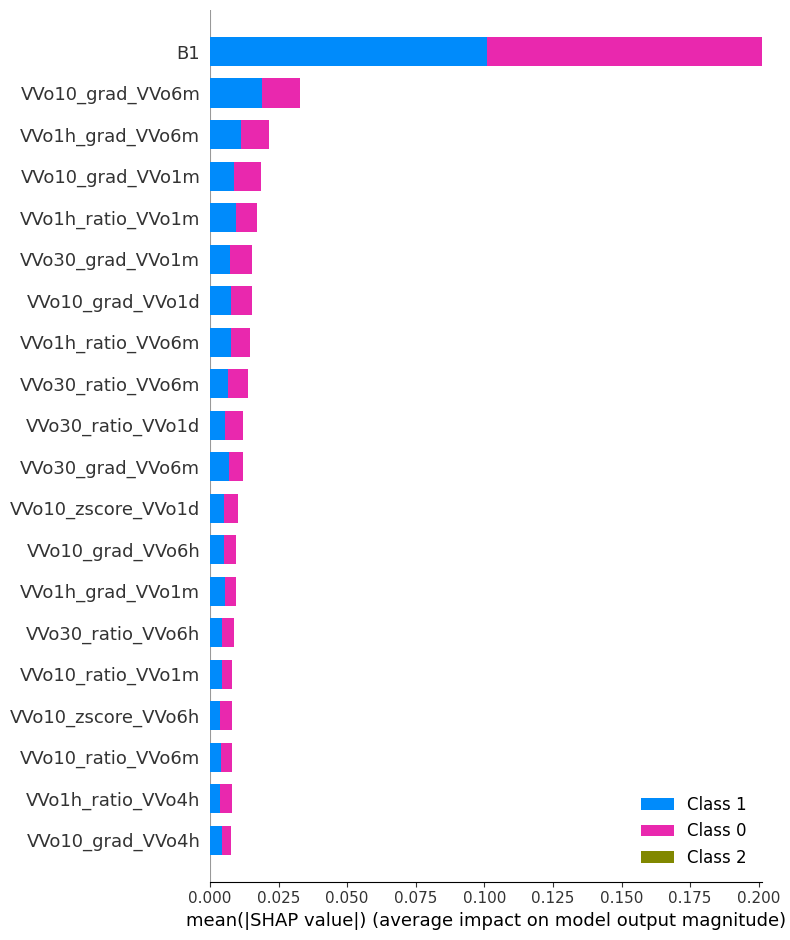

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


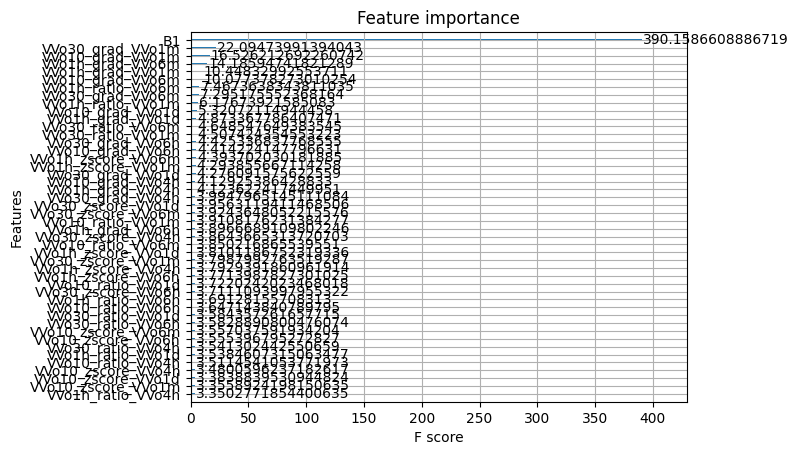

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


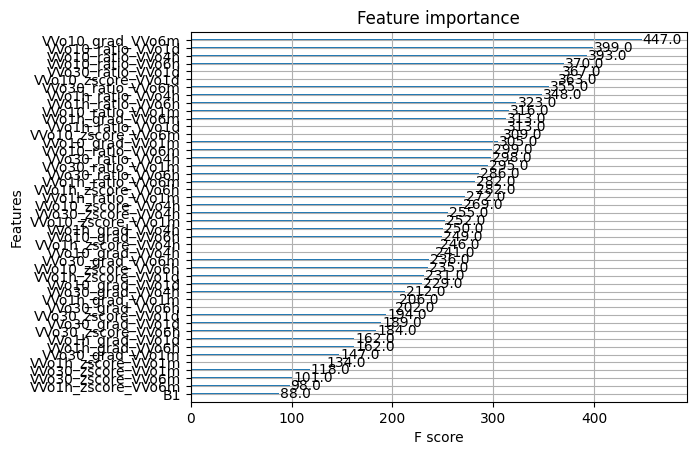

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


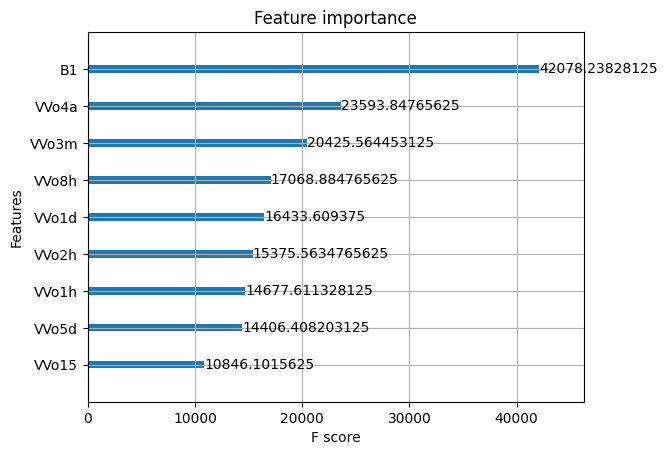

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

#VOLATIGAMES

Smas

In [ ]:
ventanas = {
    '30': 6,
    '1h': 12,
    '2h': 24,
    '6h': 72,
    '1d': 288,
    '1s': 2016,
    '2m': 16128,
}

for label in ventanas.keys():
    sma_col = f'VB10_sma{label}'
    diff_col = f'VB10_{label}'
    if sma_col in mf1.columns:
        mf1[diff_col] = mf1['VB10'] - mf1[sma_col]


In [ ]:
#"VB10_30", "VB10_2h"

In [ ]:
ventanas = {
    '30': 6,
    '1h': 12,
    '2h': 24,
    '6h': 72,
    '1d': 288,
    '1s': 2016,
    '2m': 16128,
}

for label in ventanas.keys():
    sma_col = f'VVo10_sma{label}'
    diff_col = f'VVo10_{label}'
    if sma_col in mf1.columns:
        mf1[diff_col] = mf1['VVo10'] - mf1[sma_col]


In [ ]:
#"VVo10_1s", despues la de 2meses y la de 30 minutos, probablemente el pico este
#cerca de 1s, capaz 2 semanas, o un mes, por la distribucion del permutation

Categoricas f(distribucion empirica)

In [ ]:
# Discretizar en terciles y manejar posibles NaN antes de convertir a int
vb_cut = pd.qcut(mf1['VB10'], q=3, labels=[1, 2, 3])
vvo_cut = pd.qcut(mf1['VVo10'], q=3, labels=[1, 2, 3])

# Convertir a int solo donde no hay NaN
mf1['VB_num'] = vb_cut.cat.codes.replace(-1, np.nan) + 1
mf1['VVo_num'] = vvo_cut.cat.codes.replace(-1, np.nan) + 1

# Crear el régimen (también asegurando que no se propague NaN)
mf1['VB_VVo_regimen'] = ((mf1['VB_num'] - 1) * 3 + mf1['VVo_num']).astype('Int64')


/tmp/ipython-input-63-774386028.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['VB_num'] = vb_cut.cat.codes.replace(-1, np.nan) + 1
/tmp/ipython-input-63-774386028.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['VVo_num'] = vvo_cut.cat.codes.replace(-1, np.nan) + 1
/tmp/ipython-input-63-774386028.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

Difernciadas

In [ ]:
mf1["VoC1"] = mf1["c2"] / (mf1["VVo10"] + 1e-8)

/tmp/ipython-input-21-3347707923.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoC1"] = mf1["c2"] / (mf1["VVo10"] + 1e-8)


In [ ]:
mf1["VoC2"] = mf1["c2"] / (mf1["VVo10_1h"] + 1e-8)

KeyError: 'VVo10_1h'

In [ ]:
mf1["VoV1"] = mf1["v2"] / (mf1["VB10"] + 1e-8)

KeyError: 'v2'

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "VoC1", "VB_VVo_regimen", "QBpc", "VVo10_30", "VVo10_1h",
             "VVo10_2h", "VVo10_6h", "VVo10_1d", "VVo10_1s", "VVo10_2m", "VB10_30",
             "VB10_1h", "VB10_2h", "VB10_6h", "VB10_1d", "VB10_1s", "VB10_2m"
]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


          Variable  Mutual Information
4   VB_VVo_regimen            0.011052
3             VoC1            0.006050
5             QBpc            0.002400
14         VB10_1h            0.000954
8         VVo10_2h            0.000453
17         VB10_1d            0.000404
13         VB10_30            0.000351
19         VB10_2m            0.000331
10        VVo10_1d            0.000312
15         VB10_2h            0.000285
2             VoC2            0.000249
12        VVo10_2m            0.000246
7         VVo10_1h            0.000209
16         VB10_6h            0.000161
6         VVo10_30            0.000039
18         VB10_1s            0.000019
0               RB            0.000000
1             VoV1            0.000000
11        VVo10_1s            0.000000
9         VVo10_6h            0.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "VoC1", "VB_VVo_regimen", "QBpc", "QBpc_VoC1_comb"]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


         Variable  Mutual Information
2  VB_VVo_regimen            0.011616
4  QBpc_VoC1_comb            0.008559
1            VoC1            0.007403
3            QBpc            0.002407
0              RB            0.000000


In [ ]:
mf1["QBpc_VoC1_comb"] = mf1["QBpc"] * mf1["VoC1"]

/tmp/ipython-input-44-2726310161.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["QBpc_VoC1_comb"] = mf1["QBpc"] * mf1["VoC1"]


In [ ]:
mf1["q2"] = mf1["QBpc"].diff()

/tmp/ipython-input-48-210179479.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["q2"] = mf1["QBpc"].diff()


In [ ]:
mf1["VoV1"] = mf1["q2"] / (mf1["VB10"] + 1e-8)

/tmp/ipython-input-49-3854017084.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoV1"] = mf1["q2"] / (mf1["VB10"] + 1e-8)


In [ ]:
mf1["VoC1"] = mf1["c2"] / (mf1["VVo10"] + 1e-8)

/tmp/ipython-input-18-3347707923.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoC1"] = mf1["c2"] / (mf1["VVo10"] + 1e-8)


In [ ]:
mf1["VoV2"] = mf1["q2"] / (mf1["VB10"].shift(1) + 1e-8)

/tmp/ipython-input-51-3290183017.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoV2"] = mf1["q2"] / (mf1["VB10"].shift(1) + 1e-8)


In [ ]:
mf1["VoC2"] = mf1["c2"] / (mf1["VVo10"].shift(1) + 1e-8)

In [ ]:
mf1["VoC3"] = mf1["c2"] / (mf1["VVo10"] + mf1["VVo10"].shift(1) + 1e-8)

/tmp/ipython-input-58-408146652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoC3"] = mf1["c2"] / (mf1["VVo10"] + mf1["VVo10"].shift(1) + 1e-8)


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "VoV1", "VoC1" , "VoC3", "VoC2"]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


  Variable  Mutual Information
2     VoC1            0.007002
3     VoC3            0.006261
4     VoC2            0.006198
0       RB            0.000000
1     VoV1            0.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["VoC2", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "VoC2"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7217  , p=0.1895  , df_denom=885305, df_num=1
ssr based chi2 test:   chi2=1.7217  , p=0.1895  , df=1
likelihood ratio test: chi2=1.7217  , p=0.1895  , df=1
parameter F test:         F=1.7217  , p=0.1895  , df_denom=885305, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6889  , p=0.1847  , df_denom=885302, df_num=2
ssr based chi2 test:   chi2=3.3779  , p=0.1847  , df=2
likelihood ratio test: chi2=3.3778  , p=0.1847  , df=2
parameter F test:         F=1.6889  , p=0.1847  , df_denom=885302, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6237  , p=0.1815  , df_denom=885299, df_num=3
ssr based chi2 test:   chi2=4.8712  , p=0.1815  , df=3
likelihood ratio test: chi2=4.8712  , p=0.1815  , df=3
parameter F test:         F=1.6237  , p=0.1815  , df_denom=885299, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Filtramos
df_auc = mf1[["VoC2", "Y1_1"]].dropna()

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(df_auc[["VoC2"]], df_auc["Y1_1"], test_size=0.3, random_state=42)

# AUC
auc_score = roc_auc_score(y_test, X_test["VoC2"])

print(f"AUC usando solo VoC2: {auc_score:.4f}")


AUC usando solo VoC2: 0.5567


In [ ]:
# "VB_VVo_regimen" etiqueta interactiva o de contexto, MI decente,
# MI decente, Gragner bueno, AUC malo = 0.48

# "Voc1"
# MI malo, Gragner malo, AUC bueno = 0.55

# "QBpc"
# MI malo, Gragner bueno, AUC malo = 0.48



# "VB_VVo_regimen",

*ratio, zcore y grado*

In [ ]:
def VoVProcessorInline(mf1, short_terms=None, long_terms=None, eps=1e-8):
    if short_terms is None:
        short_terms = ['VB10', 'VB30', 'VB1h']
    if long_terms is None:
        long_terms = ['VB6h', 'VB8h', 'VB1s', 'VB1m', 'VB2m', 'VB6m', 'VB4a']

    for s in short_terms:
        for l in long_terms:
            if s in mf1.columns and l in mf1.columns:
                # Ratio
                ratio_col = f"{s}_ratio_{l}"
                mf1[ratio_col] = mf1[s] / (mf1[l] + eps)

                # Gradiente
                grad_col = f"{s}_grad_{l}"
                mf1[grad_col] = mf1[s] - mf1[l]

                # Z-score con rolling std
                z_col = f"{s}_zscore_{l}"
                rolling_std = mf1[l].rolling(window=288, min_periods=20).std()
                mf1[z_col] = (mf1[s] - mf1[l]) / (rolling_std + eps)

    return mf1
mf1 = VoVProcessorInline(mf1)


/tmp/ipython-input-23-2980607895.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[ratio_col] = mf1[s] / (mf1[l] + eps)
/tmp/ipython-input-23-2980607895.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[grad_col] = mf1[s] - mf1[l]
/tmp/ipython-input-23-2980607895.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB",'VVo10_30', 'VVo10_1h', 'VVo10_2h', 'VVo10_6h', 'VVo10_1d', 'VVo10_1s', 'VVo10_2m']
# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

   Variable  Mutual Information
3  VVo10_2h            0.000450
5  VVo10_1d            0.000319
7  VVo10_2m            0.000278
2  VVo10_1h            0.000207
1  VVo10_30            0.000039
0        RB            0.000000
4  VVo10_6h            0.000000
6  VVo10_1s            0.000000


In [ ]:
def VoVProcessorInline(mf1, short_terms=None, long_terms=None, eps=1e-8):
    if short_terms is None:
        short_terms = ['VVo10', 'VVo30', 'VVo1h']
    if long_terms is None:
        long_terms = ['VVo4h', 'VVo6h', 'VVo1d', 'VVo1m', 'VVo6m']

    for s in short_terms:
        for l in long_terms:
            if s in mf1.columns and l in mf1.columns:
                # Ratio
                ratio_col = f"{s}_ratio_{l}"
                mf1[ratio_col] = mf1[s] / (mf1[l] + eps)

                # Gradiente
                grad_col = f"{s}_grad_{l}"
                mf1[grad_col] = mf1[s] - mf1[l]

                # Z-score con rolling std
                z_col = f"{s}_zscore_{l}"
                rolling_std = mf1[l].rolling(window=288, min_periods=20).std()
                mf1[z_col] = (mf1[s] - mf1[l]) / (rolling_std + eps)

    return mf1
mf1 = VoVProcessorInline(mf1)


/tmp/ipython-input-16-1533235062.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[grad_col] = mf1[s] - mf1[l]
/tmp/ipython-input-16-1533235062.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[z_col] = (mf1[s] - mf1[l]) / (rolling_std + eps)


In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoSD_9132', 'VVo1m', 'VoSD_18264', 'VVo2m', 'VoSD_27369', 'VVo3m', 'VoSD_36528', 'VVo4m', 'VoSD_45660', 'VVo5m', 'VoSD_54792', 'VVo6m', 'VoSD_82188', 'VVo9m', 'VoSD_109575', 'VVo1a', 'VoSD_219150', 'VVo2a', 'VoSD_328725', 'VVo3a', 'VoSD_438300', 'VVo4a', 'VVo10_ratio_VVo4h', 'VVo10_grad_VVo4h', 'VVo10_zscore_VVo4h', 'VVo10_ratio_VVo6h', 'VVo10_grad_VVo6h', 'VVo10_zscore_VVo6h', 'VVo10_ratio_VVo1d', 'VVo10_grad_VVo1d', 'VVo10_zscore_VVo1d', 'VVo10_ratio_VVo1m', 'VVo10_grad_VVo1m', 'VVo10_zsco

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB",  'VVo10_ratio_VVo4h', 'VVo10_grad_VVo4h', 'VVo10_zscore_VVo4h',
            'VVo10_ratio_VVo6h', 'VVo10_grad_VVo6h', 'VVo10_zscore_VVo6h',
            'VVo10_ratio_VVo1d', 'VVo10_grad_VVo1d', 'VVo10_zscore_VVo1d',
            'VVo10_ratio_VVo1m', 'VVo10_grad_VVo1m', 'VVo10_zscore_VVo1m',
            'VVo10_ratio_VVo6m', 'VVo10_grad_VVo6m', 'VVo10_zscore_VVo6m',
            'VVo30_ratio_VVo4h', 'VVo30_grad_VVo4h', 'VVo30_zscore_VVo4h',
            'VVo30_ratio_VVo6h', 'VVo30_grad_VVo6h', 'VVo30_zscore_VVo6h',
            'VVo30_ratio_VVo1d', 'VVo30_grad_VVo1d', 'VVo30_zscore_VVo1d',
            'VVo30_ratio_VVo1m', 'VVo30_grad_VVo1m', 'VVo30_zscore_VVo1m',
            'VVo30_ratio_VVo6m', 'VVo30_grad_VVo6m', 'VVo30_zscore_VVo6m',
            'VVo1h_ratio_VVo4h', 'VVo1h_grad_VVo4h', 'VVo1h_zscore_VVo4h',
            'VVo1h_ratio_VVo6h', 'VVo1h_grad_VVo6h', 'VVo1h_zscore_VVo6h',
            'VVo1h_ratio_VVo1d', 'VVo1h_grad_VVo1d', 'VVo1h_zscore_VVo1d',
            'VVo1h_ratio_VVo1m', 'VVo1h_grad_VVo1m', 'VVo1h_zscore_VVo1m', 'VVo1h_ratio_VVo6m', 'VVo1h_grad_VVo6m', 'VVo1h_zscore_VVo6m']

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


              Variable  Mutual Information
13   VVo10_ratio_VVo6m            0.001360
8     VVo10_grad_VVo1d            0.000837
16   VVo30_ratio_VVo4h            0.000820
11    VVo10_grad_VVo1m            0.000818
28   VVo30_ratio_VVo6m            0.000648
9   VVo10_zscore_VVo1d            0.000584
7    VVo10_ratio_VVo1d            0.000568
14    VVo10_grad_VVo6m            0.000553
15  VVo10_zscore_VVo6m            0.000532
40   VVo1h_ratio_VVo1m            0.000520
43   VVo1h_ratio_VVo6m            0.000502
36  VVo1h_zscore_VVo6h            0.000482
35    VVo1h_grad_VVo6h            0.000410
1    VVo10_ratio_VVo4h            0.000407
20    VVo30_grad_VVo6h            0.000384
21  VVo30_zscore_VVo6h            0.000373
44    VVo1h_grad_VVo6m            0.000354
37   VVo1h_ratio_VVo1d            0.000346
25   VVo30_ratio_VVo1m            0.000336
34   VVo1h_ratio_VVo6h            0.000287
30  VVo30_zscore_VVo6m            0.000222
38    VVo1h_grad_VVo1d            0.000196
3   VVo10_z

*SHAP ZONE*

Cantidad de muestras: 869183


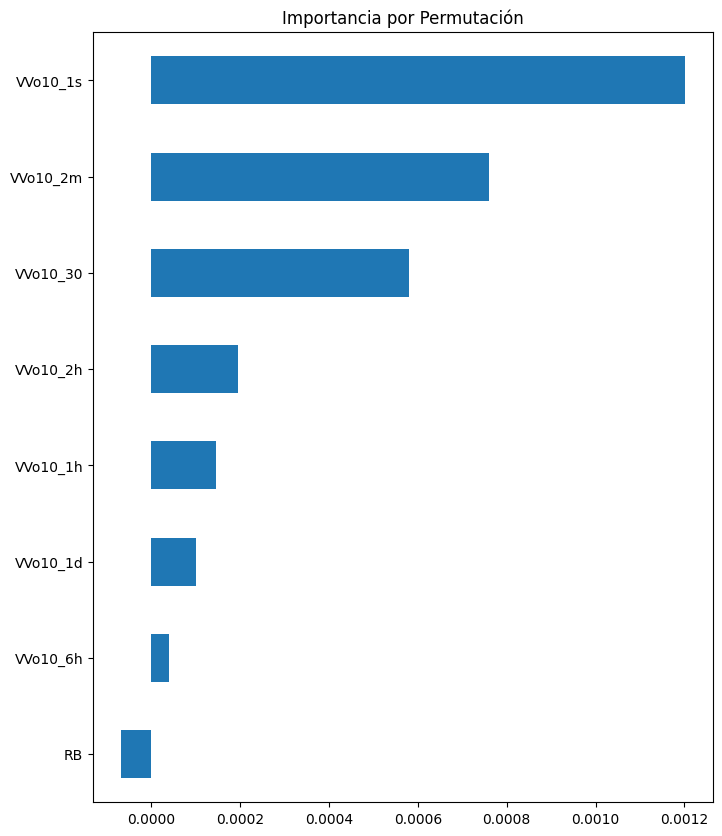

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'c2', 'VoC1','v2', 'VoV1', 'VB_VVo_regimen', "VB10_30", "VB10_2h", "VVo10_1s"]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1","RB", 'c2', 'VoC1','v2', 'VoV1', 'VB_VVo_regimen', "VB10_30", "VB10_2h", "VVo10_1s"]

target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:35:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[29771 52572]
 [23932 70384]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.55      0.36      0.44     82343
           1       0.57      0.75      0.65     94316

    accuracy                           0.57    176659
   macro avg       0.56      0.55      0.54    176659
weighted avg       0.56      0.57      0.55    176659

📊 MATRIZ DE CONFUSIÓN (TEST):
[[14879 26292]
 [12075 35084]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.55      0.36      0.44     41171
           1       0.57      0.74      0.65     47159

    accuracy                           0.57     88330
   macro avg       0.56      0.55      0.54     88330
weighted avg       0.56      0.57      0.55     88330



/tmp/ipython-input-42-3080331741.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val)


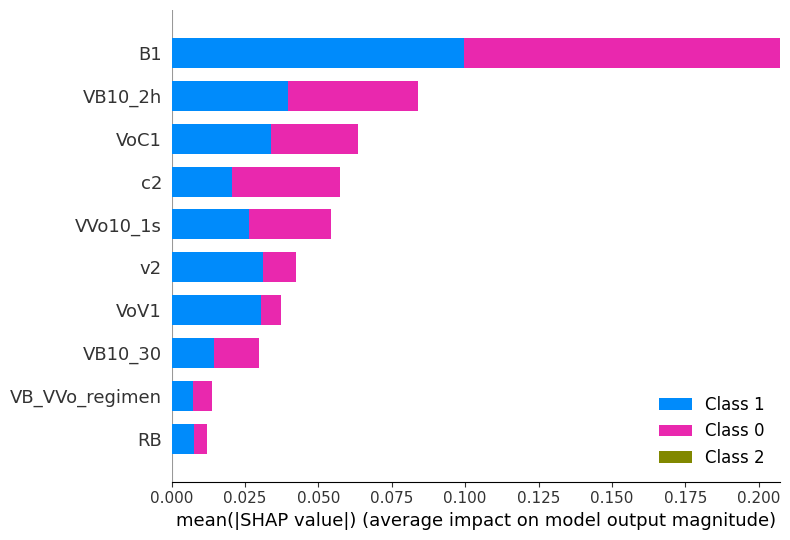

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


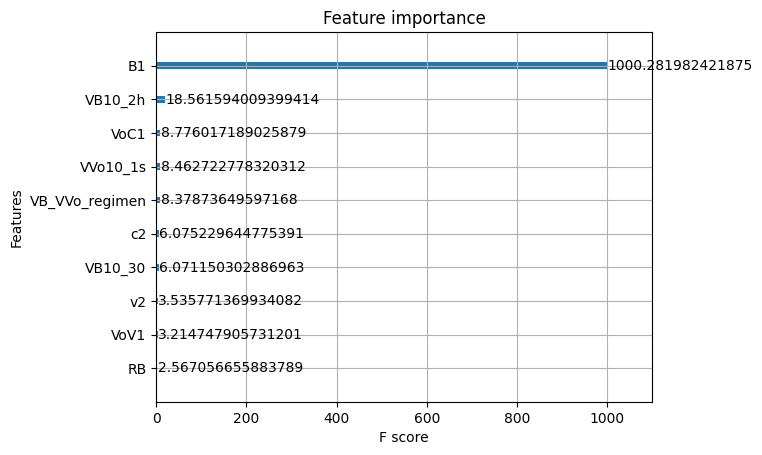

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


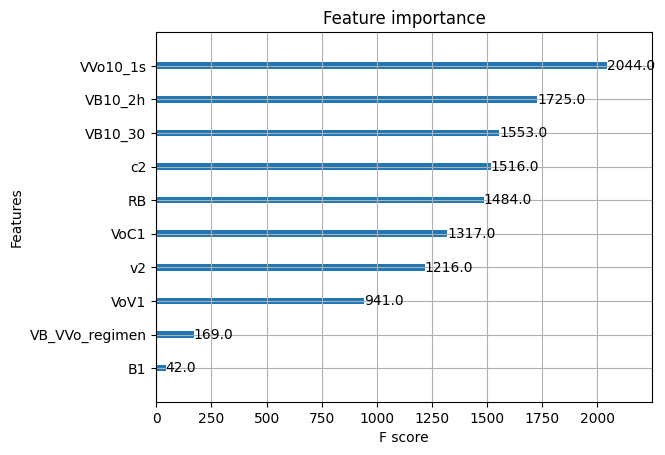

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


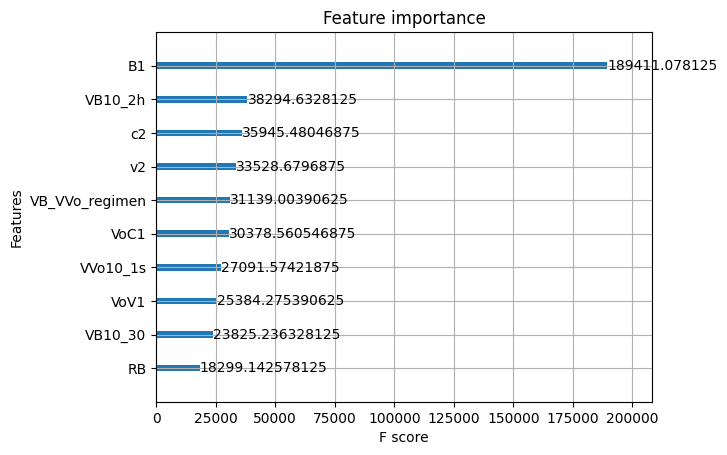

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# "VB_VVo_regimen" etiqueta interactiva o de contexto, MI decente,
# MI decente, Gragner bueno, AUC malo = 0.48

# "Voc1"
# MI malo, Gragner malo, AUC bueno = 0.55

# "QBpc"
# MI malo, Gragner bueno, AUC malo = 0.48



# "VB_VVo_regimen",

#RSI

In [ ]:
# Cálculo de deltas
delta = mf1['Close'].diff()

# Diccionario de ventanas
ventanas_vol = {
    "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

# RSI con máximas variaciones
for label, n in ventanas_vol.items():
    gain = np.sqrt((delta.where(delta > 0, 0.0).rolling(window=n).max()))
    loss = np.sqrt(((-delta.where(delta < 0, 0.0)).rolling(window=n).max()))

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    mf1[f'RSI_{label}'] = rsi


/tmp/ipython-input-16-2046624245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'RSI_{label}'] = rsi
/tmp/ipython-input-16-2046624245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'RSI_{label}'] = rsi
/tmp/ipython-input-16-2046624245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = [
    "RB", 'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_6h', 'RSI_8h',
    'RSI_12h', 'RSI_1d', 'RSI_3d', 'RSI_4d', 'RSI_5d', 'RSI_1s', 'RSI_2s',
    'RSI_1m', 'RSI_2m', 'RSI_3m', 'RSI_4m', 'RSI_5m', 'RSI_6m',
    'RSI_9m', 'RSI_1a', 'RSI_2a', 'RSI_3a'
]

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

   Variable  Mutual Information
24   RSI_3a            0.029098
0    RSI_10            0.018489
23   RSI_2a            0.014328
22   RSI_1a            0.005611
21   RSI_9m            0.004186
19   RSI_5m            0.003935
1    RSI_15            0.003854
18   RSI_4m            0.003531
20   RSI_6m            0.002906
16   RSI_2m            0.002817
17   RSI_3m            0.001956
15   RSI_1m            0.001735
13   RSI_1s            0.001064
10   RSI_3d            0.001017
14   RSI_2s            0.000903
2    RSI_30            0.000000
3    RSI_1h            0.000000
8   RSI_12h            0.000000
7    RSI_8h            0.000000
6    RSI_6h            0.000000
5    RSI_4h            0.000000
4    RSI_2h            0.000000
11   RSI_4d            0.000000
12   RSI_5d            0.000000
9    RSI_1d            0.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['RSI_1PCA1_1', 'RSI_1PCA1_2']

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

      Variable  Mutual Information
0  RSI_1PCA1_1            0.002957
1  RSI_1PCA1_2            0.002363


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["RSI_1PCA1_1", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "RSI_1PCA1_1"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)



Granger Causality
number of lags (no zero) 1


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=37.1350 , p=0.0000  , df_denom=582908, df_num=1
ssr based chi2 test:   chi2=37.1352 , p=0.0000  , df=1
likelihood ratio test: chi2=37.1340 , p=0.0000  , df=1
parameter F test:         F=37.1350 , p=0.0000  , df_denom=582908, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.5072 , p=0.0000  , df_denom=582905, df_num=2
ssr based chi2 test:   chi2=41.0148 , p=0.0000  , df=2
likelihood ratio test: chi2=41.0134 , p=0.0000  , df=2
parameter F test:         F=20.5072 , p=0.0000  , df_denom=582905, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.9994 , p=0.0000  , df_denom=582902, df_num=3
ssr based chi2 test:   chi2=41.9986 , p=0.0000  , df=3
likelihood ratio test: chi2=41.9971 , p=0.0000  , df=3
parameter F test:         F=13.9994 , p=0.0000  , df_denom=582902, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9922 , p=0.0000  , df_denom=582899, df_num=4


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Filtramos
df_auc = mf1[["RSI_1PCA1_1", "Y1_1"]].dropna()

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(df_auc[["RSI_1PCA1_1"]], df_auc["Y1_1"], test_size=0.3, random_state=42)

# AUC
auc_score = roc_auc_score(y_test, X_test["RSI_1PCA1_1"])

print(f"AUC usando solo RSI_1PCA1_1: {auc_score:.4f}")


AUC usando solo RSI_1PCA1_1: 0.4989


In [ ]:
#RSI3a
# Mi Bueno, excelente CG y AUC = 0.49
#RSI2a
# Mi zafa, excelente CG y AUC = 0.49
#RSI1a
# Mi debil, excelente CG y AUC = 0.5
#RSI_10
# Mi zafa, excelente CG y AUC = 0.56

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['RSI_1a', 'RSI_2a', 'RSI_3a']

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'RSI_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-66-1609641379.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'RSI_1PCA1_{i+1}'] = principal_component[:, i]
/tmp/ipython-input-66-1609641379.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'RSI_1PCA1_{i+1}'] = principal_component[:, i]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = [
    "RB", 'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_6h', 'RSI_8h',
    'RSI_12h', 'RSI_1d', 'RSI_3d', 'RSI_4d', 'RSI_5d', 'RSI_1s', 'RSI_2s',
    'RSI_1m', 'RSI_2m', 'RSI_3m', 'RSI_4m', 'RSI_5m', 'RSI_6m',
    'RSI_9m', 'RSI_1a', 'RSI_2a', 'RSI_3a'
]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

Cantidad de muestras: 582868


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

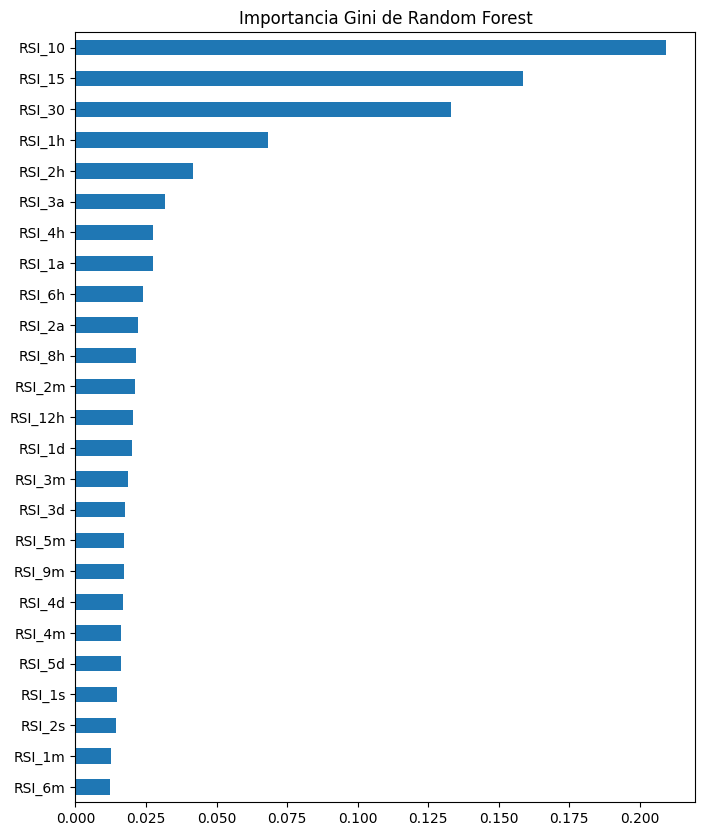

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

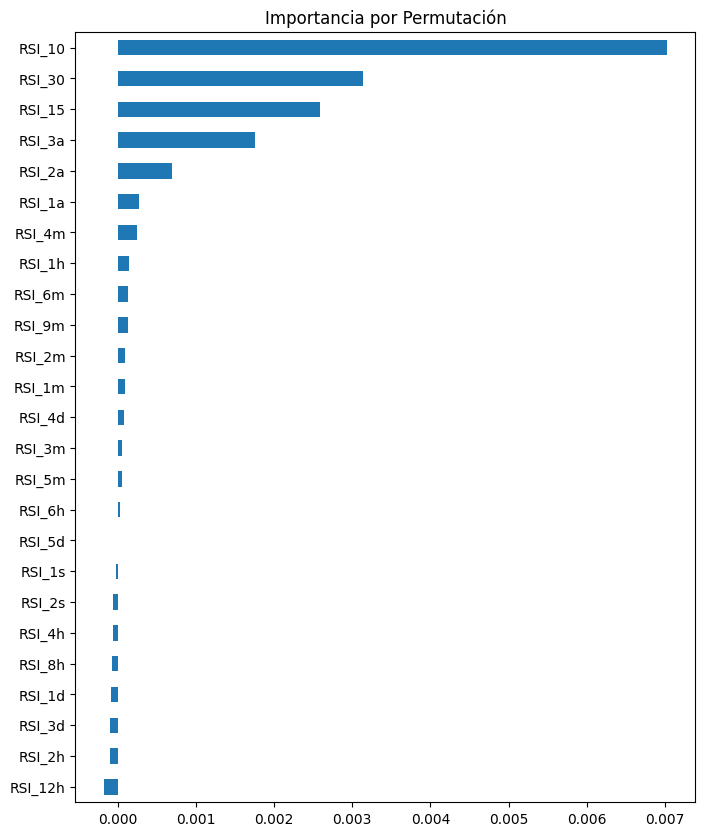

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6711 34425]
 [ 6520 41746]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3369 17200]
 [ 3202 20931]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     20569
           1       0.55      0.87      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.46     44702
weighted avg       0.53      0.54      0.48     44702



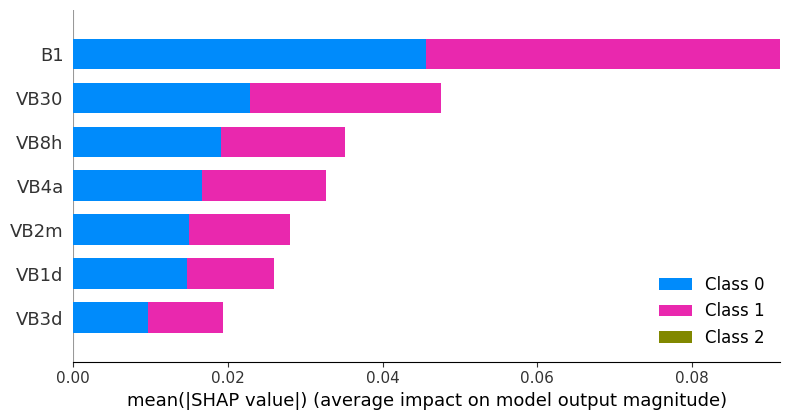

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


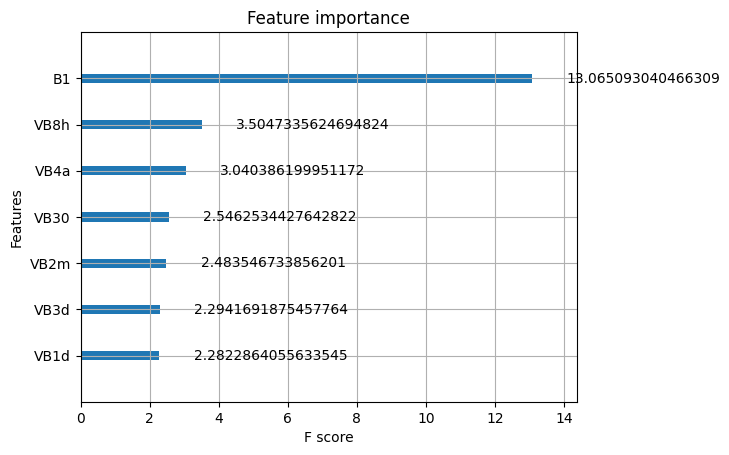

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


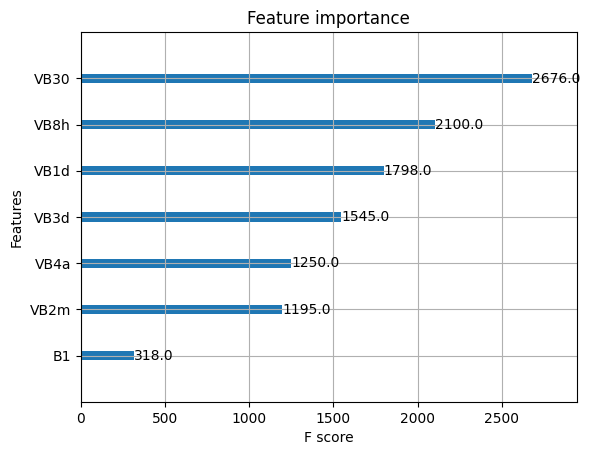

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


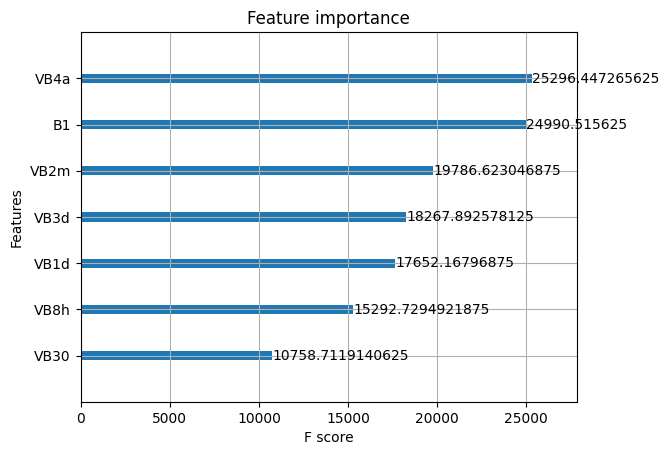

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# 'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_1a',  'RSI_3a'


#K y D estocasticos

In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h":96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

for label, tau in ventanas.items():
    min_price = mf1['Close'].rolling(window=tau).min()
    max_price = mf1['Close'].rolling(window=tau).max()
    mf1[f'K{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100

/tmp/ipython-input-17-756653734.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'K{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100
/tmp/ipython-input-17-756653734.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'K{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100
/tmp/ipython-input-17-756653734.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [ ]:
mf1["Prob_Vela_Alcista"] = (mf1['Close'] - mf1['Close1'] > 0).astype(int)


**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", 'K5', 'K10', 'K15', 'K30', 'K1h', 'K2h', 'K4h', 'K6h', 'K8h', 'K12h', 'K1d', 'K3d', 'K4d', 'K5d', 'K1s', 'K2s', 'K1m', 'K2m', 'K3m', 'K4m', 'K5m', 'K6m', 'K9m', 'K1a', 'K2a', 'K3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

   Variable  Mutual Information
1       K10            0.081787
2       K15            0.045727
3       K30            0.022816
4       K1h            0.015307
5       K2h            0.011158
6       K4h            0.008558
7       K6h            0.006651
8       K8h            0.005498
9      K12h            0.004221
10      K1d            0.002858
12      K4d            0.002262
18      K3m            0.002141
21      K6m            0.001988
11      K3d            0.001971
16      K1m            0.001809
15      K2s            0.001791
13      K5d            0.001718
24      K2a            0.001400
17      K2m            0.001227
23      K1a            0.001215
14      K1s            0.001183
22      K9m            0.001163
19      K4m            0.001106
20      K5m            0.000908
25      K3a            0.000801
0        K5            0.000000


In [ ]:
# Ventanas de suavizado (en cantidad de observaciones de 5 minutos)
ventanas_d = [6, 12, 24, 48, 96]

# Crear D% para K10 y K15
for n in ventanas_d:
    mf1[f'D10_{n}'] = mf1['K10'].rolling(window=n).mean()
    mf1[f'D15_{n}'] = mf1['K15'].rolling(window=n).mean()

/tmp/ipython-input-18-688352383.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'D10_{n}'] = mf1['K10'].rolling(window=n).mean()
/tmp/ipython-input-18-688352383.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'D15_{n}'] = mf1['K15'].rolling(window=n).mean()
/tmp/ipython-input-18-688352383.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

In [ ]:
k_vars = ['K15', 'K30', 'K1h', 'K2h', 'K4h', 'K6h', 'K8h', 'K12h',
          'K1d', 'K3d', 'K4d', 'K5d', 'K1s', 'K2s', 'K1m', 'K2m', 'K3m',
          'K4m', 'K5m', 'K6m', 'K9m', 'K1a', 'K2a', "K3a"]

# Aplicamos versión categórica
def categorizar_k(k_value):
    if k_value <= 33:
        return 0  # Sobreventa
    elif k_value >= 67:
        return 2  # Sobrecompra
    else:
        return 1  # Zona neutra

for k in k_vars:
        mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)


In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['K15_cat', 'K30_cat', 'K1h_cat', 'K2h_cat', 'K4h_cat', 'K6h_cat', 'K8h_cat', 'K12h_cat',
 'K1d_cat', 'K3d_cat', 'K4d_cat', 'K5d_cat', 'K1s_cat', 'K2s_cat', 'K1m_cat', 'K2m_cat', 'K3m_cat',
 'K4m_cat', 'K5m_cat', 'K6m_cat', 'K9m_cat', 'K1a_cat', 'K2a_cat', 'K3a_cat']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

    Variable  Mutual Information
0    K15_cat            0.070474
1    K30_cat            0.060426
2    K1h_cat            0.054393
17   K4m_cat            0.051858
18   K5m_cat            0.051184
19   K6m_cat            0.050300
3    K2h_cat            0.050105
16   K3m_cat            0.049318
15   K2m_cat            0.048866
20   K9m_cat            0.048040
14   K1m_cat            0.046874
4    K4h_cat            0.046863
5    K6h_cat            0.045502
13   K2s_cat            0.045261
6    K8h_cat            0.044983
12   K1s_cat            0.044972
10   K4d_cat            0.044848
9    K3d_cat            0.044696
11   K5d_cat            0.044666
8    K1d_cat            0.044058
21   K1a_cat            0.043683
7   K12h_cat            0.043140
22   K2a_cat            0.040791
23   K3a_cat            0.039914


In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import pandas as pd

# # Lista de variables
# variables = ["RB", 'D10_6', 'D15_6', 'D10_12', 'D15_12', 'D10_24', 'D15_24', 'D10_48', 'D15_48', 'D10_96', 'D15_96']


# # Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
# X = mf1[variables].fillna(0)
# y = mf1['Y1_1'].fillna(1).astype(int)

# # Cálculo de información mutua
# mi = mutual_info_classif(X, y)

# # Mostrar resultados como DataFrame ordenado
# mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# print(mi_df)

   Variable  Mutual Information
1     D10_6            0.028496
3    D10_12            0.019242
5    D10_24            0.012296
7    D10_48            0.009156
9    D10_96            0.006610
2     D15_6            0.000000
0        RB            0.000000
6    D15_24            0.000000
4    D15_12            0.000000
8    D15_48            0.000000
10   D15_96            0.000000


In [ ]:
# def cat_to_angle(cat):
#     return {
#         0: -np.pi/2,  # Bajo
#         1: 0,         # Medio
#         2: np.pi/2    # Alto
#     }[cat]

# for col in ['K2m_cat', 'K4m_cat', 'K6m_cat']:
#     mf1[col + '_angle'] = mf1[col].map(cat_to_angle)

# mf1['K_index_cyc'] = (
#     0.5 * np.sin(mf1['K2m_cat_angle']) +
#     0.3 * np.sin(mf1['K4m_cat_angle']) +
#     0.2 * np.sin(mf1['K6m_cat_angle'])
# )

/tmp/ipython-input-71-93929063.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[col + '_angle'] = mf1[col].map(cat_to_angle)
/tmp/ipython-input-71-93929063.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[col + '_angle'] = mf1[col].map(cat_to_angle)
/tmp/ipython-input-71-93929063.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

In [ ]:
# # Ejemplo con 2m, 4m, 6m → pesos: 0.5, 0.3, 0.2
# weights = [0.5, 0.3, 0.2]

# mf1['K_index_mensual'] = (
#     0.5 * mf1['K2m_cat'].astype(int) +
#     0.3 * mf1['K4m_cat'].astype(int) +
#     0.2 * mf1['K6m_cat'].astype(int)
# )

/tmp/ipython-input-76-4095965627.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['K_index_mensual'] = (


In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import OneHotEncoder

# cats = mf1[['K2m_cat', 'K4m_cat', 'K6m_cat']].astype(str)
# encoder = OneHotEncoder(sparse_output=False)
# X_encoded = encoder.fit_transform(cats)

# pca = PCA(n_components=1)
# mf1['K_index_PCA'] = pca.fit_transform(X_encoded)

/tmp/ipython-input-78-2118080393.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['K_index_PCA'] = pca.fit_transform(X_encoded)


In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import pandas as pd

# # Lista de variables
# variables = ["K_index_PCA","K_index_mensual",'K2m_cat_angle', 'K4m_cat_angle', 'K6m_cat_angle', 'K_index_cyc', 'K2m_cat', 'K4m_cat', 'K6m_cat']


# # Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
# X = mf1[variables].fillna(0)
# y = mf1['Y1_1'].fillna(1).astype(int)

# # Cálculo de información mutua
# mi = mutual_info_classif(X, y)

# # Mostrar resultados como DataFrame ordenado
# mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# print(mi_df)

          Variable  Mutual Information
7          K4m_cat            0.052193
8          K6m_cat            0.050259
6          K2m_cat            0.049117
3    K4m_cat_angle            0.044473
4    K6m_cat_angle            0.042307
2    K2m_cat_angle            0.040203
1  K_index_mensual            0.023740
5      K_index_cyc            0.022780
0      K_index_PCA            0.022161


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["K1h_cat", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "K1h_cat"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1524.8569, p=0.0000  , df_denom=885307, df_num=1
ssr based chi2 test:   chi2=1524.8621, p=0.0000  , df=1
likelihood ratio test: chi2=1523.5504, p=0.0000  , df=1
parameter F test:         F=1524.8569, p=0.0000  , df_denom=885307, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=547.6319, p=0.0000  , df_denom=885304, df_num=2
ssr based chi2 test:   chi2=1095.2700, p=0.0000  , df=2
likelihood ratio test: chi2=1094.5930, p=0.0000  , df=2
parameter F test:         F=547.6319, p=0.0000  , df_denom=885304, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=327.1946, p=0.0000  , df_denom=885301, df_num=3
ssr based chi2 test:   chi2=981.5916, p=0.0000  , df=3
likelihood ratio test: chi2=981.0478, p=0.0000  , df=3
parameter F test:         F=327.1946, p=0.0000  , df_denom=885301, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:       

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Filtramos
df_auc = mf1[["K1h_cat", "Y1_1"]].dropna()

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(df_auc[["K1h_cat"]], df_auc["Y1_1"], test_size=0.3, random_state=42)

# AUC
auc_score = roc_auc_score(y_test, X_test["K1h_cat"])

print(f"AUC usando solo K1h_cat: {auc_score:.4f}")


AUC usando solo K1h_cat: 0.5722


In [ ]:
#K10
# mi = 0.082, gragner excelente, AUC = 0.55
#K15_cat
# mi = 0.07, granger excelente, AUC = 0.567
#K30_cat
# mi = 0.06, granger excelente, ACU = 0.5745
#K1h_cat
# mi = 0.015307, granger excelente, AUC = 0.5722



#K15
# mi = 0.045727, granger excelente, AUC = 0.57
#K30
# mi = 0.022816, granger excelente, ACU = 0.58
#K1h
# mi = 0.015307, granger excelente, AUC = 0.58
#K2h
# mi = 0.011, granger excelente, AUC = 0.57

In [ ]:
#D10_6
# mi = 0.028, granger excelente, AUC 0.54
#D10_12
## mi = 0.019, granger excelente, AUC 0.53
#D10_24
## mi = 0.011, granger excelente, AUC 0.52

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'K10', 'K15', 'K30', 'K1h', 'K2h', 'K4h', 'K6h', 'K8h', 'K12h',
          'K1d', 'K3d', 'K4d', 'K5d', 'K1s', 'K2s', 'K1m', 'K2m', 'K3m', 'K4m',
          'K5m', 'K6m', 'K9m', 'K1a', 'K2a', 'K3a']



# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 582122


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

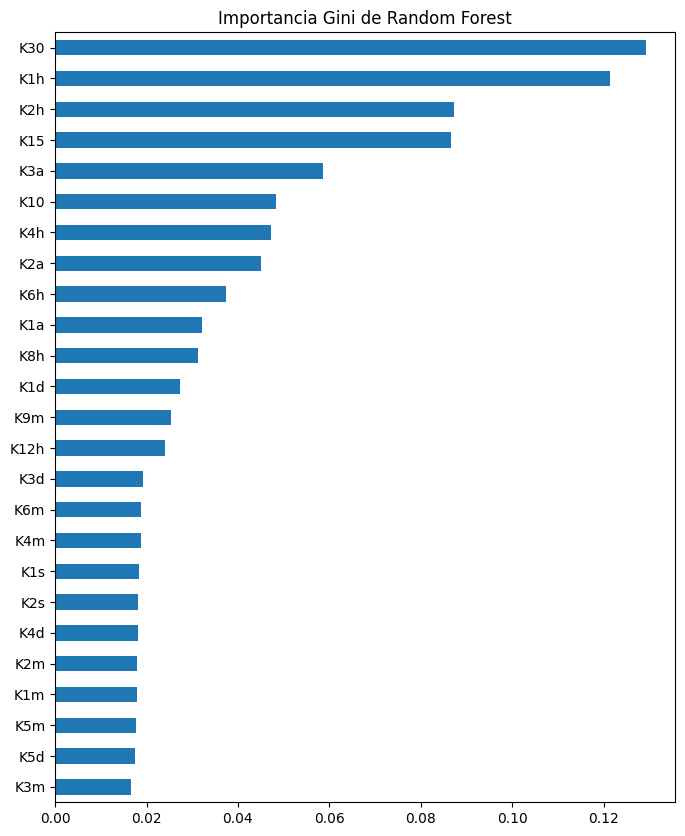

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


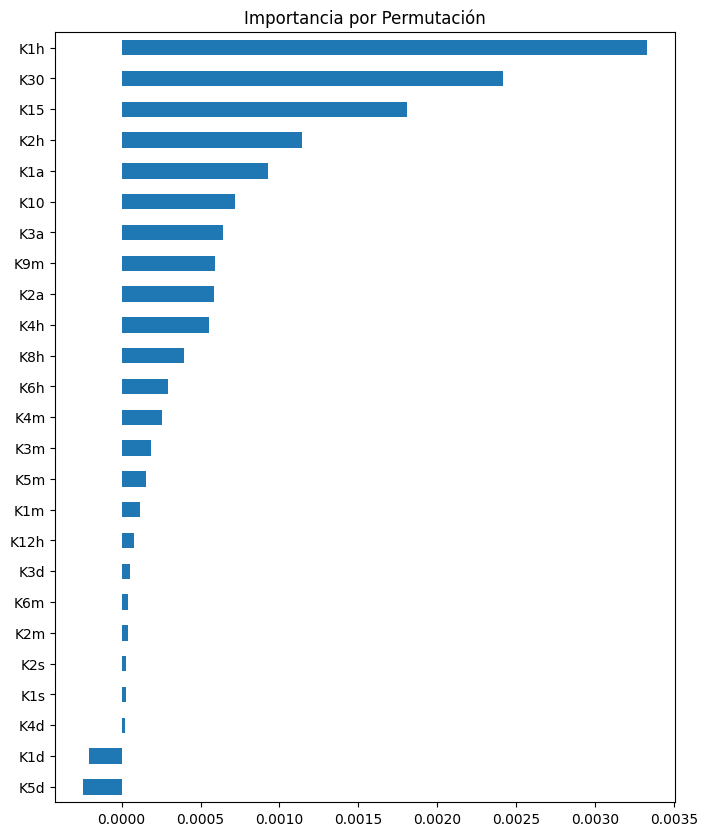

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
# Ventanas de suavizado (en cantidad de observaciones de 5 minutos)
ventanas_d = [6, 12, 24, 48, 96]

# Crear D% para K10 y K15
for n in ventanas_d:
    mf1[f'D10_{n}'] = mf1['K10'].rolling(window=n).mean()
    mf1[f'D15_{n}'] = mf1['K15'].rolling(window=n).mean()

/tmp/ipython-input-48-3108352417.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'D10_{n}'] = mf1['K10'].rolling(window=n).mean()
/tmp/ipython-input-48-3108352417.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'D15_{n}'] = mf1['K15'].rolling(window=n).mean()
/tmp/ipython-input-48-3108352417.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [ ]:
print(mf1.columns.tolist())

In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6711 34425]
 [ 6520 41746]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3369 17200]
 [ 3202 20931]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     20569
           1       0.55      0.87      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.46     44702
weighted avg       0.53      0.54      0.48     44702



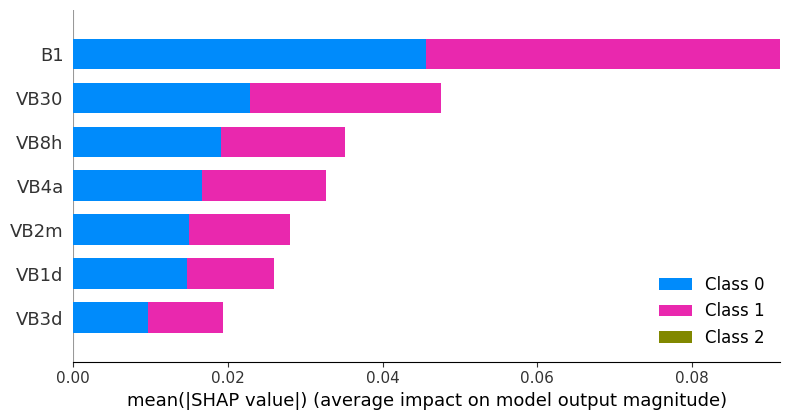

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


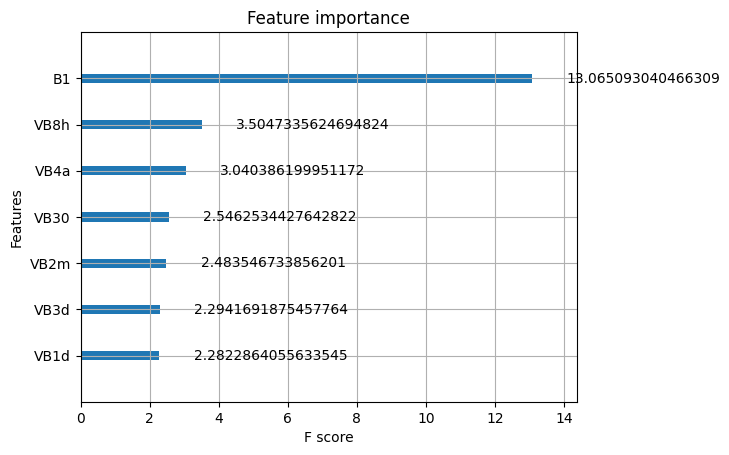

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


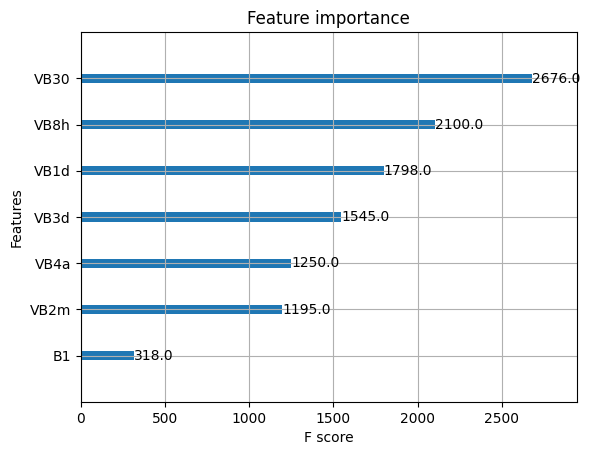

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


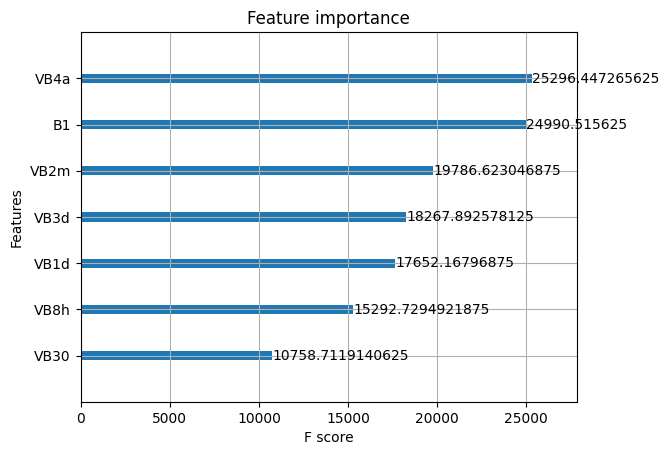

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

#MOM

In [ ]:
# Diccionario de ventanas
ventanas_vol = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

# Calcular MOM% para cada ventana
for label, n in ventanas_vol.items():
    close_tn = mf1["Close"].shift(n)
    mom = (mf1["Close"] - close_tn) / close_tn
    mf1[f"MOM_{label}"] = mom


/tmp/ipython-input-19-3481192990.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"MOM_{label}"] = mom
/tmp/ipython-input-19-3481192990.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"MOM_{label}"] = mom
/tmp/ipython-input-19-3481192990.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'Y1_1', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'B1_1', 'B1', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoSD_9132', 'VVo1m', 'VoSD_18264', 'VVo2m', 'VoSD_27369', 'VVo3m', 'VoSD_36528', 'VVo4m', 'VoSD_45660', 'VVo5m', 'VoSD_54792', 'VVo6m'

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", 'MOM_10', 'MOM_15', 'MOM_30', 'MOM_1h', 'MOM_2h', 'MOM_4h', 'MOM_6h', 'MOM_8h',
             'MOM_12h', 'MOM_1d', 'MOM_3d', 'MOM_4d', 'MOM_5d', 'MOM_1s', 'MOM_2s',
             'MOM_1m', 'MOM_2m', 'MOM_3m', 'MOM_4m', 'MOM_5m', 'MOM_6m', 'MOM_9m', 'MOM_1a', 'MOM_2a', 'MOM_3a']

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

   Variable  Mutual Information
1    MOM_10            0.011866
2    MOM_15            0.010785
3    MOM_30            0.009818
4    MOM_1h            0.006897
5    MOM_2h            0.004072
6    MOM_4h            0.003319
7    MOM_6h            0.002465
9   MOM_12h            0.001353
8    MOM_8h            0.001325
18   MOM_3m            0.001090
11   MOM_3d            0.000995
20   MOM_5m            0.000753
24   MOM_2a            0.000634
17   MOM_2m            0.000614
21   MOM_6m            0.000556
25   MOM_3a            0.000490
23   MOM_1a            0.000478
22   MOM_9m            0.000409
10   MOM_1d            0.000378
13   MOM_5d            0.000376
14   MOM_1s            0.000338
15   MOM_2s            0.000335
19   MOM_4m            0.000064
0        RB            0.000000
16   MOM_1m            0.000000
12   MOM_4d            0.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["MOM_30", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "MOM_30"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=585.6524, p=0.0000  , df_denom=885301, df_num=1
ssr based chi2 test:   chi2=585.6543, p=0.0000  , df=1
likelihood ratio test: chi2=585.4607, p=0.0000  , df=1
parameter F test:         F=585.6524, p=0.0000  , df_denom=885301, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=221.7448, p=0.0000  , df_denom=885298, df_num=2
ssr based chi2 test:   chi2=443.4922, p=0.0000  , df=2
likelihood ratio test: chi2=443.3811, p=0.0000  , df=2
parameter F test:         F=221.7448, p=0.0000  , df_denom=885298, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=131.0990, p=0.0000  , df_denom=885295, df_num=3
ssr based chi2 test:   chi2=393.3002, p=0.0000  , df=3
likelihood ratio test: chi2=393.2129, p=0.0000  , df=3
parameter F test:         F=131.0990, p=0.0000  , df_denom=885295, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=89

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Filtramos
df_auc = mf1[["MOM_30", "Y1_1"]].dropna()

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(df_auc[["MOM_30"]], df_auc["Y1_1"], test_size=0.3, random_state=42)

# AUC
auc_score = roc_auc_score(y_test, X_test["MOM_30"])

print(f"AUC usando solo MOM_30: {auc_score:.4f}")


AUC usando solo MOM_30: 0.5734


In [ ]:
#MOM_10
# mi = 0.012, Granger excelente, AUC = 0.58
#MOM_10
# mi = 0.011, Granger excelente, AUC = 0.57
#MOM_30
# mi = 0.01, Granger excelente, AUC = 0.57

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'MOM_10', 'MOM_15', 'MOM_30', 'MOM_1h', 'MOM_2h', 'MOM_4h', 'MOM_6h', 'MOM_8h',
             'MOM_12h', 'MOM_1d', 'MOM_3d', 'MOM_4d', 'MOM_5d', 'MOM_1s', 'MOM_2s',
             'MOM_1m', 'MOM_2m', 'MOM_3m', 'MOM_4m', 'MOM_5m', 'MOM_6m', 'MOM_9m', 'MOM_1a', 'MOM_2a', 'MOM_3a']


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 582911


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

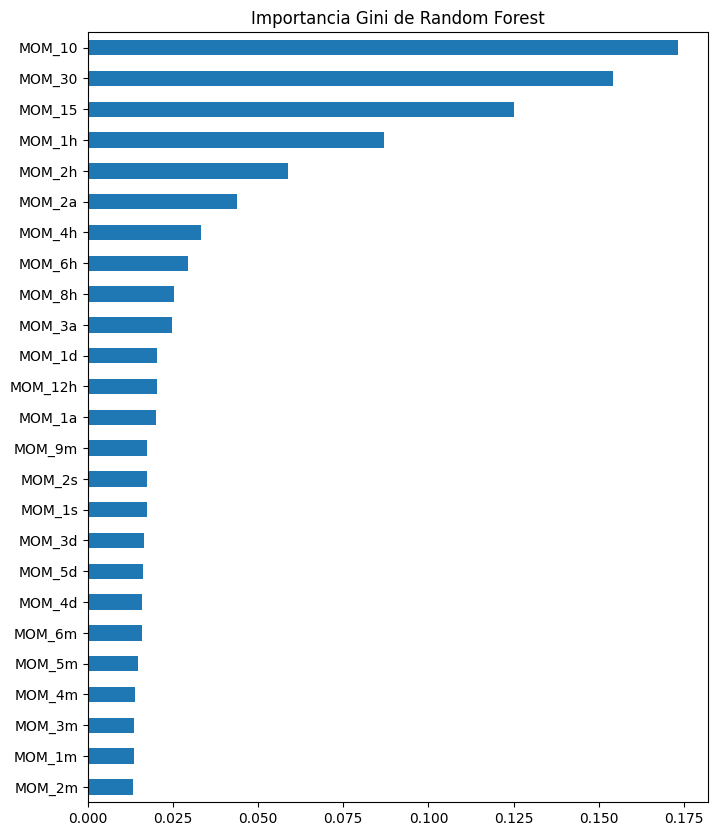

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


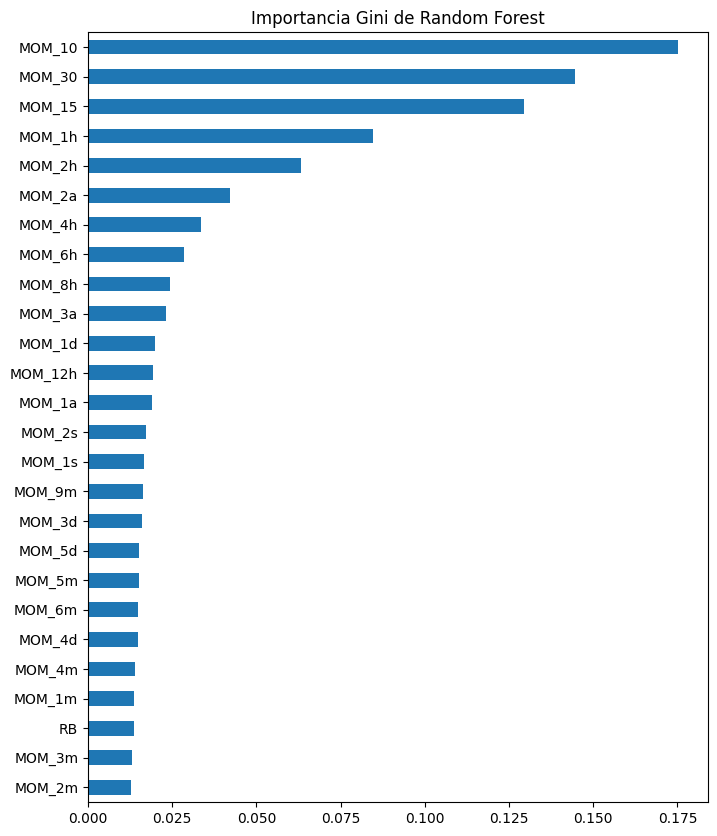

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6711 34425]
 [ 6520 41746]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3369 17200]
 [ 3202 20931]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     20569
           1       0.55      0.87      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.46     44702
weighted avg       0.53      0.54      0.48     44702



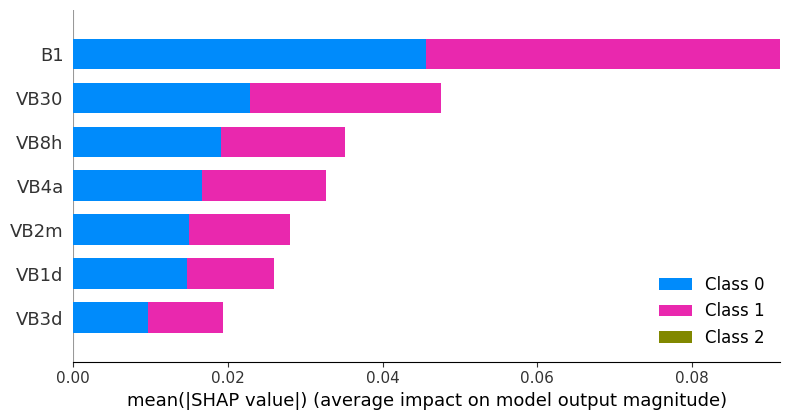

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


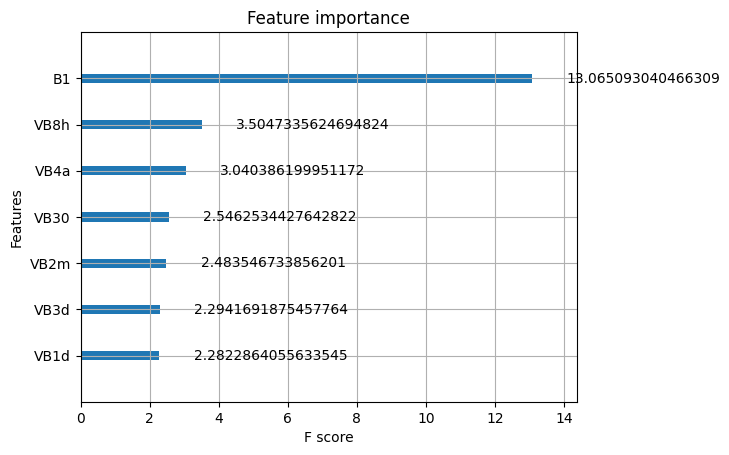

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


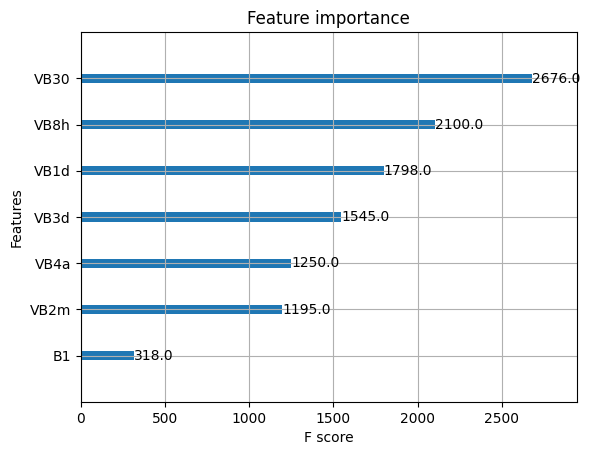

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


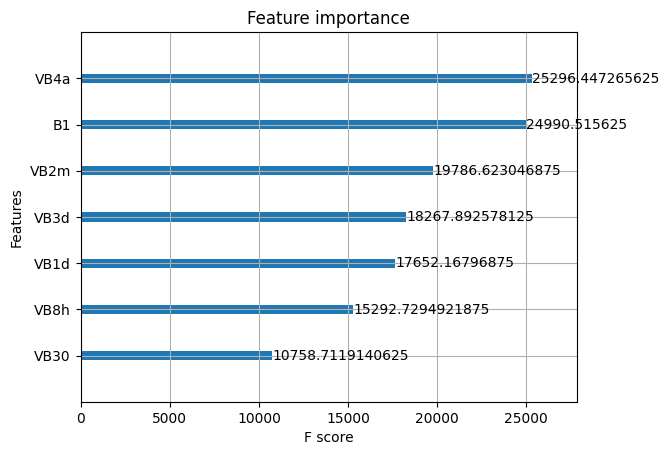

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

# EMAS

MEDIAS MOVILES EXPONENCIALES y MACD

In [ ]:
ema_spans = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2016,
    "2s": 4032,
    "1m": 8064,
    "2m": 16128,
    "3m": 24192,
    "4m": 32256,
    "5m": 40320,
    "6m": 48384,
    "9m": 72576,
    "1a": 100800,
    "2a": 201600,
    "3a": 302400
}

# Calcular cada EMA
for label, span in ema_spans.items():
    mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()


/tmp/ipython-input-20-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()
/tmp/ipython-input-20-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()
/tmp/ipython-input-20-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "EMA_10", "EMA_15", "EMA_30", "EMA_1h", "EMA_2h", "EMA_4h", "EMA_6h", "EMA_12h",
 "EMA_1d", "EMA_3d", "EMA_4d", "EMA_5d", "EMA_1s", "EMA_2s", "EMA_1m", "EMA_2m",
 "EMA_3m", "EMA_4m", "EMA_5m", "EMA_6m", "EMA_9m", "EMA_1a", "EMA_2a", "EMA_3a"]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
0    EMA_10            0.001663
2    EMA_30            0.001240
4    EMA_2h            0.000782
1    EMA_15            0.000754
3    EMA_1h            0.000300
5    EMA_4h            0.000000
6    EMA_6h            0.000000
7   EMA_12h            0.000000
8    EMA_1d            0.000000
9    EMA_3d            0.000000
10   EMA_4d            0.000000
11   EMA_5d            0.000000
12   EMA_1s            0.000000
13   EMA_2s            0.000000
14   EMA_1m            0.000000
15   EMA_2m            0.000000
16   EMA_3m            0.000000
17   EMA_4m            0.000000
18   EMA_5m            0.000000
19   EMA_6m            0.000000
20   EMA_9m            0.000000
21   EMA_1a            0.000000
22   EMA_2a            0.000000
23   EMA_3a            0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars =  ["RB", "EMA_10", "EMA_15", "EMA_30", "EMA_1h", "EMA_2h", "EMA_4h", "EMA_6h", "EMA_12h",
 "EMA_1d", "EMA_3d", "EMA_4d", "EMA_5d", "EMA_1s", "EMA_2s", "EMA_1m", "EMA_2m",
 "EMA_3m", "EMA_4m", "EMA_5m", "EMA_6m", "EMA_9m", "EMA_1a", "EMA_2a", "EMA_3a"]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 885311


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

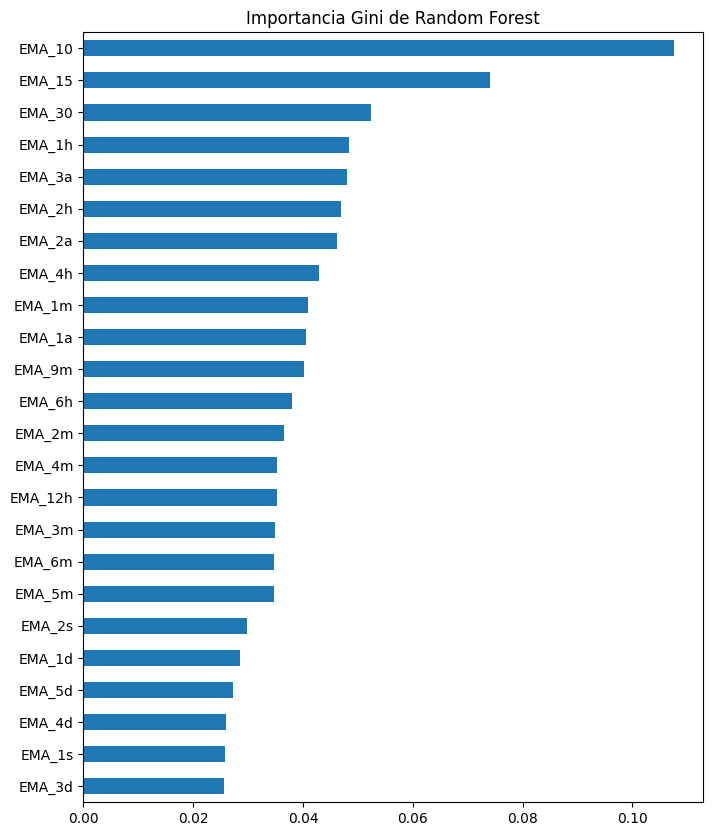

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

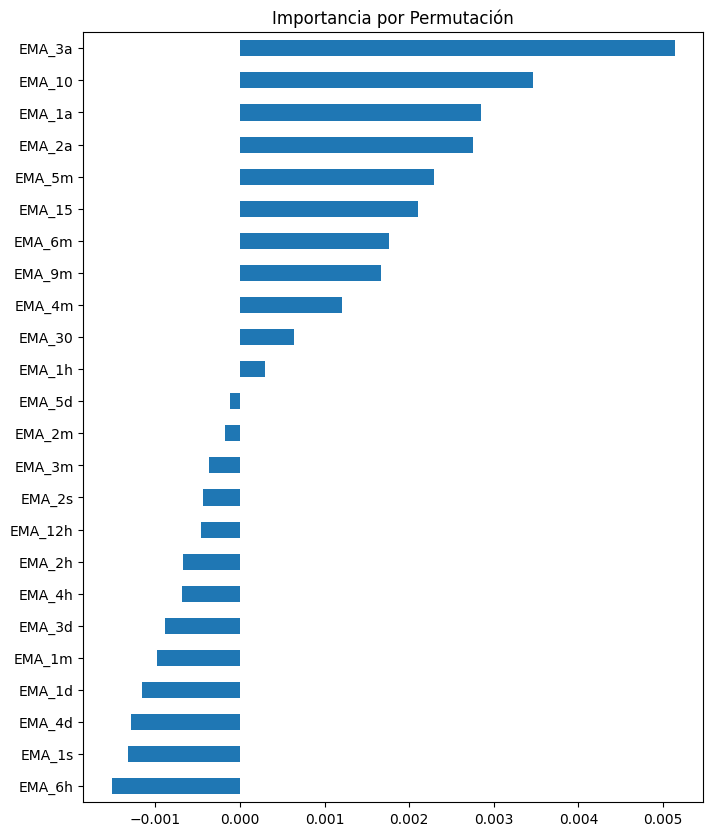

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6711 34425]
 [ 6520 41746]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3369 17200]
 [ 3202 20931]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     20569
           1       0.55      0.87      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.46     44702
weighted avg       0.53      0.54      0.48     44702



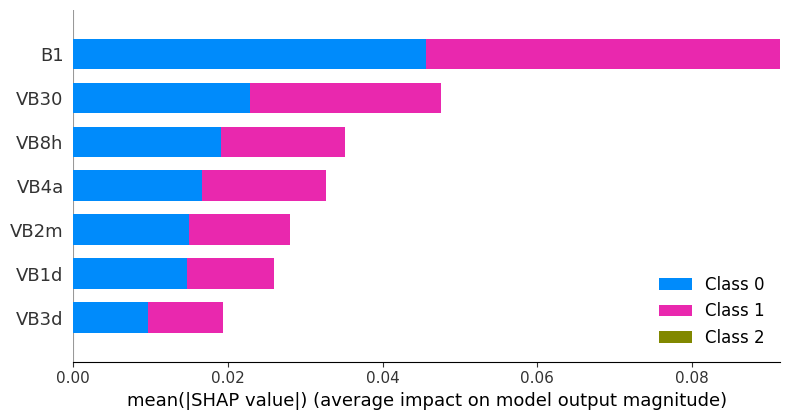

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


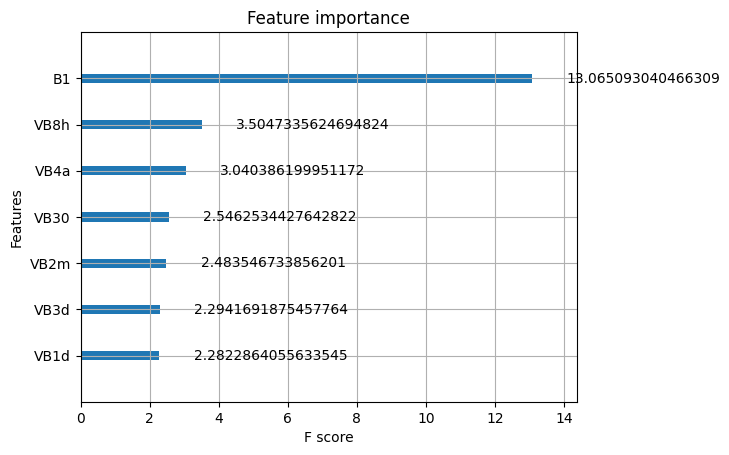

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


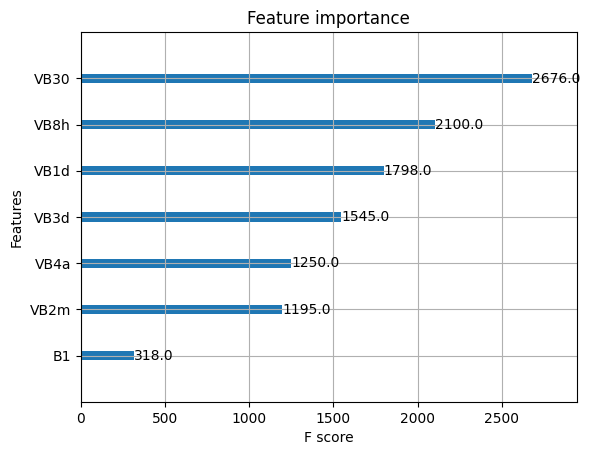

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


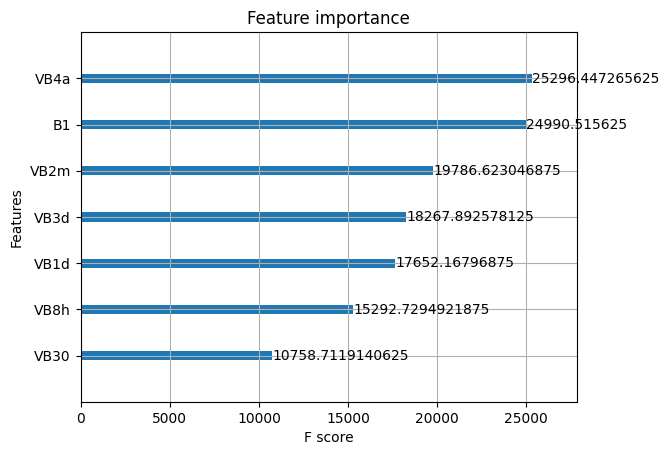

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

# BB

In [ ]:
k = 1
eps = 1e-6

# Diccionario de ventanas
ventanas = {
    "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

for label, window in ventanas.items():
    std = mf1['Close'].rolling(window=window).std()
    ema_col = f'EMA_{label}'

    if ema_col in mf1.columns:
        bb_upper = mf1[ema_col] + k * std
        bb_lower = mf1[ema_col] - k * std

        # ⚠️ Clipping fino para evitar explosiones
        denom = np.clip(bb_upper - bb_lower, eps, None)

        bbr = ((mf1['Close'] - bb_lower) / denom) * 100
        mf1[f'BBR_{label}'] = bbr

/tmp/ipython-input-21-240826990.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'BBR_{label}'] = bbr
/tmp/ipython-input-21-240826990.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'BBR_{label}'] = bbr
/tmp/ipython-input-21-240826990.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", 'BBR_10', 'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_2h', 'BBR_4h', 'BBR_6h',
 'BBR_12h', 'BBR_1d', 'BBR_3d', 'BBR_4d', 'BBR_5d', 'BBR_1s', 'BBR_2s', 'BBR_1m', 'BBR_2m',
 'BBR_3m', 'BBR_4m', 'BBR_5m', 'BBR_6m', 'BBR_9m', 'BBR_1a', 'BBR_2a', 'BBR_3a']



# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
3    BBR_30            0.012059
4    BBR_1h            0.011910
5    BBR_2h            0.010876
2    BBR_15            0.010650
1    BBR_10            0.010446
6    BBR_4h            0.007110
7    BBR_6h            0.005993
8   BBR_12h            0.003375
9    BBR_1d            0.001609
16   BBR_2m            0.001238
12   BBR_5d            0.000950
21   BBR_9m            0.000887
10   BBR_3d            0.000881
23   BBR_2a            0.000706
22   BBR_1a            0.000617
11   BBR_4d            0.000602
24   BBR_3a            0.000360
14   BBR_2s            0.000299
15   BBR_1m            0.000231
19   BBR_5m            0.000176
18   BBR_4m            0.000147
0        RB            0.000000
13   BBR_1s            0.000000
20   BBR_6m            0.000000
17   BBR_3m            0.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["BBR_2h", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "BBR_2h"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2069.6360, p=0.0000  , df_denom=885284, df_num=1
ssr based chi2 test:   chi2=2069.6430, p=0.0000  , df=1
likelihood ratio test: chi2=2067.2276, p=0.0000  , df=1
parameter F test:         F=2069.6360, p=0.0000  , df_denom=885284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=763.5742, p=0.0000  , df_denom=885281, df_num=2
ssr based chi2 test:   chi2=1527.1570, p=0.0000  , df=2
likelihood ratio test: chi2=1525.8413, p=0.0000  , df=2
parameter F test:         F=763.5742, p=0.0000  , df_denom=885281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=468.8045, p=0.0000  , df_denom=885278, df_num=3
ssr based chi2 test:   chi2=1406.4247, p=0.0000  , df=3
likelihood ratio test: chi2=1405.3087, p=0.0000  , df=3
parameter F test:         F=468.8045, p=0.0000  , df_denom=885278, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["BBR_2h", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["BBR_2h"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["BBR_2h"])
print(f"AUC usando solo BBR_2h: {auc_score:.4f}")


AUC usando solo BBR_2h: 0.5807


In [ ]:
#BBR_10
# mi = 0.01, mal granger (solo zafa el septimo lag), AUC = 0.57
#BBR_15
# mi = 0.01, granger excelente y mejroa segun mas lags, AUC= 0.58
#BBR_30
# mi = 0.012059, granger excelente hasta 6to lag, AUC= 0.59
#BBR_1h
# mi = 0.012, granger excelente, AUC= 0.58
#BBR_2h
# mi = 0.012, granger excelente, AUC= 0.58

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'BBR_10', 'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_2h', 'BBR_4h', 'BBR_6h',
 'BBR_12h', 'BBR_1d', 'BBR_3d', 'BBR_4d', 'BBR_5d', 'BBR_1s', 'BBR_2s', 'BBR_1m', 'BBR_2m',
 'BBR_3m', 'BBR_4m', 'BBR_5m', 'BBR_6m', 'BBR_9m', 'BBR_1a', 'BBR_2a', 'BBR_3a']


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 582912


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

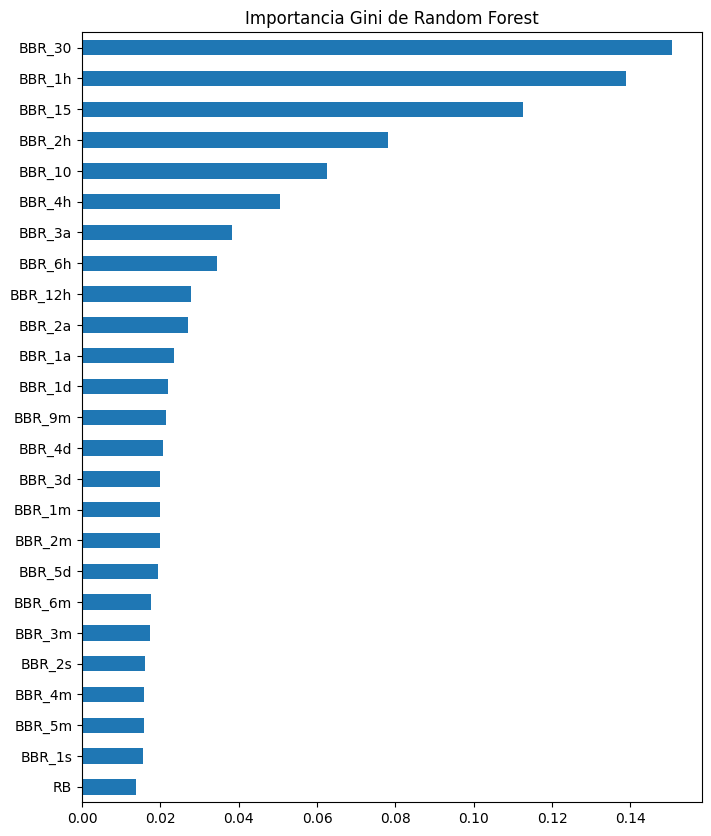

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

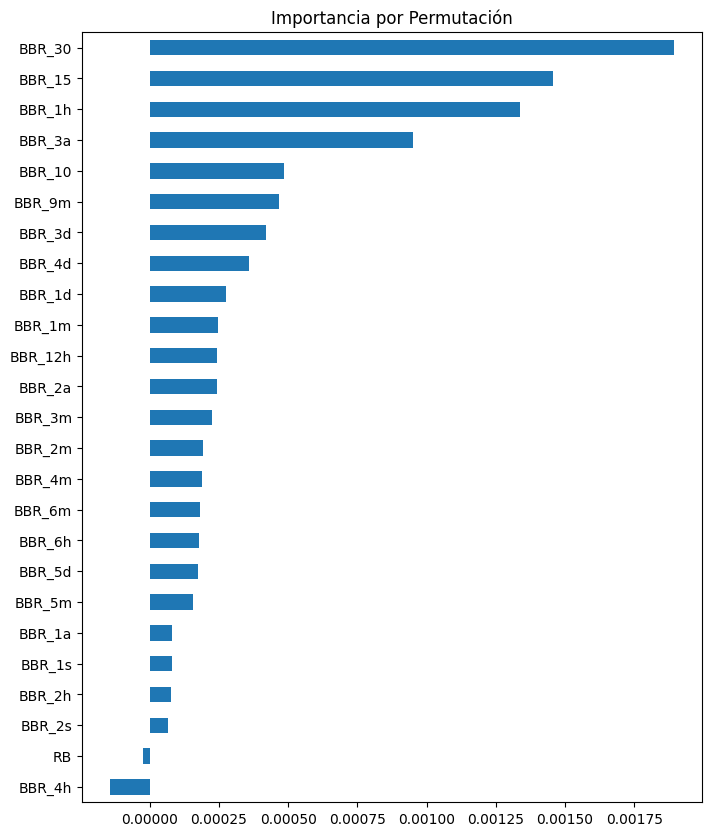

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import pandas as pd

# # Lista de variables
# variables = ['BBR_10', 'BBR_30']


# # Paso 1: Selección y limpieza de X
# X = mf1[variables].replace([np.inf, -np.inf], np.nan).fillna(0)

# # Paso 2: Limpieza de y
# y = mf1['Y1_1'].fillna(1).astype(int)

# # Cálculo de información mutua
# mi = mutual_info_classif(X, y)

# # Mostrar resultados como DataFrame ordenado
# mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# print(mi_df)


  Variable  Mutual Information
1   BBR_30            0.012059
0   BBR_10            0.010401


In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['BBR_10', 'BBR_30']
# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].replace([np.inf, -np.inf], np.nan).fillna(0).dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=1)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(1):
#     mf1.loc[subset.index, f'BBR_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-33-2757259238.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BBR_1PCA1_{i+1}'] = principal_component[:, i]


In [ ]:
print(mf1.columns.tolist())

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import pandas as pd

# # Lista de variables
# variables = ['BBR_10', 'BBR_30', "BBR_1PCA1_1"]


# # Paso 1: Selección y limpieza de X
# X = mf1[variables].replace([np.inf, -np.inf], np.nan).fillna(0)

# # Paso 2: Limpieza de y
# y = mf1['Y1_1'].fillna(1).astype(int)

# # Cálculo de información mutua
# mi = mutual_info_classif(X, y)

# # Mostrar resultados como DataFrame ordenado
# mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# print(mi_df)


      Variable  Mutual Information
2  BBR_1PCA1_1            0.012177
1       BBR_30            0.012059
0       BBR_10            0.010503


# M

In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, tau in ventanas.items():
    min_price =mf1['Low'].rolling(window=tau).min()
    max_price = mf1['High'].rolling(window=tau).max()
    mf1[f'M{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100


/tmp/ipython-input-22-3680333268.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'M{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100
/tmp/ipython-input-22-3680333268.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'M{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100
/tmp/ipython-input-22-3680333268.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'Y1_1', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'B1_1', 'B1', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoSD_9132', 'VVo1m', 'VoSD_18264', 'VVo2m', 'VoSD_27369', 'VVo3m', 'VoSD_36528', 'VVo4m', 'VoSD_45660', 'VVo5m', 'VoSD_54792', 'VVo6m'

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['M5', 'M10', 'M15', 'M30', 'M1h', 'M2h', 'M4h', 'M6h', 'M8h',
'M12h', 'M1d', 'M3d', 'M4d', 'M5d', 'M1s', 'M2s', 'M1m', 'M2m',
'M3m', 'M4m', 'M5m', 'M6m', 'M9m', 'M1a', 'M2a', 'M3a', 'M4a'
]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
0        M5            0.017928
1       M10            0.016748
2       M15            0.015392
3       M30            0.013523
4       M1h            0.011678
5       M2h            0.009961
6       M4h            0.006880
7       M6h            0.006366
8       M8h            0.006148
9      M12h            0.004406
18      M3m            0.002568
20      M5m            0.002373
10      M1d            0.002279
14      M1s            0.001907
11      M3d            0.001789
15      M2s            0.001708
13      M5d            0.001707
24      M2a            0.001688
12      M4d            0.001686
23      M1a            0.001587
16      M1m            0.001386
17      M2m            0.001205
26      M4a            0.001154
22      M9m            0.001140
21      M6m            0.000473
25      M3a            0.000430
19      M4m            0.000006


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["M1h", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "M1h"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1320.0386, p=0.0000  , df_denom=885296, df_num=1
ssr based chi2 test:   chi2=1320.0431, p=0.0000  , df=1
likelihood ratio test: chi2=1319.0599, p=0.0000  , df=1
parameter F test:         F=1320.0386, p=0.0000  , df_denom=885296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=419.4581, p=0.0000  , df_denom=885293, df_num=2
ssr based chi2 test:   chi2=838.9210, p=0.0000  , df=2
likelihood ratio test: chi2=838.5237, p=0.0000  , df=2
parameter F test:         F=419.4581, p=0.0000  , df_denom=885293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=245.3184, p=0.0000  , df_denom=885290, df_num=3
ssr based chi2 test:   chi2=735.9609, p=0.0000  , df=3
likelihood ratio test: chi2=735.6551, p=0.0000  , df=3
parameter F test:         F=245.3184, p=0.0000  , df_denom=885290, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["M30", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["M30"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["M30"])
print(f"AUC usando solo M30: {auc_score:.4f}")


AUC usando solo M30: 0.5896


In [ ]:
#M5
# mi = 0.017928, granger excelente, AUC= 0.6
#M10
# mi = 0.016748, granger excelente, AUC= 0.5971
#M15
# mi = 0.015392, granger excelente, AUC= 0.5933
#M30
# mi = 0.013523, granger excelente, AUC= 0.5896
#M1h
# mi = 0.011678, granger excelente, AUC= 0.5829

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'M5', 'M10', 'M15', 'M30', 'M1h', 'M2h', 'M4h', 'M6h', 'M8h',
'M12h', 'M1d', 'M3d', 'M4d', 'M5d', 'M1s', 'M2s', 'M1m', 'M2m',
'M3m', 'M4m', 'M5m', 'M6m', 'M9m', 'M1a', 'M2a', 'M3a', 'M4a'
]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

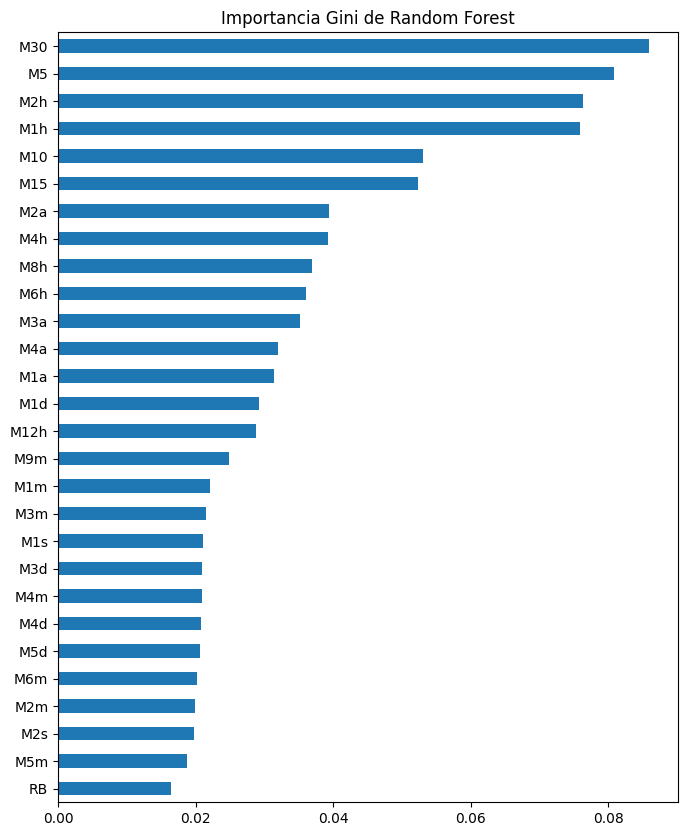

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

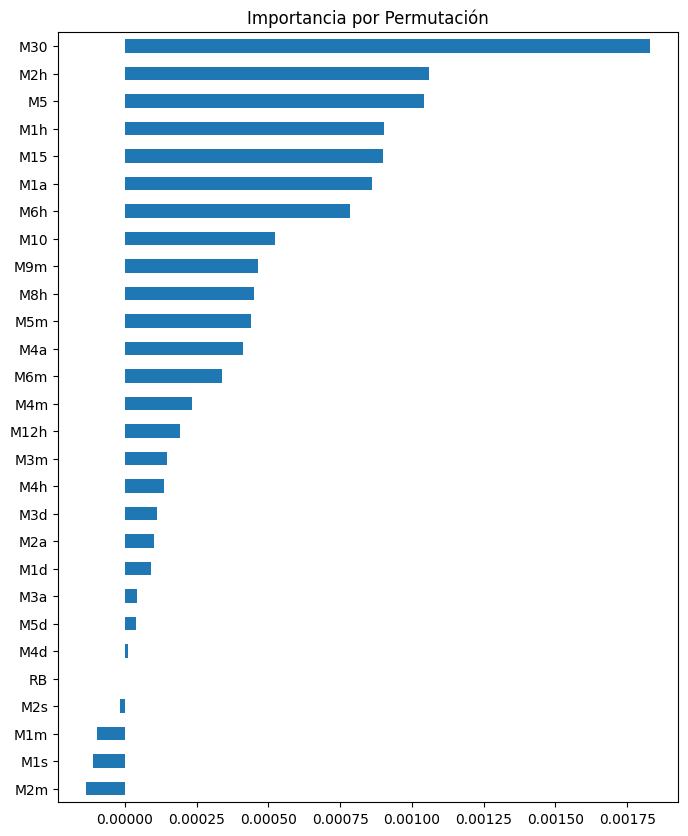

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['BLR5', 'BLR10', 'BLR15']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]
/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]


# L

In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, tau in ventanas.items():
    min_price =mf1['Low'].rolling(window=tau).min()
    max_price = mf1['High'].rolling(window=tau).max()
    mf1[f'L{label}'] = ((mf1['Close'] - min_price) / (max_price - min_price)) * 100 - ((mf1['Close'] - max_price) / (max_price - min_price)) * 100

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['L5', 'L10', 'L15', 'L30', 'L1h', 'L2h', 'L4h', 'L6h', 'L8h', 'L12h', 'L1d', 'L3d', 'L4d', 'L5d', 'L1s', 'L2s', 'L1m', 'L2m', 'L3m', 'L4m', 'L5m', 'L6m', 'L9m', 'L1a', 'L2a', 'L3a', 'L4a'
]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
11      L3d            0.148418
6       L4h            0.139774
4       L1h            0.136012
21      L6m            0.134578
20      L5m            0.125079
9      L12h            0.121688
0        L5            0.120321
16      L1m            0.119138
14      L1s            0.118486
2       L15            0.115388
19      L4m            0.115032
18      L3m            0.100400
8       L8h            0.099161
5       L2h            0.098521
24      L2a            0.097314
13      L5d            0.095423
25      L3a            0.091244
3       L30            0.090246
12      L4d            0.087161
10      L1d            0.085927
7       L6h            0.085771
23      L1a            0.085636
17      L2m            0.083175
15      L2s            0.081913
1       L10            0.081060
22      L9m            0.078456
26      L4a            0.075782


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["L6m", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "L6m"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9999  , df_denom=830517, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9999  , df=1
likelihood ratio test: chi2=0.0000  , p=1.0000  , df=1
parameter F test:         F=536729.0312, p=0.0000  , df_denom=830517, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=830515, df_num=2
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=171916.0248, p=0.0000  , df_denom=830515, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-3.8460 , p=1.0000  , df_denom=830513, df_num=3
ssr based chi2 test:   chi2=-11.5382, p=1.0000  , df=3
likelihood ratio test: chi2=-11.5383, p=1.0000  , df=3
parameter F test:         F=0.1208  , p=0.8862  , df_denom=830513, df_num=2

Granger Causality
number of lags (no zero) 4


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-1.9909 , p=1.0000  , df_denom=830511, df_num=4
ssr based chi2 test:   chi2=-7.9635 , p=1.0000  , df=4
likelihood ratio test: chi2=-7.9636 , p=1.0000  , df=4
parameter F test:         F=0.2415  , p=0.8674  , df_denom=830511, df_num=3

Granger Causality
number of lags (no zero) 5


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.4019 , p=1.0000  , df_denom=830509, df_num=5
ssr based chi2 test:   chi2=-2.0093 , p=1.0000  , df=5
likelihood ratio test: chi2=-2.0093 , p=1.0000  , df=5
parameter F test:         F=0.0075  , p=0.9309  , df_denom=830509, df_num=1

Granger Causality
number of lags (no zero) 6


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=830507, df_num=6
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=6
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=6
parameter F test:         F=135805.2729, p=0.0000  , df_denom=830507, df_num=1

Granger Causality
number of lags (no zero) 7


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.1578 , p=1.0000  , df_denom=830504, df_num=7
ssr based chi2 test:   chi2=-1.1046 , p=1.0000  , df=7
likelihood ratio test: chi2=-1.1046 , p=1.0000  , df=7
parameter F test:         F=1.1996  , p=0.2734  , df_denom=830504, df_num=1


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["L6m", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["L6m"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["L6m"])
print(f"AUC usando solo L6m: {auc_score:.4f}")


AUC usando solo L6m: 0.4992


In [ ]:
#L3d
# mi = 0.148418, granger pesimo, AUC= 0.5971
#L4h
# mi = 0.139774, granger pesimo, AUC= 0.5005
#L1h
# mi = 0.1392, granger pesimo, AUC= 0.4992
#L6m
# mi = 0.13523, granger pesimo, AUC= 0.5896


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'M5', 'M10', 'M15', 'M30', 'M1h', 'M2h', 'M4h', 'M6h', 'M8h',
'M12h', 'M1d', 'M3d', 'M4d', 'M5d', 'M1s', 'M2s', 'M1m', 'M2m',
'M3m', 'M4m', 'M5m', 'M6m', 'M9m', 'M1a', 'M2a', 'M3a', 'M4a'
]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

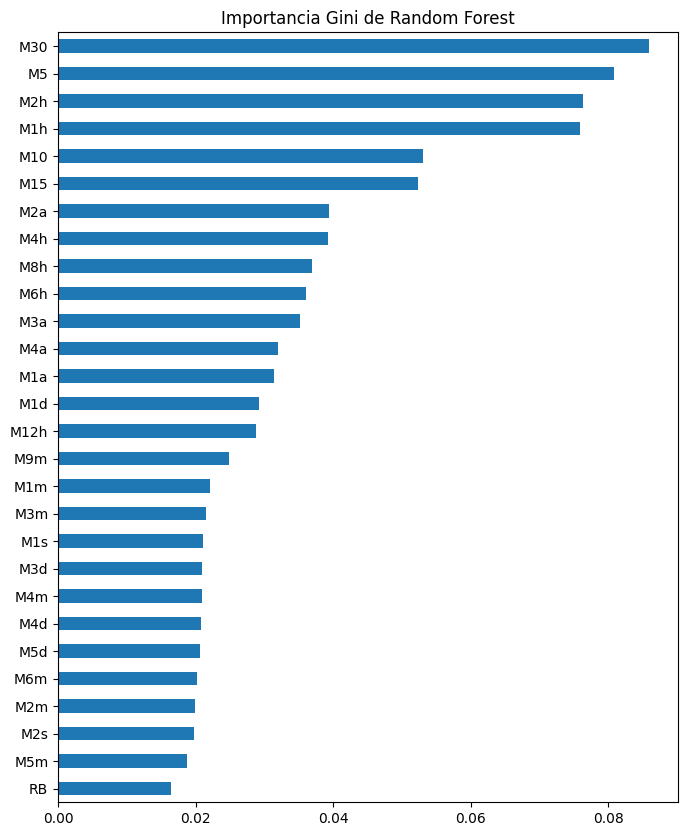

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

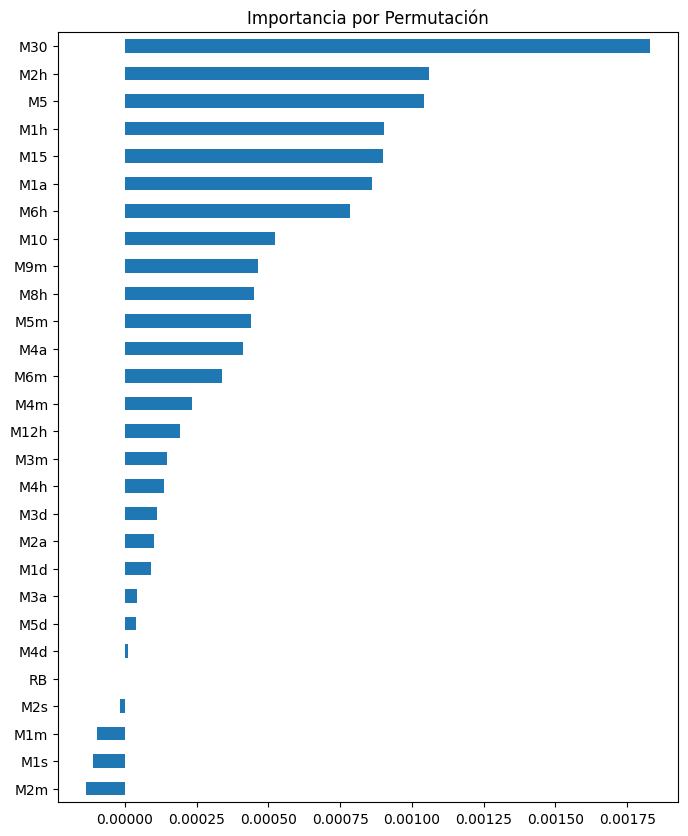

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['BLR5', 'BLR10', 'BLR15']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]
/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]


# N

In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, tau in ventanas.items():
    min_price =(mf1['Low'].shift(1)).rolling(window=tau).min()
    max_price = (mf1['High'].shift(1)).rolling(window=tau).max()
    mf1[f'N{label}'] = ((mf1['Close1'] - min_price) / (max_price - min_price)) * 100 - ((mf1['Close1'] - max_price) / (max_price - min_price)) * 100

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close', 'ETH_Volume', 'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close', 'USDT_Volume', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close', 'XRP_Volume', 'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close', 'SOL_Volume', 'DOGE_Open', 'DOGE_High', 'DOGE_Low', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'RB', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', '

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['N5', 'N10', 'N15', 'N30', 'N1h', 'N2h', 'N4h', 'N6h', 'N8h', 'N12h', 'N1d', 'N3d', 'N4d', 'N5d', 'N1s', 'N2s', 'N1m', 'N2m', 'N3m', 'N4m', 'N5m', 'N6m', 'N9m', 'N1a', 'N2a', 'N3a', 'N4a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
11      N3d            0.150105
2       N15            0.140858
4       N1h            0.140790
6       N4h            0.140523
21      N6m            0.134502
20      N5m            0.124804
9      N12h            0.122610
16      N1m            0.119688
14      N1s            0.117361
1       N10            0.116418
19      N4m            0.115065
8       N8h            0.099586
18      N3m            0.099518
3       N30            0.099148
5       N2h            0.099129
24      N2a            0.096488
13      N5d            0.096208
25      N3a            0.091817
23      N1a            0.087602
7       N6h            0.086408
12      N4d            0.086212
10      N1d            0.085818
17      N2m            0.082897
15      N2s            0.082708
0        N5            0.082298
22      N9m            0.079350
26      N4a            0.075636


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["N3d", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "N3d"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=884444, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=0.0000  , p=1.0000  , df=1
parameter F test:         F=581450.8333, p=0.0000  , df_denom=884444, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-9.9115 , p=1.0000  , df_denom=884441, df_num=2
ssr based chi2 test:   chi2=-19.8231, p=1.0000  , df=2
likelihood ratio test: chi2=-19.8233, p=1.0000  , df=2
parameter F test:         F=0.3256  , p=0.7221  , df_denom=884441, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.8575 , p=1.0000  , df_denom=884440, df_num=3
ssr based chi2 test:   chi2=-2.5724 , p=1.0000  , df=3
likelihood ratio test: chi2=-2.5724 , p=1.0000  , df=3
parameter F test:         F=0.9315  , p=0.3345  , df_denom=884440, df_num=1

Granger Causality
number of lags (no zero) 4


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.3555 , p=1.0000  , df_denom=884438, df_num=4
ssr based chi2 test:   chi2=-1.4221 , p=1.0000  , df=4
likelihood ratio test: chi2=-1.4221 , p=1.0000  , df=4
parameter F test:         F=0.7923  , p=0.4528  , df_denom=884438, df_num=2

Granger Causality
number of lags (no zero) 5


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=884436, df_num=5
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=5
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=5
parameter F test:         F=171543.2238, p=0.0000  , df_denom=884436, df_num=1

Granger Causality
number of lags (no zero) 6


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=0.0000  , p=1.0000  , df_denom=884434, df_num=6
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=6
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=6
parameter F test:         F=142977.3687, p=0.0000  , df_denom=884434, df_num=1

Granger Causality
number of lags (no zero) 7


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '


ssr based F test:         F=-0.0387 , p=1.0000  , df_denom=884432, df_num=7
ssr based chi2 test:   chi2=-0.2706 , p=1.0000  , df=7
likelihood ratio test: chi2=-0.2706 , p=1.0000  , df=7
parameter F test:         F=0.3713  , p=0.5423  , df_denom=884432, df_num=1


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["N3d", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["N3d"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["N3d"])
print(f"AUC usando solo N3d: {auc_score:.4f}")


AUC usando solo N3d: 0.5002


In [ ]:
#L3d
# mi = 0.148418, granger pesimo, AUC= 0.5971
#L4h
# mi = 0.139774, granger pesimo, AUC= 0.5005
#L1h
# mi = 0.1392, granger pesimo, AUC= 0.4992
#L6m
# mi = 0.13523, granger pesimo, AUC= 0.5896


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", 'M5', 'M10', 'M15', 'M30', 'M1h', 'M2h', 'M4h', 'M6h', 'M8h',
'M12h', 'M1d', 'M3d', 'M4d', 'M5d', 'M1s', 'M2s', 'M1m', 'M2m',
'M3m', 'M4m', 'M5m', 'M6m', 'M9m', 'M1a', 'M2a', 'M3a', 'M4a'
]


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 447012


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

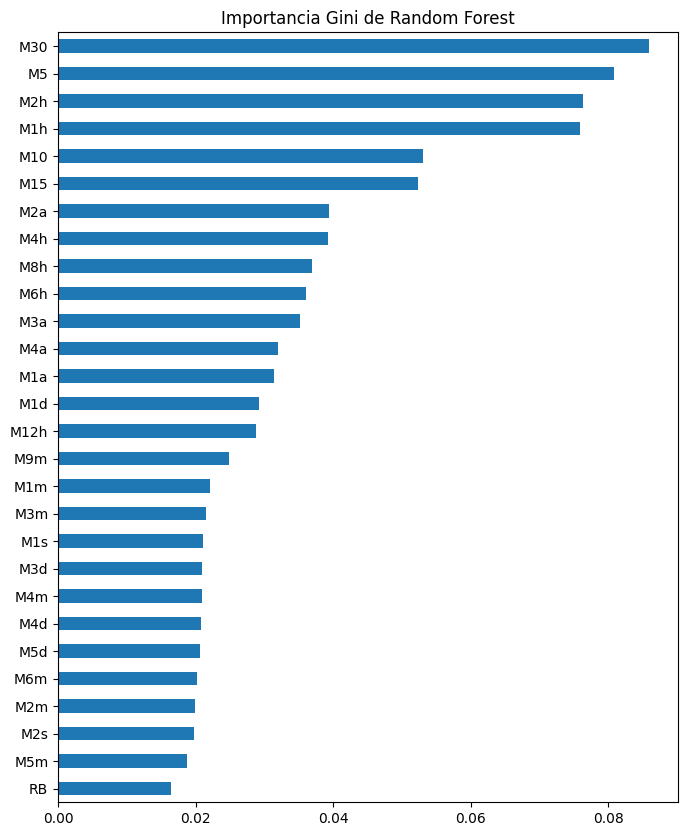

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

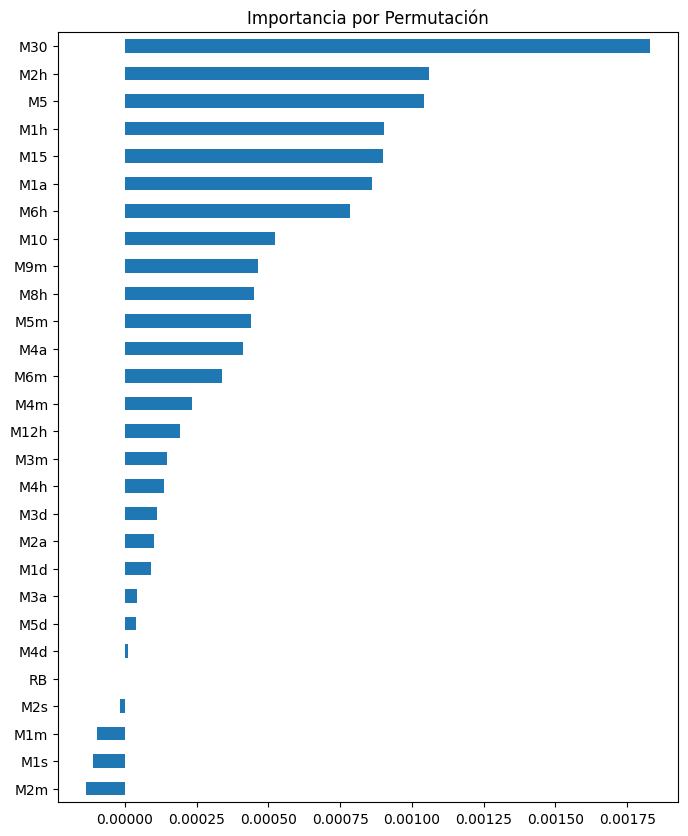

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['BLR5', 'BLR10', 'BLR15']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]
/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]


# TP

In [ ]:
# True Range (TR)
prev_close = mf1['Close'].shift(1)
mf1['TR'] = np.maximum.reduce([
    mf1['High'] - mf1['Low'],
    abs(mf1['High'] - prev_close),
    abs(mf1['Low'] - prev_close)
])


# ATR (Average True Range)
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, tau in ventanas.items():
    mf1[f'ATR{label}'] = mf1['TR'].rolling(window=tau, min_periods=1).mean()



/tmp/ipython-input-141-290443315.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['TR'] = np.maximum.reduce([
/tmp/ipython-input-141-290443315.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'ATR{label}'] = mf1['TR'].rolling(window=tau, min_periods=1).mean()
/tmp/ipython-input-141-290443315.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB",  'TR', 'ATR4a', 'ATR5', 'ATR10', 'ATR15', 'ATR30', 'ATR1h',
             'ATR2h', 'ATR4h', 'ATR6h', 'ATR8h', 'ATR12h', 'ATR1d', 'ATR3d',
             'ATR4d', 'ATR5d', 'ATR1s', 'ATR2s', 'ATR1m', 'ATR2m', 'ATR3m',
             'ATR4m', 'ATR5m', 'ATR6m', 'ATR9m', 'ATR1a', 'ATR2a', 'ATR3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
9     ATR4h            0.000937
1        TR            0.000850
3      ATR5            0.000694
7     ATR1h            0.000690
6     ATR30            0.000568
12   ATR12h            0.000409
4     ATR10            0.000114
11    ATR8h            0.000109
0        RB            0.000000
2     ATR4a            0.000000
5     ATR15            0.000000
8     ATR2h            0.000000
10    ATR6h            0.000000
13    ATR1d            0.000000
14    ATR3d            0.000000
15    ATR4d            0.000000
16    ATR5d            0.000000
17    ATR1s            0.000000
18    ATR2s            0.000000
19    ATR1m            0.000000
20    ATR2m            0.000000
21    ATR3m            0.000000
22    ATR4m            0.000000
23    ATR5m            0.000000
24    ATR6m            0.000000
25    ATR9m            0.000000
26    ATR1a            0.000000
27    ATR2a            0.000000
28    ATR3a            0.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["ATR4h", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "ATR4h"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=211.6441, p=0.0000  , df_denom=885306, df_num=1
ssr based chi2 test:   chi2=211.6448, p=0.0000  , df=1
likelihood ratio test: chi2=211.6195, p=0.0000  , df=1
parameter F test:         F=211.6441, p=0.0000  , df_denom=885306, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=142.8072, p=0.0000  , df_denom=885303, df_num=2
ssr based chi2 test:   chi2=285.6160, p=0.0000  , df=2
likelihood ratio test: chi2=285.5699, p=0.0000  , df=2
parameter F test:         F=142.8072, p=0.0000  , df_denom=885303, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=96.7577 , p=0.0000  , df_denom=885300, df_num=3
ssr based chi2 test:   chi2=290.2754, p=0.0000  , df=3
likelihood ratio test: chi2=290.2278, p=0.0000  , df=3
parameter F test:         F=96.7577 , p=0.0000  , df_denom=885300, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=73

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["ATR4h", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["ATR4h"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["ATR4h"])
print(f"AUC usando solo ATR4h: {auc_score:.4f}")


AUC usando solo ATR4h: 0.4904


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB",  'TR', 'ATR4a', 'ATR5', 'ATR10', 'ATR15', 'ATR30', 'ATR1h',
             'ATR2h', 'ATR4h', 'ATR6h', 'ATR8h', 'ATR12h', 'ATR1d', 'ATR3d',
             'ATR4d', 'ATR5d', 'ATR1s', 'ATR2s', 'ATR1m', 'ATR2m', 'ATR3m',
             'ATR4m', 'ATR5m', 'ATR6m', 'ATR9m', 'ATR1a', 'ATR2a', 'ATR3a']


# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 885310


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

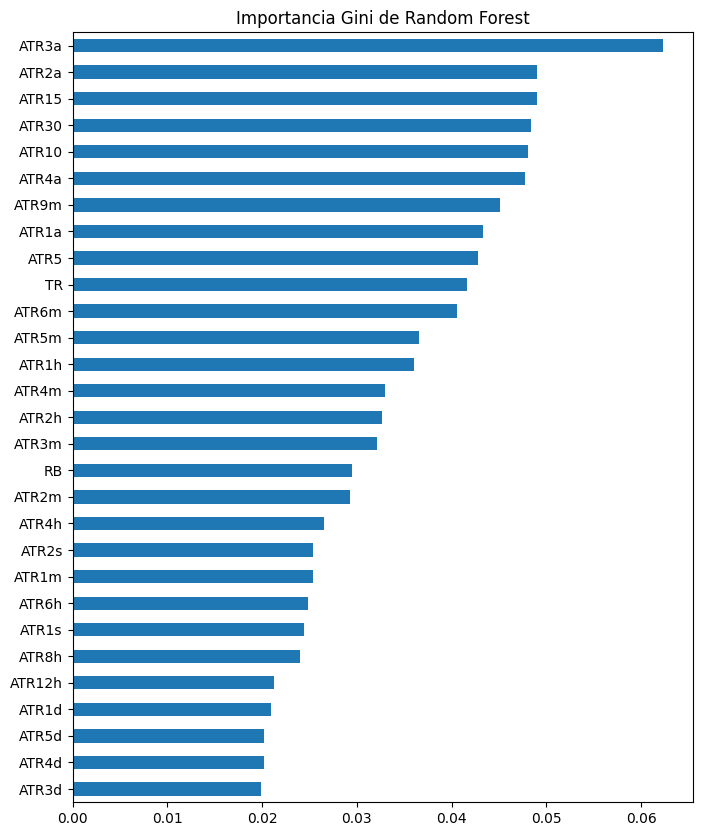

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()

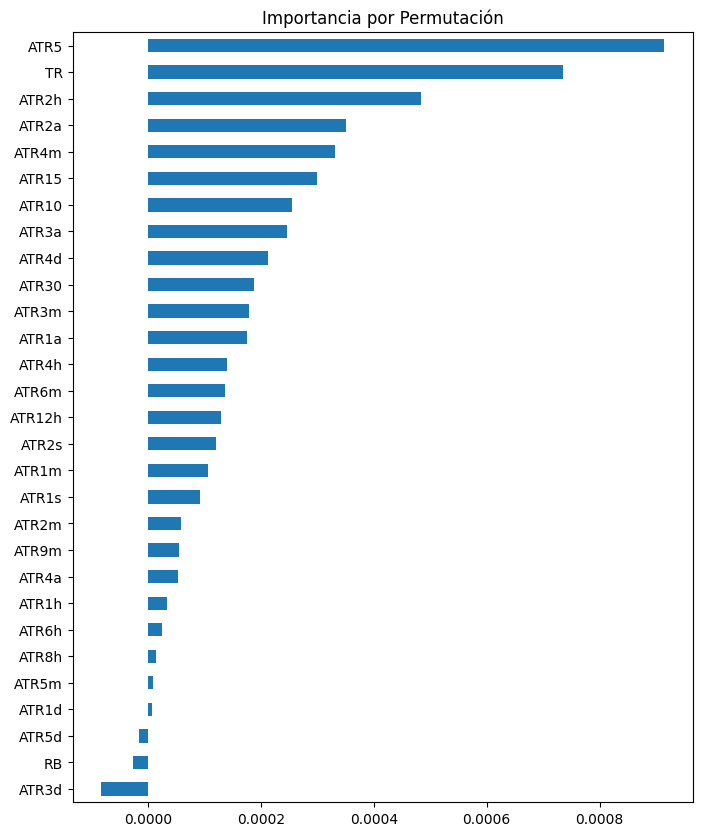

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()

# MEANS

MEDIAS MOVILES EXPONENCIALES y MACD

In [ ]:
ema_spans = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2016,
    "2s": 4032,
    "1m": 8064,
    "2m": 16128,
    "3m": 24192,
    "4m": 32256,
    "5m": 40320,
    "6m": 48384,
    "9m": 72576,
    "1a": 100800,
    "2a": 201600,
    "3a": 302400
}

# Calcular cada EMA
for label, span in ema_spans.items():
    mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()


/tmp/ipython-input-28-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()
/tmp/ipython-input-28-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"EMA_{label}"] = mf1["Close"].ewm(span=span, adjust=False).mean()
/tmp/ipython-input-28-749363150.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["EMA_10", "EMA_15", "EMA_30", "EMA_1h", "EMA_2h", "EMA_4h", "EMA_6h", "EMA_12h",
 "EMA_1d", "EMA_3d", "EMA_4d", "EMA_5d", "EMA_1s", "EMA_2s", "EMA_1m", "EMA_2m",
 "EMA_3m", "EMA_4m", "EMA_5m", "EMA_6m", "EMA_9m", "EMA_1a", "EMA_2a", "EMA_3a"]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
ema_spans = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2016,
    "2s": 4032,
    "1m": 8064,
    "2m": 16128,
    "3m": 24192,
    "4m": 32256,
    "5m": 40320,
    "6m": 48384,
    "9m": 72576,
    "1a": 100800,
    "2a": 201600,
    "3a": 302400
}

# Calcular cada EMA
for label, span in ema_spans.items():
    mf1[f"SMA{label}"] = mf1["Close"].rolling(window=span).mean()


/tmp/ipython-input-154-3320545564.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"SMA{label}"] = mf1["Close"].rolling(window=span).mean()
/tmp/ipython-input-154-3320545564.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f"SMA{label}"] = mf1["Close"].rolling(window=span).mean()
/tmp/ipython-input-154-3320545564.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [ ]:
print(mf1.columns.tolist())

['c2', 'c2_shifted', 'c2_percentil', 'p3', 'p6', 'p12', 'target_percentil', 'c2_shift1', 'z_c2_shift1', 'c2_percentil_shift1', 'p1', 'p2', 'z_c2_current', 'c2_percentil_current']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['SMA10', 'SMA15', 'SMA30', 'SMA1h', 'SMA2h', 'SMA4h', 'SMA6h', 'SMA12h',
             'SMA1d', 'SMA3d', 'SMA4d', 'SMA5d', 'SMA1s', 'SMA2s', 'SMA1m', 'SMA2m',
             'SMA3m', 'SMA4m', 'SMA5m', 'SMA6m', 'SMA9m', 'SMA1a', 'SMA2a', 'SMA3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
0     SMA10            0.000770
2     SMA30            0.000244
3     SMA1h            0.000244
1     SMA15            0.000094
4     SMA2h            0.000000
5     SMA4h            0.000000
6     SMA6h            0.000000
7    SMA12h            0.000000
8     SMA1d            0.000000
9     SMA3d            0.000000
10    SMA4d            0.000000
11    SMA5d            0.000000
12    SMA1s            0.000000
13    SMA2s            0.000000
14    SMA1m            0.000000
15    SMA2m            0.000000
16    SMA3m            0.000000
17    SMA4m            0.000000
18    SMA5m            0.000000
19    SMA6m            0.000000
20    SMA9m            0.000000
21    SMA1a            0.000000
22    SMA2a            0.000000
23    SMA3a            0.000000


# Probas

In [ ]:
mf1['Close1'] = mf1['Close'].shift(1)

In [ ]:
mf1["Prob_Vela_Alcista"] = (mf1['Close'] - mf1['Close1'] > 0).astype(int)

# VARIOS

In [ ]:
mf1['Close1'] = mf1['Close'].shift(1)

/tmp/ipython-input-35-1234094624.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1['Close1'] = mf1['Close'].shift(1)


VOM

In [ ]:
mf1["VoM"] = (
    mf1["Volume"] +  # BTC (ya renombrado)
    mf1.get("ETH_Volume", 0) +
    mf1.get("USDT_Volume", 0) +
    mf1.get("XRP_Volume", 0) +
    mf1.get("SOL_Volume", 0) +
    mf1.get("DOGE_Volume", 0)
)

/tmp/ipython-input-36-1799564127.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["VoM"] = (


In [ ]:
mf1["DominanciaBTC"] = mf1["Volume"] / mf1["VoM"]

/tmp/ipython-input-37-1115648868.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["DominanciaBTC"] = mf1["Volume"] / mf1["VoM"]


Market Cap

In [ ]:
mf1["MC"] = np.sqrt( mf1["Volume"] *mf1["Close"])

/tmp/ipython-input-38-1565929897.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["MC"] = np.sqrt( mf1["Volume"] *mf1["Close"])


In [ ]:
mf1["MCM"] = (
    mf1["Volume"] +  # BTC (ya renombrado)
    mf1.get("ETH_Volume", 0) *  mf1.get("ETH_Close", 0)+
    mf1.get("USDT_Volume", 0) *  mf1.get("USDT_Close", 0)+
    mf1.get("XRP_Volume", 0) * mf1.get("XRP_Close", 0)  +
    mf1.get("SOL_Volume", 0) * mf1.get("SOL_Close", 0) +
    mf1.get("DOGE_Volume", 0) * mf1.get("DOGE_Close", 0)
)


/tmp/ipython-input-39-3113300360.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["MCM"] = (


In [ ]:
mf1["DominanciaMBTC"] = mf1["MC"] / mf1["MCM"]

/tmp/ipython-input-40-3820773404.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["DominanciaMBTC"] = mf1["MC"] / mf1["MCM"]


c2 Y v2

In [ ]:
mf1["c2"] = (mf1["Close"]).diff()

/tmp/ipython-input-41-3378438429.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["c2"] = (mf1["Close"]).diff()


In [ ]:
mf1["v2"] = (mf1["Volume"]).diff()

/tmp/ipython-input-152-1386850668.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["v2"] = (mf1["Volume"]).diff()


**RER:** Ratio de Expansión de Rango

In [ ]:
mf1["RER_tanh_abs"] = np.tanh((mf1["High"] - mf1["Low"]) / (abs(mf1["Close1"] - mf1["Close"]) + 1e-3))

/tmp/ipython-input-46-287830819.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["RER_tanh_abs"] = np.tanh((mf1["High"] - mf1["Low"]) / (abs(mf1["Close1"] - mf1["Close"]) + 1e-3))


In [ ]:
mf1["RER_tanh"] = np.tanh((mf1["High"] - mf1["Low"]) / ((mf1["Close1"] - mf1["Close"]) + 1e-3))

/tmp/ipython-input-47-2491321395.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["RER_tanh"] = np.tanh((mf1["High"] - mf1["Low"]) / ((mf1["Close1"] - mf1["Close"]) + 1e-3))


In [ ]:
mf1["RER_weighted"] = mf1["RER_tanh"] * (mf1["Volume"] / mf1["Volume"].rolling(12).mean())

/tmp/ipython-input-48-3368035948.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["RER_weighted"] = mf1["RER_tanh"] * (mf1["Volume"] / mf1["Volume"].rolling(12).mean())


In [ ]:
# mf1["RER_weighted"] = mf1["RER_5m"] * (Volume / Volume.rolling(12).mean())
# mf1["RER_tanh"] = np.tanh((High - Low) / (abs(Open - Close) + 1e-3))
# Posiblemente, necesario ponderar con el volumen para evitar sesgos, o un ratio de volumen que considere un plazo de tiempo mas largo en el denominador

**ICD:** Índice de Compresión Direccional

In [ ]:
import numpy as np

mf1["ICD5"] = np.where(
    (mf1["High"] - mf1["Low"]) == 0,
    0,
    (mf1["c2"] / (mf1["High"] - mf1["Low"] + 1e-8)) * mf1["Volume"]
)


/tmp/ipython-input-49-803692367.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["ICD5"] = np.where(


**TAC:** Tasa de Asimetría de Velas (TAV)

In [ ]:
import numpy as np

Upper_Shadow = mf1["High"] - np.maximum(mf1['Close1'], mf1['Close'])
Lower_Shadow = np.minimum(mf1['Close1'], mf1['Close']) - mf1["Low"]

mf1["TAV5"] = (Upper_Shadow - Lower_Shadow) / (mf1["High"] - mf1["Low"] + 1e-8)


/tmp/ipython-input-50-1941285742.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["TAV5"] = (Upper_Shadow - Lower_Shadow) / (mf1["High"] - mf1["Low"] + 1e-8)


**Probabilisticas**

In [ ]:
mf1["Prob_Vela_Alcista"] = (mf1['Close'] - mf1['Close1'] > 0).astype(int)
mf1["Prob_Vela_Alcista_5"] = mf1["Prob_Vela_Alcista"].rolling(5).mean()

/tmp/ipython-input-51-4265496028.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Vela_Alcista"] = (mf1['Close'] - mf1['Close1'] > 0).astype(int)
/tmp/ipython-input-51-4265496028.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Vela_Alcista_5"] = mf1["Prob_Vela_Alcista"].rolling(5).mean()


In [ ]:
mf1["Prob_Vela_Alcista_3"] = mf1["Prob_Vela_Alcista"].rolling(3).mean()

/tmp/ipython-input-52-775149249.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Vela_Alcista_3"] = mf1["Prob_Vela_Alcista"].rolling(3).mean()


In [ ]:
mf1["Prob_Vela_Alcista_2"] = mf1["Prob_Vela_Alcista"].rolling(2).mean()

/tmp/ipython-input-53-3215697184.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Vela_Alcista_2"] = mf1["Prob_Vela_Alcista"].rolling(2).mean()


In [ ]:
eps = 1e-8  # evitar log(0)

# Pesos para cada ventana
lambda2, lambda3 = 0.5, 0.45

log_prob_joint = (
    lambda2 * np.log(mf1["Prob_Vela_Alcista_2"] + eps) +
    lambda3 * np.log(mf1["Prob_Vela_Alcista_3"] + eps)
)

mf1["Prob_Conjunta_2"] = np.exp(log_prob_joint)


/tmp/ipython-input-54-2106551893.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Conjunta_2"] = np.exp(log_prob_joint)


In [ ]:
mf1["body_ratio"] = (mf1['Close'] - mf1['Close1']) / (mf1["High"] - mf1["Low"] + 1e-8)
mf1["Prob_Tendencial_Suavizada"] = (np.tanh(mf1["body_ratio"]) + 1) / 2

/tmp/ipython-input-55-4311204.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["body_ratio"] = (mf1['Close'] - mf1['Close1']) / (mf1["High"] - mf1["Low"] + 1e-8)
/tmp/ipython-input-55-4311204.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Tendencial_Suavizada"] = (np.tanh(mf1["body_ratio"]) + 1) / 2


In [ ]:
rolling_high = mf1["High"].shift(1).rolling(10).max()
rolling_low = mf1["Low"].shift(1).rolling(10).min()

mf1["Prob_Breakout_Local"] = ((mf1["Close"] > rolling_high) | (mf1["Close"] < rolling_low)).astype(int)


/tmp/ipython-input-56-3709568944.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Prob_Breakout_Local"] = ((mf1["Close"] > rolling_high) | (mf1["Close"] < rolling_low)).astype(int)


In [ ]:
# # Paso 1: Calcular percentil de c2.shift(1) usando c2 hasta t-1 (para evitar leakage)
# mf1["c2_shift1"] = mf1["c2"].shift(1)

# # Rolling stats basados en c2.shift(1) para evitar mirar el dato actual
# rolling_mean = mf1["c2_shift1"].rolling(window=window_size, min_periods=min_obs).mean()
# rolling_std = mf1["c2_shift1"].rolling(window=window_size, min_periods=min_obs).std()
# mf1["z_c2_shift1"] = (mf1["c2_shift1"] - rolling_mean) / (rolling_std + 1e-8)
# mf1["c2_percentil_shift1"] = norm.cdf(mf1["z_c2_shift1"])

# # Paso 2: obtener los 3 percentiles previos (t-3, t-2, t-1)
# mf1["p1"] = mf1["c2_percentil_shift1"].shift(2)
# mf1["p2"] = mf1["c2_percentil_shift1"].shift(1)
# mf1["p3"] = mf1["c2_percentil_shift1"]

# # Paso 3: target: percentil actual de c2 (no shift)
# rolling_mean_current = mf1["c2"].rolling(window=window_size, min_periods=min_obs).mean()
# rolling_std_current = mf1["c2"].rolling(window=window_size, min_periods=min_obs).std()
# mf1["z_c2_current"] = (mf1["c2"] - rolling_mean_current) / (rolling_std_current + 1e-8)
# mf1["c2_percentil_current"] = norm.cdf(mf1["z_c2_current"])

# # Filtrar solo observaciones válidas
# valid = mf1[["p1", "p2", "p3", "c2_percentil_current"]].dropna()

# # Redondear a 3 decimales para discretizar los percentiles (1000 buckets)
# valid = valid.round(3)

# # Tabla de probabilidad condicional empírica
# contingency = (
#     valid.groupby(["p1", "p2", "p3", "c2_percentil_current"])
#     .size()
#     .reset_index(name="count")
# )

# # Calcular total por condición (p1, p2, p3)
# total_per_condition = contingency.groupby(["p1", "p2", "p3"])["count"].transform("sum")
# contingency["prob"] = contingency["count"] / total_per_condition

# # Obtener los top 2 percentiles más probables para cada combinación
# top2_probs = (
#     contingency.sort_values(["p1", "p2", "p3", "prob"], ascending=[True, True, True, False])
#     .groupby(["p1", "p2", "p3"])
#     .head(2)
#     .reset_index(drop=True)
# )

# # Renombrar columnas finales
# top2_probs = top2_probs.rename(columns={
#     "c2_percentil_current": "target_percentil",
#     "prob": "probabilidad"
# })

# # Dejar solo columnas finales
# output = top2_probs[["p1", "p2", "p3", "target_percentil", "probabilidad"]]
# mf1 = mf1.merge(top2_probs, on=["p1", "p2", "p3", "target_percentil", "probabilidad"], how="left")


/tmp/ipython-input-162-3744567884.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["c2_shift1"] = mf1["c2"].shift(1)


NameError: name 'window_size' is not defined

**Energeticas**

In [ ]:
mf1["Potencial_Energia_Bull"] = (mf1["Close"] - mf1["Close1"]) * mf1["Volume"]

/tmp/ipython-input-60-730628088.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Potencial_Energia_Bull"] = (mf1["Close"] - mf1["Close1"]) * mf1["Volume"]


In [ ]:
mf1["Delta_Close_vs_Media"] = mf1["Close"] - mf1["Close"].rolling(10).mean()

/tmp/ipython-input-61-4127022937.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Delta_Close_vs_Media"] = mf1["Close"] - mf1["Close"].rolling(10).mean()


In [ ]:
mf1["Fuerza_Empujada"] = ((mf1["High"] - mf1["Close"]) - (mf1["Close"] - mf1["Low"])) * mf1["Volume"]

/tmp/ipython-input-62-2822799270.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1["Fuerza_Empujada"] = ((mf1["High"] - mf1["Close"]) - (mf1["Close"] - mf1["Low"])) * mf1["Volume"]


***Laboratory***

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['c2', "p1", "p2", "p3", "target_percentil", "probabilidad"]
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


           Variable  Mutual Information
0                c2            0.007171
1                p1            0.000434
2                p2            0.000397
3                p3            0.000000
4  target_percentil            0.000000
5      probabilidad            0.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["High", "Low", 'Volume', 'VoM', 'DominanciaMBTC', 'cp2', "MC",
             "Close", "Fuerza_Empujada", "Delta_Close_vs_Media", "Potencial_Energia_Bull",
             'Prob_Breakout_Local', 'Prob_Tendencial_Suavizada', 'Prob_Vela_Alcista',
             'TAV5', 'ICD5', "RER_weighted", "RER_tanh", "RER_tanh_abs",
             "Prob_Vela_Alcista_5", "Prob_Vela_Alcista_3", "Prob_Vela_Alcista_2",
             "Prob_Conjunta_2"]
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


                     Variable  Mutual Information
13          Prob_Vela_Alcista            0.080370
21        Prob_Vela_Alcista_2            0.045083
20        Prob_Vela_Alcista_3            0.043236
19        Prob_Vela_Alcista_5            0.036932
22            Prob_Conjunta_2            0.023244
17                   RER_tanh            0.013427
8             Fuerza_Empujada            0.013015
12  Prob_Tendencial_Suavizada            0.012221
9        Delta_Close_vs_Media            0.008389
15                       ICD5            0.008361
10     Potencial_Energia_Bull            0.007229
14                       TAV5            0.006428
18               RER_tanh_abs            0.005646
16               RER_weighted            0.004879
7                       Close            0.003019
11        Prob_Breakout_Local            0.001969
3                         VoM            0.000715
2                      Volume            0.000410
1                         Low            0.000117


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse que Y1_1 esté numérica (dummy binaria, ej. 0 y 1)
df_granger = mf1[["Prob_Tendencial_Suavizada", "Y1_1"]].dropna()

# Convertimos a float por si acaso
df_granger = df_granger.astype(float)

# Granger necesita una matriz 2D ordenada así: [Y, X]
granger_data = df_granger[["Y1_1", "Prob_Tendencial_Suavizada"]]

# Test para un solo lag (ajustá según la lógica de tu modelo)
result = grangercausalitytests(granger_data, maxlag=7, verbose=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1018.0561, p=0.0000  , df_denom=885306, df_num=1
ssr based chi2 test:   chi2=1018.0596, p=0.0000  , df=1
likelihood ratio test: chi2=1017.4747, p=0.0000  , df=1
parameter F test:         F=1018.0561, p=0.0000  , df_denom=885306, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=370.7482, p=0.0000  , df_denom=885303, df_num=2
ssr based chi2 test:   chi2=741.5005, p=0.0000  , df=2
likelihood ratio test: chi2=741.1902, p=0.0000  , df=2
parameter F test:         F=370.7482, p=0.0000  , df_denom=885303, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=317.5965, p=0.0000  , df_denom=885300, df_num=3
ssr based chi2 test:   chi2=952.7969, p=0.0000  , df=3
likelihood ratio test: chi2=952.2845, p=0.0000  , df=3
parameter F test:         F=317.5965, p=0.0000  , df_denom=885300, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_auc = mf1[["Prob_Tendencial_Suavizada", "Y1_1"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_auc[["Prob_Tendencial_Suavizada"]], df_auc["Y1_1"], test_size=0.3, random_state=42)
# AUC
auc_score = roc_auc_score(y_test, X_test["Prob_Tendencial_Suavizada"])
print(f"AUC usando solo Prob_Tendencial_Suavizada: {auc_score:.4f}")


AUC usando solo Prob_Tendencial_Suavizada: 0.5777


In [ ]:
#RER_TANH
# mi = 0.013, granger excelente, AUC = 0.4725
#Fuerza_Empujada
# mi = 0.013, granger excelente AUC = 0.41
#Prob_Tendencial_Suavizada
# mi = 0.012, granger exccelente, AUC = 0.577


In [ ]:
#Prob_Vela_Alcista
# mi = 0.080370, granger excelente, AUC = 0.5524

#mf1["Prob_Vela_Alcista_2"] = mf1["Prob_Vela_Alcista"].rolling(2).mean()
#Prob_Vela_Alcista_2
# mi = 0.080370, granger excelente, AUC = 0.549

# USAR LA PRIMERA COMO BASE PARA OTRA VARIABLE, NO COMO FEATURE DIECTO

# # # Esta variable es fuerte como estructura base, no como clasificador por sí sola.

# # # Es candidata a ser usada para generar otras features:

# # # Probabilidad condicional por contexto.

# # # Frecuencia relativa en ventanas móviles.

# # # Confirmación de señales como RSI, MOM, etc.

# # # Si querés una feature que encapsule "estado de mercado", esta es muy buena. Si querés clasificar por sí sola, se queda corta.

# # # Vela_sequence = shift(Prob_Vela_Alcista, 1~3) → input para LSTM.

# # # Ratio_velas = mean(Prob_Vela_Alcista over last 5–10 velas) → proxy de presión alcista.

# # # Cruzala con volumen o régimen de volatilidad para crear triggers de breakout.

***LABORATORY***

Close

Media: 28457.6174
Mediana: 19337.0550
Moda: 6400.0000
Desviación estándar: 26411.7171
Varianza muestral: 697578801.3486
Varianza poblacional: 697578013.4018
Coeficiente de variación (CV): 0.9281
Rango intercuartílico (IQR): 35774.2175
Asimetría (skew): 1.1296
Curtosis: 0.4688


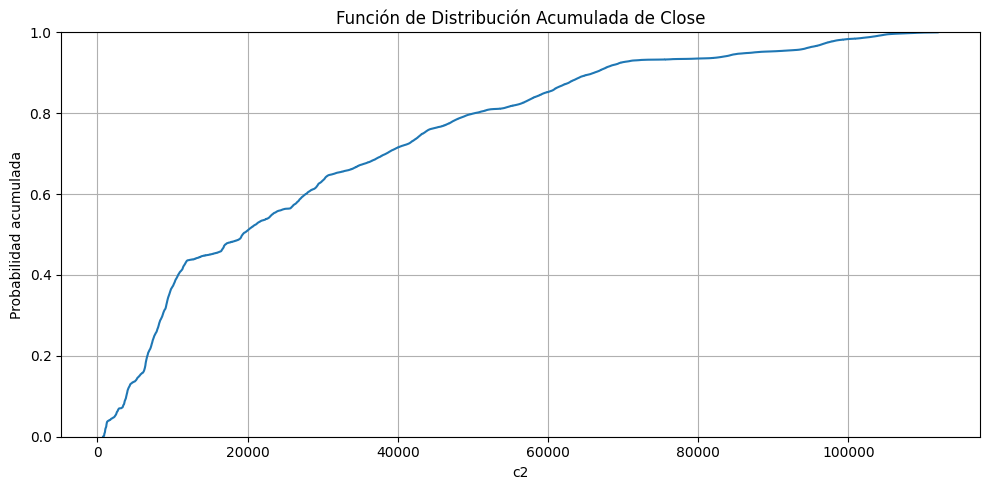

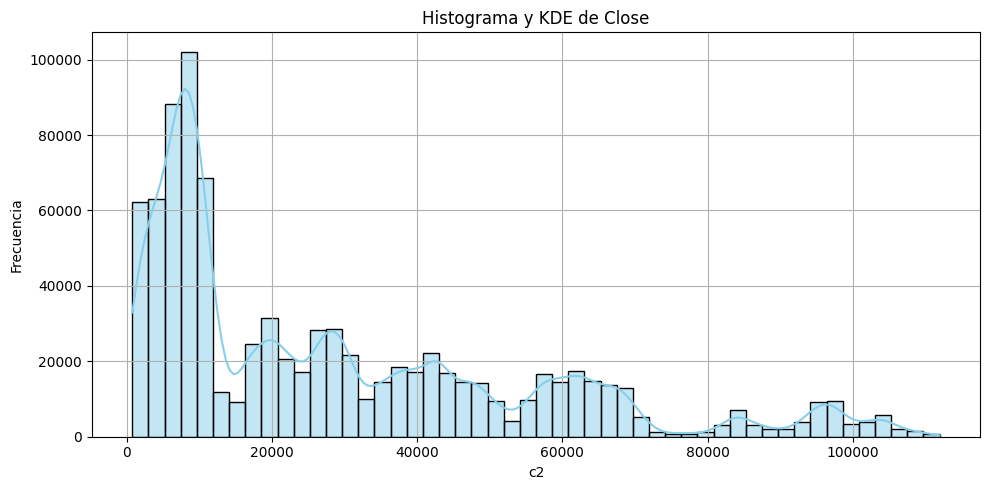

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import numpy as np

# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
desv_std = data.std()
asimetria = skew(data)
curtosis_val = kurtosis(data)


# Filtrar valores nulos e infinitos
data = mf1["Close"].replace([np.inf, -np.inf], np.nan).dropna()


# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
moda = mode(data, keepdims=True).mode[0]
desv_std = data.std()
var_muestral = data.var()
var_poblacional = data.var(ddof=0)
coef_var = (desv_std / media) if media != 0 else np.nan
iqr = data.quantile(0.75) - data.quantile(0.25)
asimetria = skew(data)
curtosis_val = kurtosis(data)

# Mostrar estadísticas
print(f"Media: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Desviación estándar: {desv_std:.4f}")
print(f"Varianza muestral: {var_muestral:.4f}")
print(f"Varianza poblacional: {var_poblacional:.4f}")
print(f"Coeficiente de variación (CV): {coef_var:.4f}")
print(f"Rango intercuartílico (IQR): {iqr:.4f}")
print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")


# Gráfico 1: Función de distribución acumulada
plt.figure(figsize=(10, 5))
sns.ecdfplot(data)
plt.title(f'Función de Distribución Acumulada de Close')
plt.xlabel(c2)
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Histograma con KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=50, color='skyblue')
plt.title(f'Histograma y KDE de Close')
plt.xlabel(c2)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

c2

Media: 0.1183
Mediana: 0.0100
Moda: 0.0000
Desviación estándar: 89.2199
Varianza muestral: 7960.1898
Varianza poblacional: 7960.1809
Coeficiente de variación (CV): 754.2391
Rango intercuartílico (IQR): 38.5200
Asimetría (skew): -0.4803
Curtosis: 68.3601


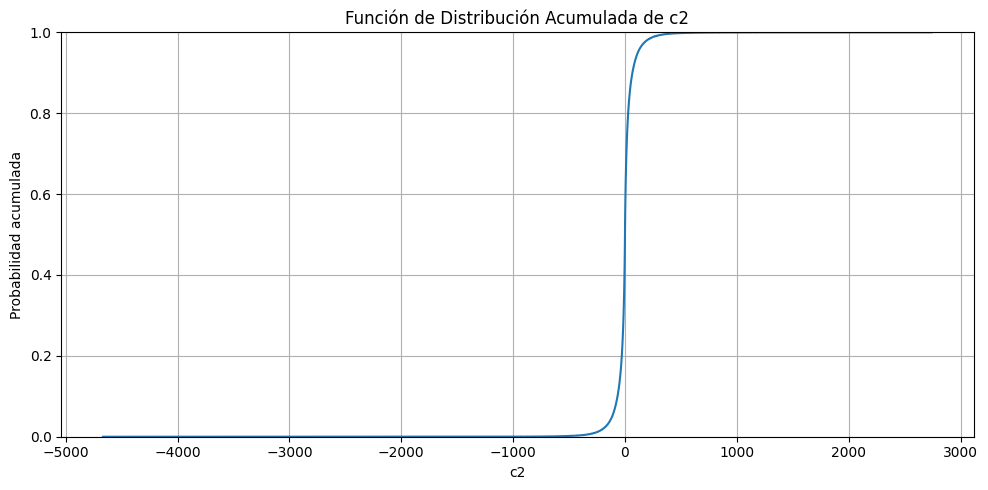

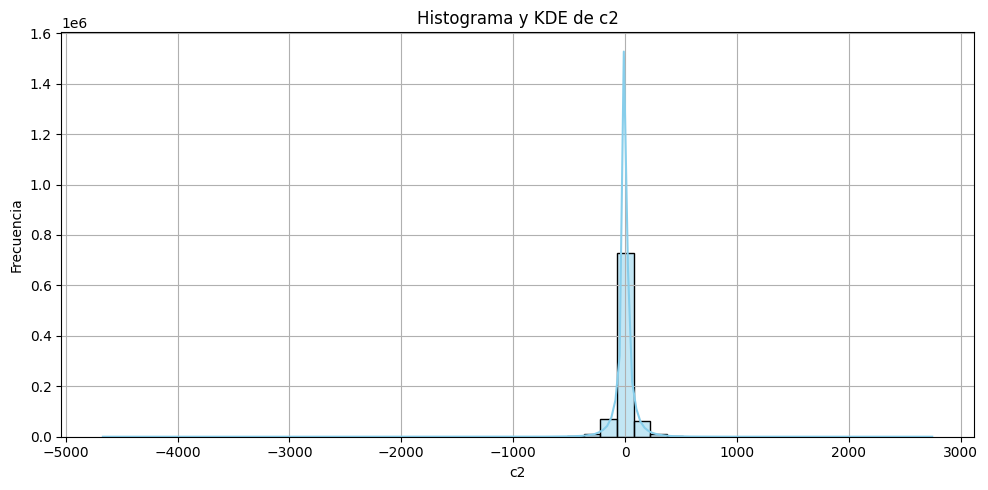

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import numpy as np

# Asegurarse de que c2 exista
c2 = 'c2'  # reemplazá por el nombre real si c2 es una variable

# Filtrar valores nulos e infinitos
data = mf1[c2].replace([np.inf, -np.inf], np.nan).dropna()

# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
desv_std = data.std()
asimetria = skew(data)
curtosis_val = kurtosis(data)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

# Asegurarse de que c2 exista
c2 = 'c2'  # Cambiá esto si el nombre de la columna es otro

# Filtrar valores nulos e infinitos
data = mf1[c2].replace([np.inf, -np.inf], np.nan).dropna()


# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
moda = mode(data, keepdims=True).mode[0]
desv_std = data.std()
var_muestral = data.var()
var_poblacional = data.var(ddof=0)
coef_var = (desv_std / media) if media != 0 else np.nan
iqr = data.quantile(0.75) - data.quantile(0.25)
asimetria = skew(data)
curtosis_val = kurtosis(data)

# Mostrar estadísticas
print(f"Media: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Desviación estándar: {desv_std:.4f}")
print(f"Varianza muestral: {var_muestral:.4f}")
print(f"Varianza poblacional: {var_poblacional:.4f}")
print(f"Coeficiente de variación (CV): {coef_var:.4f}")
print(f"Rango intercuartílico (IQR): {iqr:.4f}")
print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")


# Gráfico 1: Función de distribución acumulada
plt.figure(figsize=(10, 5))
sns.ecdfplot(data)
plt.title(f'Función de Distribución Acumulada de {c2}')
plt.xlabel(c2)
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Histograma con KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=50, color='skyblue')
plt.title(f'Histograma y KDE de {c2}')
plt.xlabel(c2)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()



Y1_1

Media: 0.5338
Mediana: 1.0000
Moda: 1.0000
Desviación estándar: 0.4989
Varianza muestral: 0.2489
Varianza poblacional: 0.2489
Coeficiente de variación (CV): 0.9345
Rango intercuartílico (IQR): 1.0000
Asimetría (skew): -0.1356
Curtosis: -1.9816


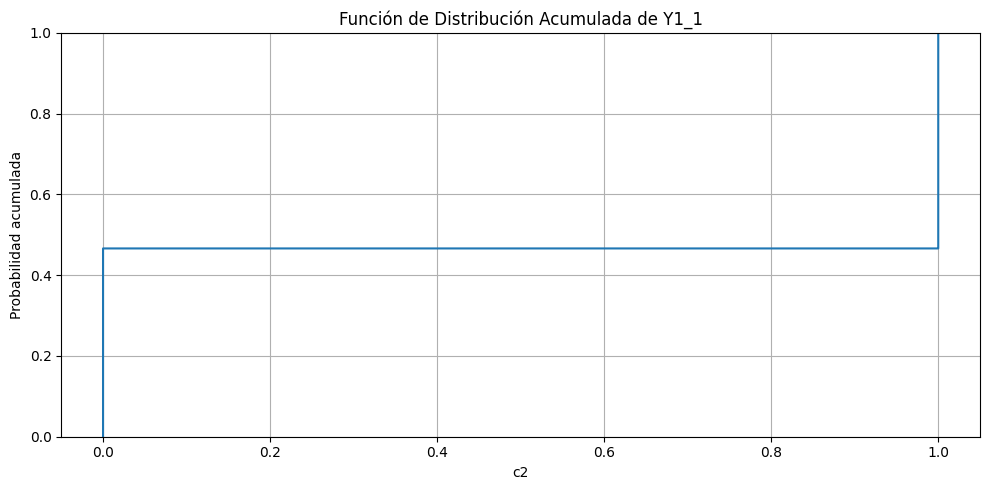

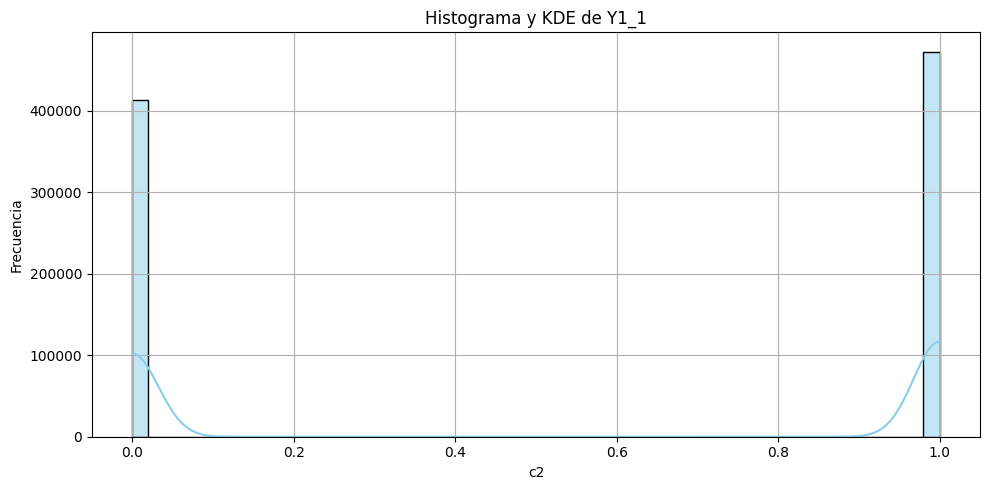

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import numpy as np

# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
desv_std = data.std()
asimetria = skew(data)
curtosis_val = kurtosis(data)


# Filtrar valores nulos e infinitos
data = mf1["Y1_1"].replace([np.inf, -np.inf], np.nan).dropna()


# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
moda = mode(data, keepdims=True).mode[0]
desv_std = data.std()
var_muestral = data.var()
var_poblacional = data.var(ddof=0)
coef_var = (desv_std / media) if media != 0 else np.nan
iqr = data.quantile(0.75) - data.quantile(0.25)
asimetria = skew(data)
curtosis_val = kurtosis(data)

# Mostrar estadísticas
print(f"Media: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Desviación estándar: {desv_std:.4f}")
print(f"Varianza muestral: {var_muestral:.4f}")
print(f"Varianza poblacional: {var_poblacional:.4f}")
print(f"Coeficiente de variación (CV): {coef_var:.4f}")
print(f"Rango intercuartílico (IQR): {iqr:.4f}")
print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")


# Gráfico 1: Función de distribución acumulada
plt.figure(figsize=(10, 5))
sns.ecdfplot(data)
plt.title(f'Función de Distribución Acumulada de Y1_1')
plt.xlabel(c2)
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Histograma con KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=50, color='skyblue')
plt.title(f'Histograma y KDE de Y1_1')
plt.xlabel(c2)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

#notas

In [ ]:
# "VB_VVo_regimen" etiqueta interactiva o de contexto, MI decente,
# MI decente, Gragner bueno, AUC malo = 0.48

# "Voc1"
# MI malo, Gragner malo, AUC bueno = 0.55

# "QBpc"
# MI malo, Gragner bueno, AUC malo = 0.48



# "VB_VVo_regimen"

In [ ]:
#RSI3a
# Mi Bueno, excelente CG y AUC = 0.49
#RSI2a
# Mi zafa, excelente CG y AUC = 0.49
#RSI1a
# Mi debil, excelente CG y AUC = 0.5
#RSI_10
# Mi zafa, excelente CG y AUC = 0.56

In [ ]:
#K10
# mi= 0.082, gragner excelente, AUC = 0.55
#K15
# mi = 0.045727, granger excelente, AUC = 0.57
#K30
# mi = 0.022816, granger excelente, ACU = 0.58
#K1h
# mi = 0.015307, granger excelente, AUC = 0.58
#K2h
# mi = 0.011, granger excelente, AUC = 0.57

#_cat TODOS
#"K4m_cat", "K6m_cat", "K2m_cat"

In [ ]:
# # # # # El bloque %K es de alta prioridad, tiene señal individual y memoria. Es oro puro para arquitectura secuencial y debe ser incluido entero o como bloque dimensional.
# # # # # K10 y K15: usalos como features base fundamentales.
# # # # # K30, K1h, K2h: no como features sueltas, pero sí como parte de un stack de momentum temporal, o en modelos que detectan condiciones de mercado, tipo atención o gating.

In [ ]:
#D10_6
# mi = 0.028, granger excelente, AUC 0.54
#D10_12
## mi = 0.019, granger excelente, AUC 0.53
#D10_24
## mi = 0.011, granger excelente, AUC 0.52

In [ ]:
# # # # # NO las metas sueltas.
# # # # # D10_6 es rescatable como parte de bloques de corto plazo.
# # # # # D10_12 y D10_24 son más contextuales y deben ser incluidas solo si construís una arquitectura de largo plazo tipo LSTM o atención multiescala.

In [ ]:
#MOM_10
# mi = 0.012, Granger excelente, AUC = 0.58
#MOM_10
# mi = 0.011, Granger excelente, AUC = 0.57
#MOM_30
# mi = 0.01, Granger excelente, AUC = 0.57

In [ ]:
# # # # # En los MOM, la info directa sobre la Y es pésima (MI), pero su capacidad de clasificación no lo es.
# # # # # Si tenés que elegir solo uno: MOM_10 es el que va.
# # # # # MOM_20 y MOM_30: solo si los combinás con otros features o en modelos secuenciales.

In [ ]:
#BBR_10
# mi = 0.01, mal granger (solo zafa el septimo lag), AUC = 0.57
#BBR_15
# mi = 0.01, granger excelente y mejroa segun mas lags, AUC= 0.58
#BBR_30
# mi = 0.012059, granger excelente hasta 6to lag, AUC= 0.59
#BBR_1h
# mi = 0.012, granger excelente, AUC= 0.58
#BBR_2h
# mi = 0.012, granger excelente, AUC= 0.58

In [ ]:
# # # # # Core discriminativo: BBR_30, BBR_15
# # # # # Latentes estructurales secuenciales: BBR_1h, BBR_2h
# # # # # Estático puro (sin secuencia): BBR_10
# # # # # Etiqueta sugerida:
# # # # # Bloque_BBR (Bollinger Band Ratio — alta AUC, memoria creciente, señal técnica)

# # # # # Usá BBR_30 como titular absoluto.
# # # # # BBR_15 y 1h sirven como compañeros de stack.
# # # # # BBR_2h solo si hacés modelos con capas de memoria extendida.
# # # # # BBR_10 se puede usar en modelos sin memoria, pero no vale la pena meterla en redes.

In [ ]:
#M5
# mi = 0.017928, granger excelente, AUC= 0.6
#M10
# mi = 0.016748, granger excelente, AUC= 0.5971
#M15
# mi = 0.015392, granger excelente, AUC= 0.5933
#M30
# mi = 0.013523, granger excelente, AUC= 0.5896
#M1h
# mi = 0.011678, granger excelente, AUC= 0.5829

In [ ]:
# # # # # Core total / must-have: M5, M10, M15
# # # # # Soporte estructural: M30, M1h
# # # # # Etiqueta sugerida:
# # # # # Bloque_M (momentum compuesto — AUC top, Granger total, MI relevante)

# # # # # Este bloque es oro puro para modelos secuenciales.
# # # # # Si vas a armar un LSTM, estas cinco variables pueden ser la base principal del input técnico.
# # # # # Aunque la MI sea baja, los AUC de ~0.59–0.60 son altísimos para clasificación binaria real con serie temporal.

In [ ]:
#L3d
# mi = 0.148418, granger pesimo, AUC= 0.5971
#L4h
# mi = 0.139774, granger pesimo, AUC= 0.5005
#L1h
# mi = 0.1392, granger pesimo, AUC= 0.4992
#L6m
# mi = 0.13523, granger pesimo, AUC= 0.5896
# Solo L3d (MI = 0.148, AUC ≈ 0.60) y L6m (MI = 0.135, AUC ≈ 0.589) se salvan. Estas pueden capturar estados de largo plazo (e.g. régimen de tendencia) que correlacionan levemente con la clase.
# USAR SOLO COMO CONTEXTO, JAMAS COMO PREDICTOR

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # features = [
# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE M (momentum compuesto) ===
# # # # # # # # # # # # # # # # # # # # # # #     'M5', 'M10', 'M15', 'M30', 'M1h',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE BBR (Bollinger Band Ratio) ===
# # # # # # # # # # # # # # # # # # # # # # #     'BBR_10', 'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_2h',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE K (estocástico) ===
# # # # # # # # # # # # # # # # # # # # # # #     'K10', 'K15', 'K30', 'K1h', 'K2h',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE RSI (índice de fuerza relativa) ===
# # # # # # # # # # # # # # # # # # # # # # #     'RSI_10', 'RSI_3a', 'RSI_2a', 'RSI_1a',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE MOM (momentum clásico) ===
# # # # # # # # # # # # # # # # # # # # # # #     'MOM_10', 'MOM_15', 'MOM_30',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE D10 (deltas multihorizonte) ===
# # # # # # # # # # # # # # # # # # # # # # #     'D10_6', 'D10_12', 'D10_24',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE TENDENCIAL Y VELA ===
# # # # # # # # # # # # # # # # # # # # # # #     'Prob_Tendencial_Suavizada',
# # # # # # # # # # # # # # # # # # # # # # #     'Prob_Vela_Alcista',

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE REGÍMENES Y DERIVADAS DE VOLATILIDAD ===
# # # # # # # # # # # # # # # # # # # # # # #     'VB_VVo_regimen',  # causal fuerte, MI baja, uso contextual
# # # # # # # # # # # # # # # # # # # # # # #     'VoC1',            # AUC aceptable, sin Granger
# # # # # # # # # # # # # # # # # # # # # # #     'QBpc',            # Granger fuerte, sin AUC, input latente

# # # # # # # # # # # # # # # # # # # # # # #     # === BLOQUE NO CONVENCIONAL LATENTE ===
# # # # # # # # # # # # # # # # # # # # # # #     'RER_tanh',              # estructura secuencial
# # # # # # # # # # # # # # # # # # # # # # #     'Fuerza_Empujada'        # experimental, pero con Granger fuerte
# # # # # # # # # # # # # # # # # # # # # # # ]

#*LABORATORY*

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoS

Experimental

Media: 0.4998
Mediana: 0.4979
Moda: 0.0996
Desviación estándar: 0.3895
Varianza muestral: 0.1517
Varianza poblacional: 0.1517
Coeficiente de variación (CV): 0.7794
Rango intercuartílico (IQR): 0.8497
Asimetría (skew): 0.0016
Curtosis: -1.6996


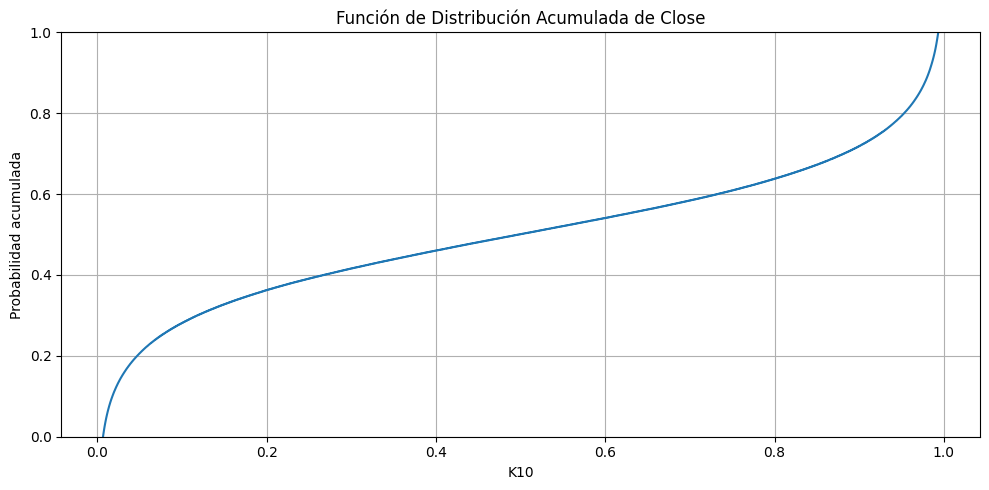

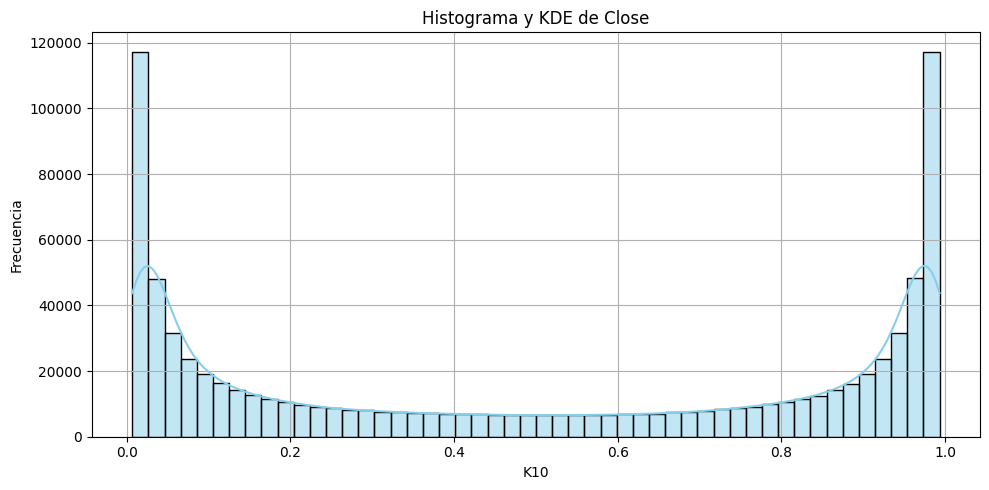

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import numpy as np


# Filtrar valores nulos e infinitos
data = mf1["BBR_15_sig"].replace([np.inf, -np.inf], np.nan).dropna()


# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
moda = mode(data, keepdims=True).mode[0]
desv_std = data.std()
var_muestral = data.var()
var_poblacional = data.var(ddof=0)
coef_var = (desv_std / media) if media != 0 else np.nan
iqr = data.quantile(0.75) - data.quantile(0.25)
asimetria = skew(data)
curtosis_val = kurtosis(data)

# Mostrar estadísticas
print(f"Media: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Desviación estándar: {desv_std:.4f}")
print(f"Varianza muestral: {var_muestral:.4f}")
print(f"Varianza poblacional: {var_poblacional:.4f}")
print(f"Coeficiente de variación (CV): {coef_var:.4f}")
print(f"Rango intercuartílico (IQR): {iqr:.4f}")
print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")


# Gráfico 1: Función de distribución acumulada
plt.figure(figsize=(10, 5))
sns.ecdfplot(data)
plt.title(f'Función de Distribución Acumulada de Close')
plt.xlabel("K10")
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Histograma con KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=50, color='skyblue')
plt.title(f'Histograma y KDE de Close')
plt.xlabel("K10")
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Asegurate de que no haya NaNs
df_bbr = mf1[['RSI_10']].dropna().copy()

# Obtener los valores de corte de cada decil
percentiles = [i / 10 for i in range(11)]  # 0.0, 0.1, ..., 1.0
limites_deciles = df_bbr['RSI_10'].quantile(percentiles)

print(limites_deciles)

0.0      0.000000
0.1      8.430497
0.2     33.750317
0.3     41.626038
0.4     46.704394
0.5     50.059614
0.6     53.621952
0.7     58.793687
0.8     66.816897
0.9     97.462617
1.0    100.000000
Name: RSI_15, dtype: float64


Resultados

Transformacion sigmoide sin romper temporalidad

In [ ]:
import numpy as np
import pandas as pd
from scipy.special import expit  # Sigmoid

def rolling_quantile_sigmoid_batch(df, columns, window=50000, min_periods=10000, epsilon=1e-9):
    """
    Para cada columna en `columns`, agrega dos nuevas columnas al DataFrame:
    - _pct: percentil histórico rolling
    - _sig: sigmoide aplicada sobre el percentil

    Todo el cálculo respeta la temporalidad: solo usa datos pasados.

    Parámetros:
    - df: DataFrame original (modificado in-place)
    - columns: lista de columnas a procesar
    - window: tamaño total de la ventana rolling
    - min_periods: mínimo de observaciones válidas necesarias
    """
    for col in columns:
        values = df[col].values
        pct_result = np.full_like(values, fill_value=np.nan, dtype=float)
        sig_result = np.full_like(values, fill_value=np.nan, dtype=float)

        for t in range(window, len(values)):
            window_values = values[t - window:t]
            window_values = window_values[~np.isnan(window_values)]

            if len(window_values) < min_periods or np.isnan(values[t]):
                continue

            rank = np.sum(window_values < values[t])
            percentile = rank / len(window_values)
            percentile = np.clip(percentile, epsilon, 1 - epsilon)

            pct_result[t] = percentile
            sig_result[t] = expit(10 * (percentile - 0.5))

        df[f"{col}_pct"] = pct_result
        df[f"{col}_sig"] = sig_result

    return df

In [ ]:
columnas_a_transformar = ["M5", "M10", "M15", "M30", "M1h", "BBR_10", "BBR_15", "BBR_30"]

mf1 = rolling_quantile_sigmoid_batch(mf1, columnas_a_transformar)

/tmp/ipython-input-25-386995043.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_pct"] = pct_result
/tmp/ipython-input-25-386995043.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_sig"] = sig_result
/tmp/ipython-input-25-386995043.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
# "BBR_1h", "BBR_2h" son cuasi normales si transformacion

Categoricas

In [ ]:
k_vars = ['K15', 'K30', 'K1h', 'K2h', 'K2m', 'K4m', 'K6m']

# Aplicamos versión categórica
def categorizar_k(k_value):
    if k_value <= 33:
        return 0  # Sobreventa
    elif k_value >= 67:
        return 2  # Sobrecompra
    else:
        return 1  # Zona neutra

for k in k_vars:
        mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)


/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)
/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)
/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoS

# LSTM

In [ ]:
# Lista de features seleccionadas
features = [
    # === BLOQUE M (momentum compuesto) ===
    'M5_sig', 'M10_sig', 'M15_sig', 'M30_sig', 'M1h_sig',

    # === BLOQUE BBR (Bollinger Band Ratio) ===
    'BBR_10_sig', 'BBR_15_sig', 'BBR_30_sig', 'BBR_1h', 'BBR_2h',

    # === BLOQUE K (estocástico) ===
    'K10', 'K15_cat', 'K30_cat', 'K1h_cat', 'K2h_cat', "K4m_cat", "K6m_cat", "K2m_cat",
    #K15', 'K30', 'K1h', 'K2h',
    # === BLOQUE RSI (índice de fuerza relativa) ===
    'RSI_10', 'RSI_3a', 'RSI_2a', 'RSI_1a',

    # === BLOQUE MOM (momentum clásico) ===
    'MOM_10', 'MOM_15', 'MOM_30',

    # === BLOQUE D10 (deltas multihorizonte) ===
    'D10_6', 'D10_12', 'D10_24',

    # === BLOQUE TENDENCIAL Y VELA ===
    'Prob_Tendencial_Suavizada',
    'Prob_Vela_Alcista',

    # === BLOQUE REGÍMENES Y DERIVADAS DE VOLATILIDAD ===
    'VB_VVo_regimen',  # causal fuerte, MI baja, uso contextual
    'QBpc',            # Granger fuerte, sin AUC, input latente

    # === BLOQUE NO CONVENCIONAL LATENTE ===
    'RER_tanh',              # estructura secuencial
    'Fuerza_Empujada'        # experimental, pero con Granger fuerte
]
# Selección de features sin NaN
X = mf1[features].dropna().copy()

# Alinear y al índice de X, eliminando posibles NaNs en y
y = mf1.loc[X.index, 'Y1_1'].astype(float)  # primero como float por el NaN

# Eliminar cualquier NaN restante en y (generalmente al final por shift(-1))
valid_idx = y.dropna().index

# Aplicar el recorte final a X e y
X = X.loc[valid_idx].copy()
y = y.loc[valid_idx].astype(int)



# Primera división: separar entrenamiento del resto (validación + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

# Segunda división: validación y test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, shuffle=False
)


Parte 2 – Función de pérdida: Focal Loss con pesos

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(alpha=None, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
        cross_entropy = -(y_true * K.log(y_pred))
        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)
            cross_entropy *= alpha_tensor
        loss = tf.pow(1 - y_pred, gamma) * cross_entropy
        return K.sum(loss, axis=1)
    return loss


In [ ]:
# Contar cuántas observaciones hay por clase
class_counts = np.bincount(y)[1:]

# Calcular pesos como 1 / sqrt(count)
alpha = [1 / np.sqrt(count) for count in class_counts]

# Normalizar para que la suma sea 1
alpha = [x / sum(alpha) for x in alpha]


In [ ]:
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)
X_val_lstm = np.expand_dims(X_val.values, axis=1)

# One-hot encoding de y
y_train_cat = tf.keras.utils.to_categorical(y_train - 1, num_classes=5)
y_test_cat = tf.keras.utils.to_categorical(y_test - 1, num_classes=5)
y_val_cat = tf.keras.utils.to_categorical(y_val - 1, num_classes=5)

In [ ]:
X_train_lstm = X_train_lstm.astype(np.float32)
X_val_lstm = X_val_lstm.astype(np.float32)
y_train_cat = np.array(y_train_cat, dtype=np.float32)
y_val_cat = np.array(y_val_cat, dtype=np.float32)
X_test_lstm = np.array(X_test_lstm, dtype=np.float32)
y_test_cat = np.array(y_test_cat, dtype=np.float32)

Parte 4 – Definición del modelo y entrenamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(1440, X_train.shape[1])))

model.add(LSTM(256, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=focal_loss(alpha=alpha, gamma=2.0),
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Entrenamiento

In [ ]:
history = model.fit(
    X_train_lstm,
    y_train_cat,
    validation_data=(X_val_lstm, y_val_cat),
    epochs=70,
    batch_size=512,
    verbose=1
)

Epoch 1/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.4144 - loss: 0.7301 - val_accuracy: 0.5253 - val_loss: 0.1770
Epoch 2/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5470 - loss: 0.1773 - val_accuracy: 0.5270 - val_loss: 0.1735
Epoch 3/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5506 - loss: 0.1733 - val_accuracy: 0.5298 - val_loss: 0.1732
Epoch 4/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5506 - loss: 0.1725 - val_accuracy: 0.5264 - val_loss: 0.1739
Epoch 5/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5508 - loss: 0.1722 - val_accuracy: 0.5312 - val_loss: 0.1728
Epoch 6/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5497 - loss: 0.1721 - val_accuracy: 0.5364 - val_loss: 0.1727
Epoch 7/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5505 - loss: 0.1720 - val_accuracy: 0.5312 - val_loss: 0.1735
Epoch 8/70
775/775 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5500 - loss: 0.1720 - val

Resultados

In [ ]:
# Guardar el modelo
model.save('modelo_M1_lstm_focal.h5')

Metricas

VALIDACION

In [ ]:
# Predicción sobre validación
y_pred_proba = model.predict(X_val_lstm)
y_pred = np.argmax(y_pred_proba, axis=1) + 1  # convertir de 0–4 a 1–5
y_true = np.argmax(y_val_cat, axis=1) + 1     # también convertir de 0–4 a 1–5

# Reporte
report = classification_report(y_true, y_pred, output_dict=True, digits=4)
report_df = pd.DataFrame(report).transpose()
print(report_df[['precision', 'recall', 'f1-score']])

# Accuracy
accuracy = (y_pred == y_true).sum() / len(y_true)
print(f"\nAccuracy general: {accuracy:.4f}")


3541/3541 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
              precision    recall  f1-score
1              0.559666  0.620653  0.588584
5              0.500369  0.437568  0.466866
accuracy       0.535567  0.535567  0.535567
macro avg      0.530017  0.529110  0.527725
weighted avg   0.532109  0.535567  0.532018

Accuracy general: 0.5356


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)



Matriz de confusión:
[[37642 23007]
 [29616 23041]]


TEST

In [ ]:
# Predicción sobre test
y_pred_proba = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_proba, axis=1) + 1  # de 0–4 a 1–5
y_true = y_test.to_numpy() + 1

# Reporte de clasificación
report = classification_report(
    y_true, y_pred, output_dict=True, digits=4
)

# Convertimos a DataFrame
report_df = pd.DataFrame(report).transpose()

# Mostramos las métricas clave
print(report_df[['precision', 'recall', 'f1-score']])

# Accuracy general
accuracy = (y_pred == y_true).sum() / len(y_true)
print(f"\nAccuracy general: {accuracy:.4f}")

1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score
1              0.442993  0.555786  0.493021
2              0.000000  0.000000  0.000000
5              0.000000  0.000000  0.000000
accuracy       0.255609  0.255609  0.255609
macro avg      0.147664  0.185262  0.164340
weighted avg   0.203735  0.255609  0.226743

Accuracy general: 0.2556


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Matriz de confusión:
[[14481     0 11574]
 [18208     0 12390]
 [    0     0     0]]


Grafico Historia entrenamiento

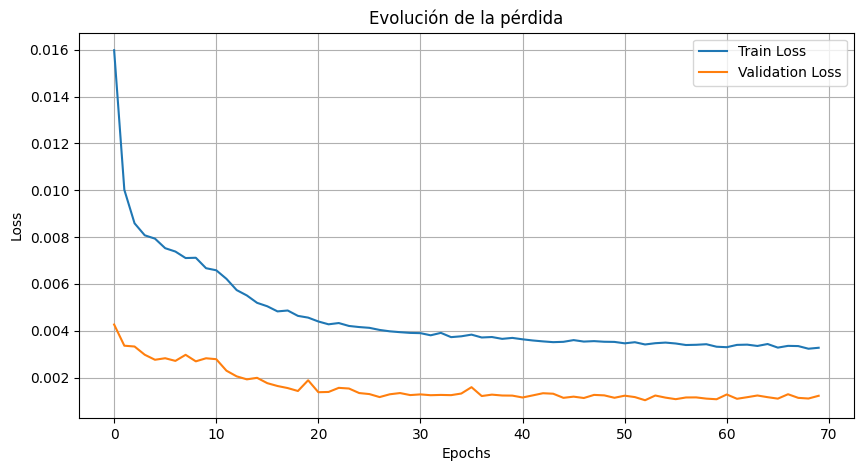

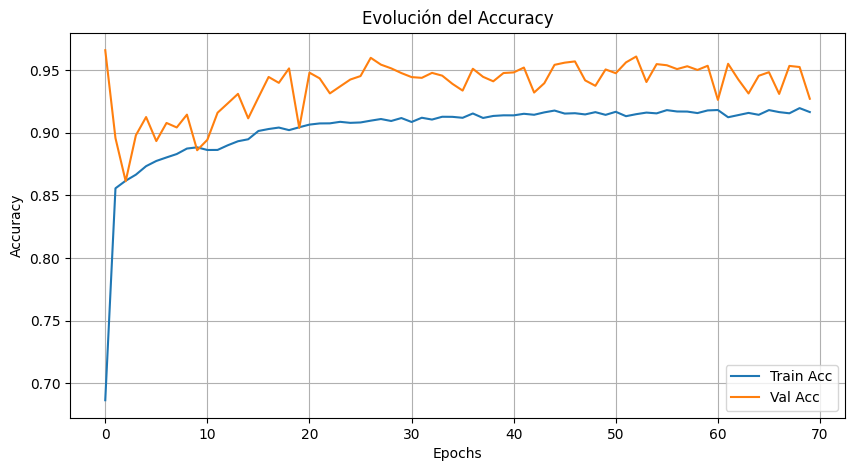

In [ ]:
# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolución de la pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Evolución del Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# XGB1 TOTAL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1","Close", "Volume", "High", "Low", 'c2', 'VoC1','v2', 'VoV1', 'VB_VVo_regimen', "VB10_30", "VB10_2h", "VVo10_1s",
            'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m', 'VB4a',
            "VVo4h", "VVo4a",
            'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_1a',  'RSI_3a',
            'K10', 'K15', 'K30', 'K1h', 'K2h', 'K1a', 'K3a',
            'MOM_10', 'MOM_15', 'MOM_30',
            "EMA_10", "EMA_5m", "EMA_1a", "EMA_2a", "EMA_3a",
            'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_3a',
            'M5', 'M30', 'M2h',
            'ATR5', 'TR',
            "RB"
            ]


target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    n_estimators=200,
    max_depth=9,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:34:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[13673 27438]
 [13144 35075]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.33      0.40     41111
           1       0.56      0.73      0.63     48219

    accuracy                           0.55     89330
   macro avg       0.54      0.53      0.52     89330
weighted avg       0.54      0.55      0.53     89330

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 6813 13742]
 [ 6498 17612]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.33      0.40     20555
           1       0.56      0.73      0.64     24110

    accuracy                           0.55     44665
   macro avg       0.54      0.53      0.52     44665
weighted avg       0.54      0.55      0.53     44665



/tmp/ipython-input-58-3080331741.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


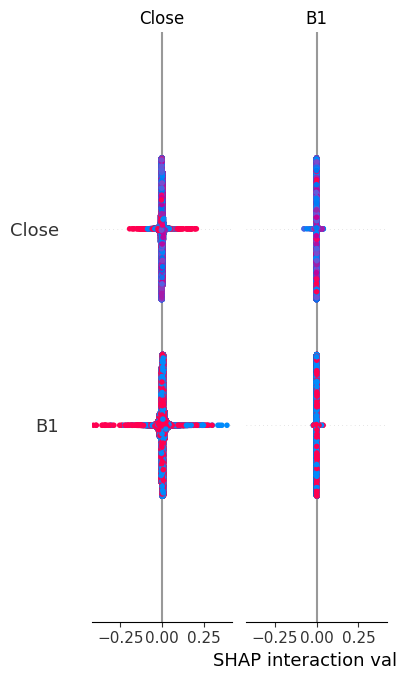

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


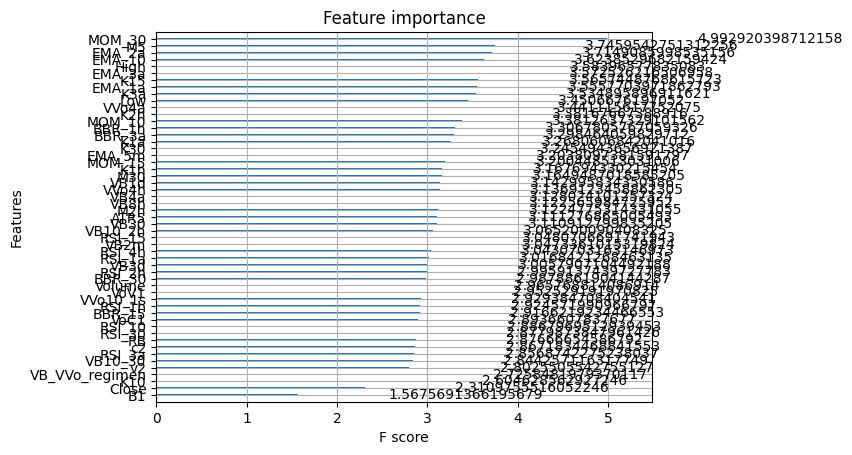

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')
plt.show()


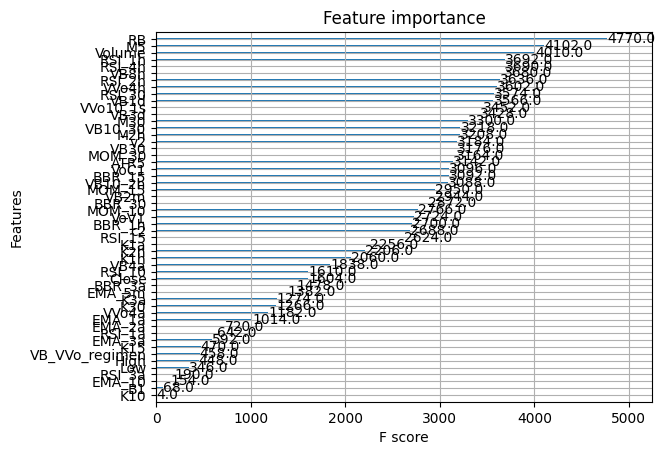

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


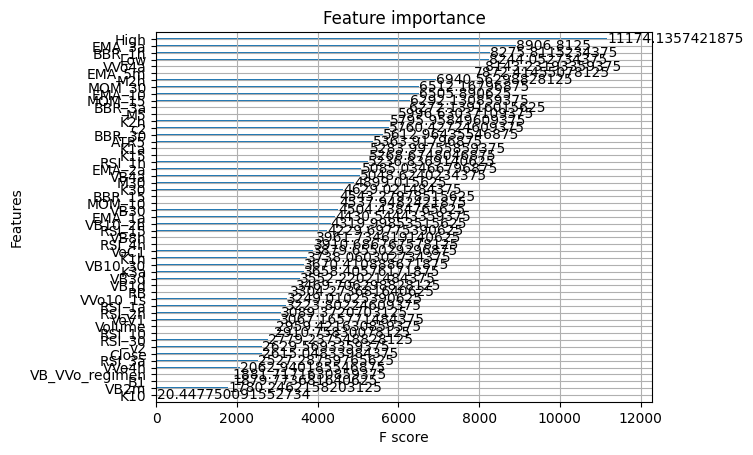

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from collections import Counter

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.feature_selection import mutual_info_classif
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import numpy as np

# # Variables explicativas y objetivo
# features = ["B1","Close", "Volume", "High", "Low",
#             'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m', 'VB4a',
#             "VVo4h", "VVo4a",
#             "VoV1h", "VoV1m", "VoV6m",
#             'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_1a',  'RSI_3a',
#             'K10', 'K15', 'K30', 'K1h', 'K2h', 'K1a', 'K3a',
#             'MOM_10', 'MOM_15', 'MOM_30',
#             "EMA_10", "EMA_5m", "EMA_1a", "EMA_2a", "EMA_3a",
#             'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_3a',
#             'M5', 'M30', 'M2h',
#             'ATR5', 'TR'
#             ]
# target = "Y1_1"

# # Eliminar filas con NaN
# df = mf1[features + [target]].dropna()
# df[target] = df[target].astype(int)

# # Definir X e y
# X = df[features]
# y = df[target]

# # División: 70% train, 30% temp
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# # División: 20% validation, 10% test (sobre el 30% restante)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# # Calcular mutual information sobre entrenamiento
# mi = mutual_info_classif(X_train, y_train, discrete_features=False)
# mi_dict = dict(zip(X_train.columns, mi))

# # Calcular importancia promedio ponderada por fila
# raw_weights = X_train.apply(lambda row: np.average([abs(row[col]) * mi_dict[col] for col in X_train.columns]), axis=1)

# # Normalizar a un rango positivo (mínimo 1)
# min_w = raw_weights.min()
# normalized_weights = (raw_weights - min_w) + 1e-5  # aseguramos >0
# sample_weight = normalized_weights.values



# # Entrenar modelo multiclase con sample_weight
# model = xgb.XGBClassifier(
#     objective='multi:softmax',
#     num_class=3,
#     n_estimators=100,
#     max_depth=6,
#     learning_rate=0.1,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# model.fit(X_train, y_train, sample_weight=sample_weight)

# # --- Evaluación en validation ---
# y_val_pred = model.predict(X_val)
# print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
# print(confusion_matrix(y_val, y_val_pred))
# print("📄 REPORT (VALIDATION):")
# print(classification_report(y_val, y_val_pred))

# # --- Evaluación en test ---
# y_test_pred = model.predict(X_test)
# print("📊 MATRIZ DE CONFUSIÓN (TEST):")
# print(confusion_matrix(y_test, y_test_pred))
# print("📄 REPORT (TEST):")
# print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6889 34247]
 [ 6750 41516]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.17      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3440 17129]
 [ 3341 20792]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.17      0.25     20569
           1       0.55      0.86      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.51      0.46     44702
weighted avg       0.53      0.54      0.48     44702



In [ ]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Cambiado a binaria
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train, sample_weight=sample_weights)


# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Configurar tamaño de ventana y paso
window_size = 10000
step_size = 2000

rolling_results = []

for start in range(0, len(X_train) - window_size - step_size, step_size):
    end_train = start + window_size
    end_val = end_train + step_size

    X_rolling_train = X_train.iloc[start:end_train]
    y_rolling_train = y_train.iloc[start:end_train]
    X_rolling_val = X_train.iloc[end_train:end_val]
    y_rolling_val = y_train.iloc[end_train:end_val]

    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    model.fit(X_rolling_train, y_rolling_train)
    y_pred = model.predict(X_rolling_val)

    score = f1_score(y_rolling_val, y_pred, average='macro')  # o clase 2
    rolling_results.append(score)

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.plot(rolling_results)
plt.title("F1 Macro por Ventana Rolling")
plt.xlabel("Ventana")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
y_shuffled = y_train.sample(frac=1.0).reset_index(drop=True)
model.fit(X_train, y_shuffled)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


# XGB1 RED

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["Volume", "VB10_2h",
            'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m', 'VB4a',
            'MOM_10', 'MOM_15', 'MOM_30',
            "EMA_1a",
            'ATR5', 'TR'
            ]


target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    n_estimators=198,
    max_depth=8,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:07:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[11174 29962]
 [10923 37343]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.27      0.35     41136
           1       0.55      0.77      0.65     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.52      0.50     89402
weighted avg       0.53      0.54      0.51     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 5475 15094]
 [ 5330 18803]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.27      0.35     20569
           1       0.55      0.78      0.65     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.50     44702
weighted avg       0.53      0.54      0.51     44702



/tmp/ipython-input-108-3080331741.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


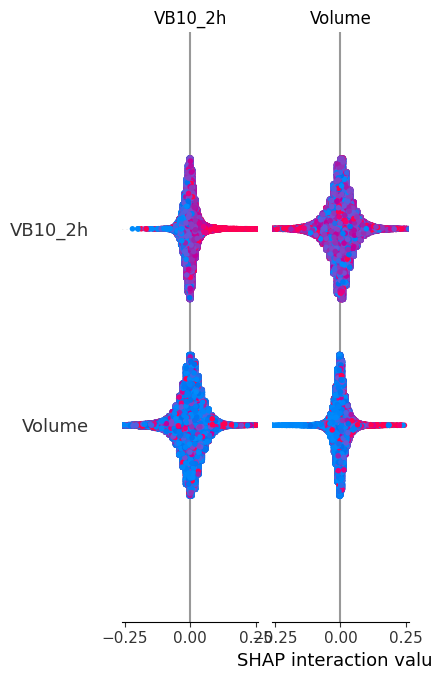

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


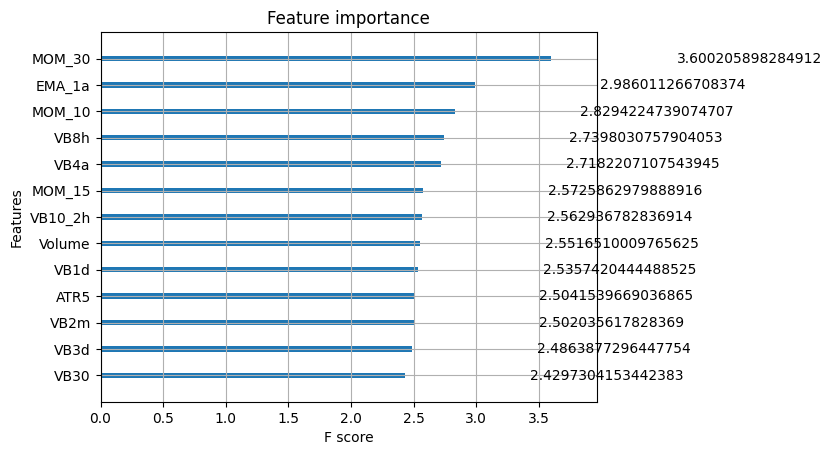

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')
plt.show()


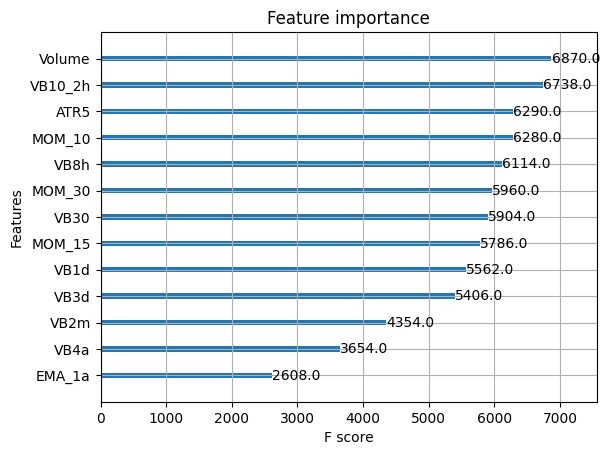

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


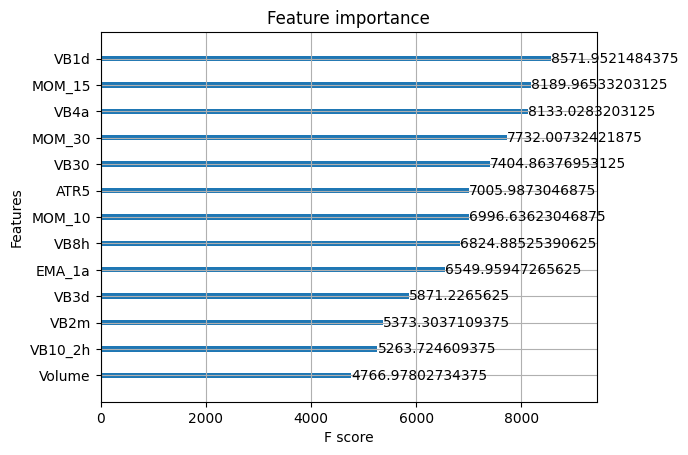

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from collections import Counter

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.feature_selection import mutual_info_classif
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import numpy as np

# # Variables explicativas y objetivo
# features = ["B1","Close", "Volume", "High", "Low",
#             'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m', 'VB4a',
#             "VVo4h", "VVo4a",
#             "VoV1h", "VoV1m", "VoV6m",
#             'RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h', 'RSI_1a',  'RSI_3a',
#             'K10', 'K15', 'K30', 'K1h', 'K2h', 'K1a', 'K3a',
#             'MOM_10', 'MOM_15', 'MOM_30',
#             "EMA_10", "EMA_5m", "EMA_1a", "EMA_2a", "EMA_3a",
#             'BBR_15', 'BBR_30', 'BBR_1h', 'BBR_3a',
#             'M5', 'M30', 'M2h',
#             'ATR5', 'TR'
#             ]
# target = "Y1_1"

# # Eliminar filas con NaN
# df = mf1[features + [target]].dropna()
# df[target] = df[target].astype(int)

# # Definir X e y
# X = df[features]
# y = df[target]

# # División: 70% train, 30% temp
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# # División: 20% validation, 10% test (sobre el 30% restante)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# # Calcular mutual information sobre entrenamiento
# mi = mutual_info_classif(X_train, y_train, discrete_features=False)
# mi_dict = dict(zip(X_train.columns, mi))

# # Calcular importancia promedio ponderada por fila
# raw_weights = X_train.apply(lambda row: np.average([abs(row[col]) * mi_dict[col] for col in X_train.columns]), axis=1)

# # Normalizar a un rango positivo (mínimo 1)
# min_w = raw_weights.min()
# normalized_weights = (raw_weights - min_w) + 1e-5  # aseguramos >0
# sample_weight = normalized_weights.values



# # Entrenar modelo multiclase con sample_weight
# model = xgb.XGBClassifier(
#     objective='multi:softmax',
#     num_class=3,
#     n_estimators=100,
#     max_depth=6,
#     learning_rate=0.1,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# model.fit(X_train, y_train, sample_weight=sample_weight)

# # --- Evaluación en validation ---
# y_val_pred = model.predict(X_val)
# print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
# print(confusion_matrix(y_val, y_val_pred))
# print("📄 REPORT (VALIDATION):")
# print(classification_report(y_val, y_val_pred))

# # --- Evaluación en test ---
# y_test_pred = model.predict(X_test)
# print("📊 MATRIZ DE CONFUSIÓN (TEST):")
# print(confusion_matrix(y_test, y_test_pred))
# print("📄 REPORT (TEST):")
# print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6889 34247]
 [ 6750 41516]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.17      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3440 17129]
 [ 3341 20792]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.17      0.25     20569
           1       0.55      0.86      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.51      0.46     44702
weighted avg       0.53      0.54      0.48     44702



In [ ]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Cambiado a binaria
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train, sample_weight=sample_weights)


# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Configurar tamaño de ventana y paso
window_size = 10000
step_size = 2000

rolling_results = []

for start in range(0, len(X_train) - window_size - step_size, step_size):
    end_train = start + window_size
    end_val = end_train + step_size

    X_rolling_train = X_train.iloc[start:end_train]
    y_rolling_train = y_train.iloc[start:end_train]
    X_rolling_val = X_train.iloc[end_train:end_val]
    y_rolling_val = y_train.iloc[end_train:end_val]

    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    model.fit(X_rolling_train, y_rolling_train)
    y_pred = model.predict(X_rolling_val)

    score = f1_score(y_rolling_val, y_pred, average='macro')  # o clase 2
    rolling_results.append(score)

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.plot(rolling_results)
plt.title("F1 Macro por Ventana Rolling")
plt.xlabel("Ventana")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
y_shuffled = y_train.sample(frac=1.0).reset_index(drop=True)
model.fit(X_train, y_shuffled)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


# XGB pausado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = [ 'K10', 'K15', 'K30', 'K1h', 'K2h', 'D10_6', 'D10_12',
            'MOM_1PCA1_1','MOM_10', 'MOM_15', "BLR5", "BLR_1PCA1_1",
             "RSIV_2a", "RSIV_3a", 'HH4a', 'HH2a', "LL2a"]
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Calcular mutual information sobre entrenamiento
mi = mutual_info_classif(X_train, y_train, discrete_features=False)
mi_dict = dict(zip(X_train.columns, mi))

# Calcular importancia promedio ponderada por fila
raw_weights = X_train.apply(lambda row: np.average([abs(row[col]) * mi_dict[col] for col in X_train.columns]), axis=1)

# Normalizar a un rango positivo (mínimo 1)
min_w = raw_weights.min()
normalized_weights = (raw_weights - min_w) + 1e-5  # aseguramos >0
sample_weight = normalized_weights.values



# Entrenar modelo multiclase con sample_weight
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train, sample_weight=sample_weight)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[14849 38437]
 [12545 49035]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.54      0.28      0.37     53286
           1       0.56      0.80      0.66     61580

    accuracy                           0.56    114866
   macro avg       0.55      0.54      0.51    114866
weighted avg       0.55      0.56      0.52    114866

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 7531 19112]
 [ 6241 24549]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.55      0.28      0.37     26643
           1       0.56      0.80      0.66     30790

    accuracy                           0.56     57433
   macro avg       0.55      0.54      0.52     57433
weighted avg       0.56      0.56      0.53     57433



In [ ]:
import joblib

# Guardar modelo en un archivo .joblib
joblib.dump(model, 'xgb_softmax_model.joblib')


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from collections import Counter

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Cambiado a binaria
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train, sample_weight=sample_weights)


# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[42179 11107]
 [43773 17807]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.49      0.79      0.61     53286
           1       0.62      0.29      0.39     61580

    accuracy                           0.52    114866
   macro avg       0.55      0.54      0.50    114866
weighted avg       0.56      0.52      0.49    114866

📊 MATRIZ DE CONFUSIÓN (TEST):
[[21057  5586]
 [21825  8965]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.49      0.79      0.61     26643
           1       0.62      0.29      0.40     30790

    accuracy                           0.52     57433
   macro avg       0.55      0.54      0.50     57433
weighted avg       0.56      0.52      0.49     57433



In [ ]:
import joblib

# Guardar modelo en un archivo .joblib
joblib.dump(model, 'xgb1_softmax_model.joblib')


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# Cargar modelos entrenados
model_a = joblib.load('xgb_softmax_model.joblib')    # Fuerte en clase 1
model_b = joblib.load('xgb1_softmax_model.joblib')   # Fuerte en clase 0

# Obtener probabilidades de ambos modelos
proba_a_val = model_a.predict_proba(X_val)
proba_b_val = model_b.predict_proba(X_val)

proba_a_test = model_a.predict_proba(X_test)
proba_b_test = model_b.predict_proba(X_test)

# Ponderación por clase según fortalezas
# - Más peso a clase 1 en modelo_a
# - Más peso a clase 0 en modelo_b
# Si son solo 2 clases
weights = np.array([
    [0.05, 0.95],  # Clase 0 → modelo B más fuerte
    [0.95, 0.05],

])

def fix_proba_shape(proba, target_classes=2):
    if proba.shape[1] < target_classes:
        fixed = np.zeros((proba.shape[0], target_classes))
        fixed[:, :proba.shape[1]] = proba
        return fixed
    return proba

def weighted_softmax_ensemble(proba_a, proba_b, weights):
    # Asegurar que ambos tengan la misma cantidad de clases
    proba_a = fix_proba_shape(proba_a, target_classes=len(weights))
    proba_b = fix_proba_shape(proba_b, target_classes=len(weights))

    final = np.zeros_like(proba_a)
    for i in range(len(weights)):
        wa, wb = weights[i]
        final[:, i] = proba_a[:, i] * wa + proba_b[:, i] * wb
    return np.argmax(final, axis=1)


# Ensamble final
y_val_ens = weighted_softmax_ensemble(proba_a_val, proba_b_val, weights)
y_test_ens = weighted_softmax_ensemble(proba_a_test, proba_b_test, weights)

# Evaluación
for name, y_true, y_pred in [("VALIDATION", y_val, y_val_ens), ("TEST", y_test, y_test_ens)]:
    print(f"\n📊 MATRIZ DE CONFUSIÓN ({name}):")
    print(confusion_matrix(y_true, y_pred))
    print(f"📄 REPORT ({name}):")
    print(classification_report(y_true, y_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Configurar tamaño de ventana y paso
window_size = 10000
step_size = 2000

rolling_results = []

for start in range(0, len(X_train) - window_size - step_size, step_size):
    end_train = start + window_size
    end_val = end_train + step_size

    X_rolling_train = X_train.iloc[start:end_train]
    y_rolling_train = y_train.iloc[start:end_train]
    X_rolling_val = X_train.iloc[end_train:end_val]
    y_rolling_val = y_train.iloc[end_train:end_val]

    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    model.fit(X_rolling_train, y_rolling_train)
    y_pred = model.predict(X_rolling_val)

    score = f1_score(y_rolling_val, y_pred, average='macro')  # o clase 2
    rolling_results.append(score)

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.plot(rolling_results)
plt.title("F1 Macro por Ventana Rolling")
plt.xlabel("Ventana")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
y_shuffled = y_train.sample(frac=1.0).reset_index(drop=True)
model.fit(X_train, y_shuffled)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


# XGB1 BEST + Premio minoritaria

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# 🎯 Asignar peso a cada clase (recompensa por predecir la clase 2 correctamente)
# Invertimos la lógica del peso de errores: menor peso = menor castigo si se equivoca
# entonces dar más peso equivale a forzarlo a predecir mejor esa clase
weights = y_train.map({0: 1.0, 1: 1.0, 2: 2.0}).values  # Recompensa por aprender la clase 2

# Entrenar modelo multiclase con peso por muestra
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train, sample_weight=weights)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Configurar tamaño de ventana y paso
window_size = 10000
step_size = 2000

rolling_results = []

for start in range(0, len(X_train) - window_size - step_size, step_size):
    end_train = start + window_size
    end_val = end_train + step_size

    X_rolling_train = X_train.iloc[start:end_train]
    y_rolling_train = y_train.iloc[start:end_train]
    X_rolling_val = X_train.iloc[end_train:end_val]
    y_rolling_val = y_train.iloc[end_train:end_val]

    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    model.fit(X_rolling_train, y_rolling_train)
    y_pred = model.predict(X_rolling_val)

    score = f1_score(y_rolling_val, y_pred, average='macro')  # o clase 2
    rolling_results.append(score)

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.plot(rolling_results)
plt.title("F1 Macro por Ventana Rolling")
plt.xlabel("Ventana")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
y_shuffled = y_train.sample(frac=1.0).reset_index(drop=True)
model.fit(X_train, y_shuffled)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


# No VB10

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = ['Volume', 'VoM', 'DominanciaMBTC', 'cp2', 'vp2',
            'MOM_1h',  "VoV10", "VoV30", "VoV_PCA1_1",
            'VoC_PCA_2', 'VB_PCA_1', 'VB_PCA_2']
target = "B"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

#ESQUEMA POR UNIVERSO POR CAPAS TEMPORALES

In [ ]:
# VoV
for nombre in ventanas_vol.keys():
    vb_col = f"VB{nombre}"
    vov_col = f"VoV{nombre}"

    if vb_col in mf1.columns:
        mf1[vov_col] = np.sqrt(mf1["Volumet"] * mf1[vb_col])


**MCP1**

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VoV5", "VoV10", "VoV15", "VoV30", "VoV1h", "VoV2h", "VoV4h", "VoV6h", "VoV12h",
             "VoV1d", "VoV3d", "VoV4d", "VoV5d", "VoV1s", "VoV2s", "VoV1m", "VoV2m", "VoV3m",
             "VoV4m", "VoV5m", "VoV6m", "VoV9m", "VoV1a", "VoV2a", "VoV3a"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# "VoV30", "VoV1h"
# PCA corto y PcA largo

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h"]
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VVo_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VVo4m", "VVo5m", "VVo6m", "VVo9m", "VVo1a"]
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VVo_1PCA2_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['VVo_1PCA1_1', 'VVo_1PCA1_2', 'VVo_1PCA1_3', 'VVo_1PCA1_4', 'VVo_1PCA2_1', 'VVo_1PCA2_2', 'VVo_1PCA2_3', 'VVo_1PCA2_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# variables = ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h"]
# loadings = pd.Series(pca.components_[0], index=variables)

# print("Cargas del primer componente:")
# print(loadings.sort_values(ascending=False))

# print("\nVarianza explicada por el primer componente:")
# print(pca.explained_variance_ratio_[0])


In [ ]:
# variables = ["VVo2m", "VVo3m", "VVo4m", "VVo5m", "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]
# loadings = pd.Series(pca.components_[0], index=variables)

# print("Cargas del primer componente:")
# print(loadings.sort_values(ascending=False))

# print("\nVarianza explicada por el primer componente:")
# print(pca.explained_variance_ratio_[0])


In [ ]:
#Optimo:
# ["VoV30", "VoV1h", "VVo_1PCA1_1", "VVo_1PCA2_1", "VVo_1PCA2_2"]

**MCP2**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VVo5","VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m", "VVo3m", "VVo4m", "VVo5m",
 "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B2'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

In [ ]:
# "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"
# + PCA 5<=VBs<=2m +  PCA 2m<VBs<=6m

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VVo_2PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VVo3m", "VVo4m", "VVo5m","VVo6m"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VVo_2PCA2_{i+1}'] = principal_component[:, i]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VB2a", 'VB3a', 'VB_1PCA_1', 'VVo_2PCA1_1', 'VVo_2PCA1_2',
            'VVo_2PCA1_3', 'VVo_2PCA1_4', 'VVo_2PCA2_1', 'VVo_2PCA2_2',
            'VVo_2PCA2_3', 'VVo_2PCA2_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B2'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# variables = ['VB3m', 'VB4m', 'VB5m', 'VB6m', 'VB9m', 'VB1a', 'VB2a', "VB3a"]
# loadings = pd.Series(pca.components_[1], index=variables)

# print("Cargas del x componente:")
# print(loadings.sort_values(ascending=False))

# print("\nVarianza explicada por el x componente:")
# print(pca.explained_variance_ratio_[1])


In [ ]:
# "VVo_2PCA2_1", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"

**MCP3**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VVo5","VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h", "VVo12h", "VVo1d",
 "VVo3d", "VVo4d", "VVo5d", "VVo1s", "VVo2s", "VVo1m", "VVo2m", "VVo3m", "VVo4m", "VVo5m",
 "VVo6m", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B3'].fillna(2).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

In [ ]:
#  "VVo2a", "VVo3a"
# + PCA  ["VVo3m", "VVo4m", "VVo5m", "VVo6m", "VVo9m", "VVo1a"]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VVo3m", "VVo4m", "VVo5m", "VVo6m", "VVo9m", "VVo1a"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VVo_3PCA_{i+1}'] = principal_component[:, i]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['VB1m', 'VB2m', 'VB3m',
             'VB4m', 'VB5m', 'VB6m', 'VB9m']

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VB_2PCA2_{i+1}'] = principal_component[:, i]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VVo9m", "VVo1a", 'VVo_3PCA_1', 'VVo_3PCA_2', 'VVo_3PCA_3', 'VVo_3PCA_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B3'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# variables = ['VB3m', 'VB4m', 'VB5m', 'VB6m', 'VB9m', 'VB1a', 'VB2a', "VB3a"]
# loadings = pd.Series(pca.components_[1], index=variables)

# print("Cargas del x componente:")
# print(loadings.sort_values(ascending=False))

# print("\nVarianza explicada por el x componente:")
# print(pca.explained_variance_ratio_[1])


In [ ]:
#  "VVo_3PCA_1", "VVo_3PCA_2", "VVo9m", "VVo1a", "VVo2a", "VVo3a"

**SHAP ZONE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = list(set([
    "VoV30", "VoV1h", "VVo_1PCA1_1", "VVo_1PCA2_1", "VVo_1PCA2_2"
]))

target = "B1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()

**RESUMEN**

B1

In [ ]:
# ['VVo_1PCA1_1', "VVo2m", "VVo3m", "VVo4m", "VVo9m", "VVo1a", "VVo3a"]
#Los PCA son con: ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h"]

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[14167 12248 12295]
#  [ 8341 24323  6925]
#  [14120 12252 11911]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.39      0.37      0.38     38710
#            1       0.50      0.61      0.55     39589
#            2       0.38      0.31      0.34     38283

#     accuracy                           0.43    116582
#    macro avg       0.42      0.43      0.42    116582
# weighted avg       0.42      0.43      0.42    116582

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[ 7076  6153  6126]
#  [ 4271 12182  3342]
#  [ 7070  6092  5980]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.38      0.37      0.37     19355
#            1       0.50      0.62      0.55     19795
#            2       0.39      0.31      0.35     19142

#     accuracy                           0.43     58292
#    macro avg       0.42      0.43      0.42     58292
# weighted avg       0.42      0.43      0.43     58292

B2

In [ ]:
# "VVo_2PCA2_1", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"
# "VVo_2PCA2_1", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"
# PCA armados con: ['VB1m', 'VB2m', 'VB3m', 'VB4m', 'VB5m', 'VB6m', 'VB9m']

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[17313  5301 13090]
#  [ 9663  8775  7030]
#  [16623  5237 13390]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.40      0.48      0.44     35704
#            1       0.45      0.34      0.39     25468
#            2       0.40      0.38      0.39     35250

#     accuracy                           0.41     96422
#    macro avg       0.42      0.40      0.41     96422
# weighted avg       0.41      0.41      0.41     96422

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[8629 2698 6525]
#  [4808 4418 3508]
#  [8351 2587 6688]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.40      0.48      0.44     17852
#            1       0.46      0.35      0.39     12734
#            2       0.40      0.38      0.39     17626

#     accuracy                           0.41     48212
#    macro avg       0.42      0.40      0.41     48212
# weighted avg       0.41      0.41      0.41     48212

B3

In [ ]:
# ""VVo_3PCA_1", "VVo_3PCA_2", "VVo9m", "VVo1a", "VVo2a", "VVo3a"

#LOS PCA ENTORPECIAN EL MODELO. MODELO SIN PCAs:

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[27744  2974 15350]
#  [13073  4898  7353]
#  [26247  2983 15960]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.41      0.60      0.49     46068
#            1       0.45      0.19      0.27     25324
#            2       0.41      0.35      0.38     45190

#     accuracy                           0.42    116582
#    macro avg       0.43      0.38      0.38    116582
# weighted avg       0.42      0.42      0.40    116582

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[13884  1506  7644]
#  [ 6574  2350  3738]
#  [13170  1441  7985]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.41      0.60      0.49     23034
#            1       0.44      0.19      0.26     12662
#            2       0.41      0.35      0.38     22596

#     accuracy                           0.42     58292
#    macro avg       0.42      0.38      0.38     58292
# weighted avg       0.42      0.42      0.40     58292

Por si sola la volatilidad pierde mucho poder predictivo en BTC, a 5 minutos, marca muy bien la tendencia, pero en 15 ya es casi 100% dummy, esto es llamativo
porque en todos los analisis se extrae de manera cauteloza las variables más influyentes de este universo, para su respectivo B (B, B1 y B2)

# "Superfeature" MCP3

In [ ]:
# Supuestos:
# VB2a, VVo6m son los más informativos estructuralmente
# MOM3 = momentum de 3 pasos (últimos 15 min)
# B1, B2 son clases (0 = sube, 1 = neutro, 2 = baja)

mf1["B1_adj"] = mf1["B1"].replace({0: 1, 1: 0, 2: -1})
mf1["B2_adj"] = mf1["B2"].replace({0: 1, 1: 0, 2: -1})

# MOM3: momentum simple (puede mejorarse)
mf1["MOM3"] = mf1["Close"] - mf1["Close"].shift(3)

# Normalización robusta (con rolling mediana por estabilidad)
mf1["VB_norm"] = mf1["VB2a"] / mf1["VB2a"].rolling(2016).median()
mf1["VVo_norm"] = mf1["VVo6m"] / mf1["VVo6m"].rolling(2016).median()
mf1["MOM3_norm"] = mf1["MOM3"] / mf1["Close"].shift(3)

# Superfeature: Índice de Presión Acumulada (IPA)
mf1["IPA"] = (
    mf1["VB_norm"] *
    mf1["VVo_norm"] *
    (1 + mf1["B1_adj"]*0.5 + mf1["B2_adj"]*0.3) *
    np.sign(mf1["MOM3_norm"])
)


#VoV

In [ ]:
# VoV
for nombre in ventanas_vol.keys():
    vb_col = f"VB{nombre}"
    vov_col = f"VoV{nombre}"

    if vb_col in mf1.columns:
        mf1[vov_col] = np.sqrt( mf1[vb_col]*mf1["Volume"])

/tmp/ipython-input-15-950921132.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vov_col] = np.sqrt( mf1[vb_col]*mf1["Volume"])
/tmp/ipython-input-15-950921132.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[vov_col] = np.sqrt( mf1[vb_col]*mf1["Volume"])
/tmp/ipython-input-15-950921132.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

**MCP1**

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'MC', 'Y1_1', 'SD_1', 'VB5', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RB", "VoV10", "VoV15", "VoV30", "VoV1h", "VoV2h", "VoV4h", "VoV6h", "VoV12h",
             "VoV1d", "VoV3d", "VoV4d", "VoV5d", "VoV1s", "VoV2s", "VoV1m", "VoV2m", "VoV3m",
             "VoV4m", "VoV5m", "VoV6m", "VoV9m", "VoV1a", "VoV2a", "VoV3a"]

# Filtrar filas donde B1 no sea NaN
df_filtrado = mf1[~mf1['Y1_1'].isna()]

# Definir X e y
X = df_filtrado[variables].fillna(0)  # Podés seguir llenando NaN en X si querés
y = df_filtrado['Y1_1'].astype(int)     # Ya no tiene NaN, se puede convertir directamente


# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


   Variable  Mutual Information
14    VoV1m            0.001930
5     VoV4h            0.001882
0     VoV10            0.001641
8     VoV1d            0.001426
13    VoV2s            0.001420
2     VoV30            0.001312
7    VoV12h            0.001287
3     VoV1h            0.001165
16    VoV3m            0.001125
21    VoV1a            0.001099
9     VoV3d            0.001089
12    VoV1s            0.001059
4     VoV2h            0.001025
10    VoV4d            0.000861
11    VoV5d            0.000746
15    VoV2m            0.000725
20    VoV9m            0.000715
6     VoV6h            0.000482
1     VoV15            0.000269
22    VoV2a            0.000247
23    VoV3a            0.000161
19    VoV6m            0.000112
18    VoV5m            0.000074
17    VoV4m            0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", "VoV10", "VoV15", "VoV30", "VoV1h", "VoV2h", "VoV4h", "VoV6h", "VoV12h",
             "VoV1d", "VoV3d", "VoV4d", "VoV5d", "VoV1s", "VoV2s", "VoV1m", "VoV2m", "VoV3m",
             "VoV4m", "VoV5m", "VoV6m", "VoV9m", "VoV1a", "VoV2a", "VoV3a"]

# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 556587


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

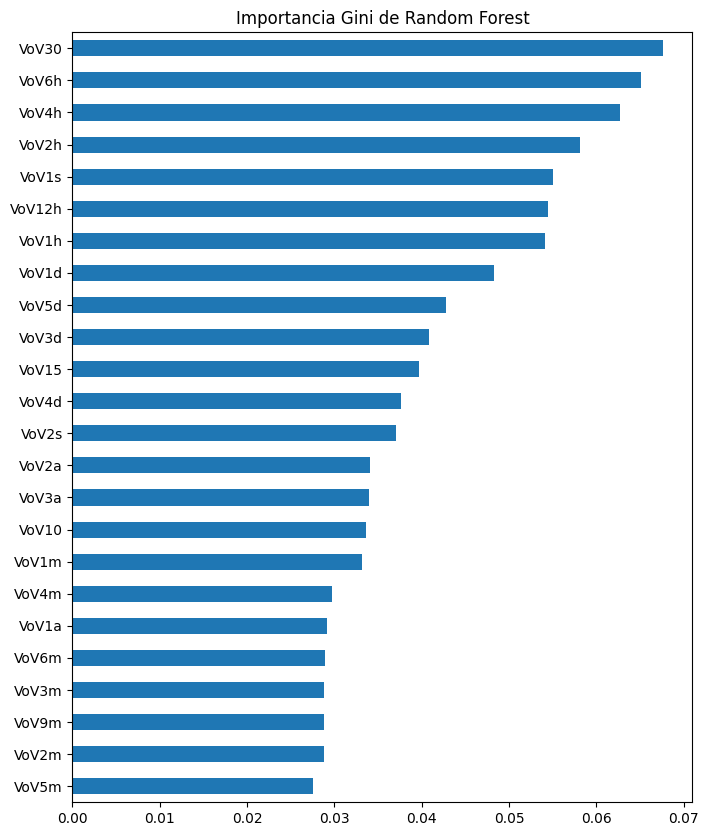

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


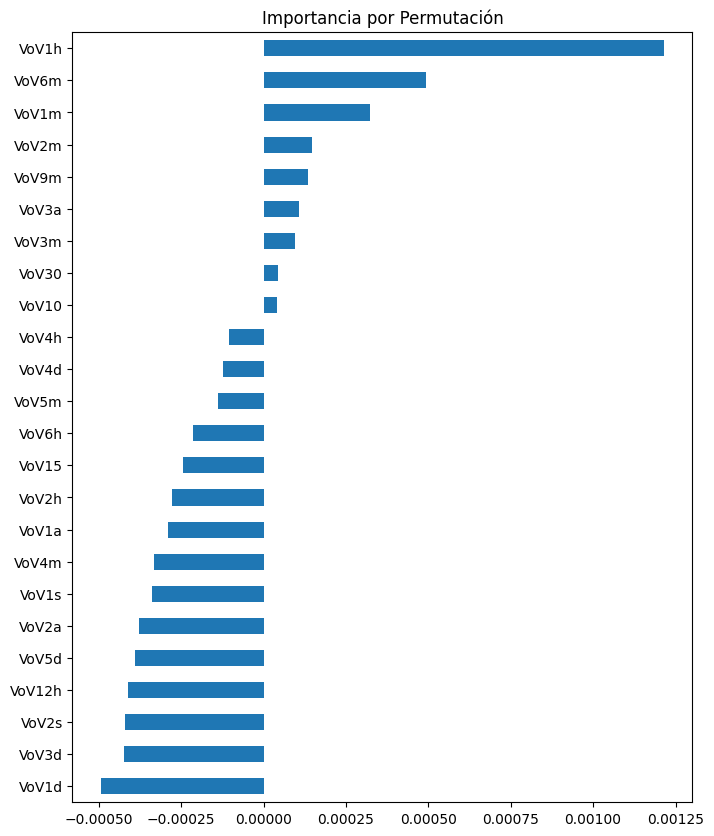

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
#VB30; VB4a
#VB15, VB 8H,

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Variables explicativas y objetivo
features = ["B1",'VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']
target = "Y1_1"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Conteo de clases
conteo_clases = dict(Counter(y_train))
total = sum(conteo_clases.values())

# Peso inversamente proporcional al conteo (simula γ focal loss)
pesos = {clase: (1 - (conteo / total))**2 for clase, conteo in conteo_clases.items()}

# Aplicar a cada muestra de y_train
sample_weights = y_train.map(pesos)

# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 MATRIZ DE CONFUSIÓN (VALIDATION):
[[ 6711 34425]
 [ 6520 41746]]
📄 REPORT (VALIDATION):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     41136
           1       0.55      0.86      0.67     48266

    accuracy                           0.54     89402
   macro avg       0.53      0.51      0.46     89402
weighted avg       0.53      0.54      0.48     89402

📊 MATRIZ DE CONFUSIÓN (TEST):
[[ 3369 17200]
 [ 3202 20931]]
📄 REPORT (TEST):
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     20569
           1       0.55      0.87      0.67     24133

    accuracy                           0.54     44702
   macro avg       0.53      0.52      0.46     44702
weighted avg       0.53      0.54      0.48     44702



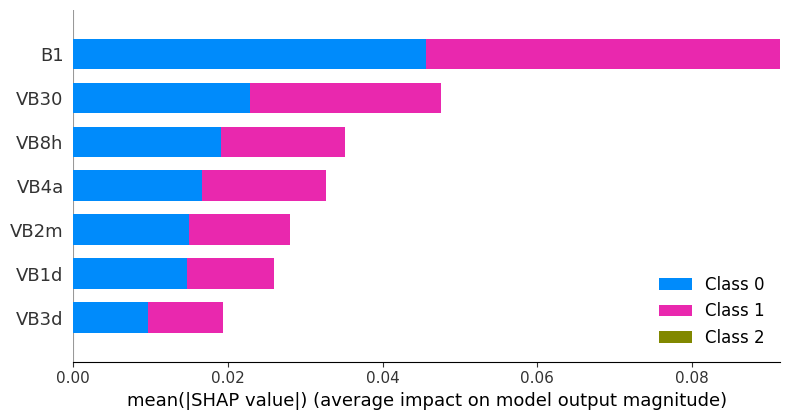

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


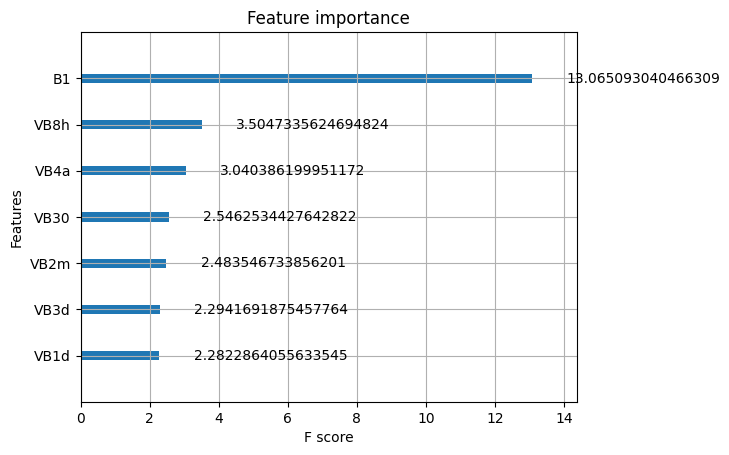

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


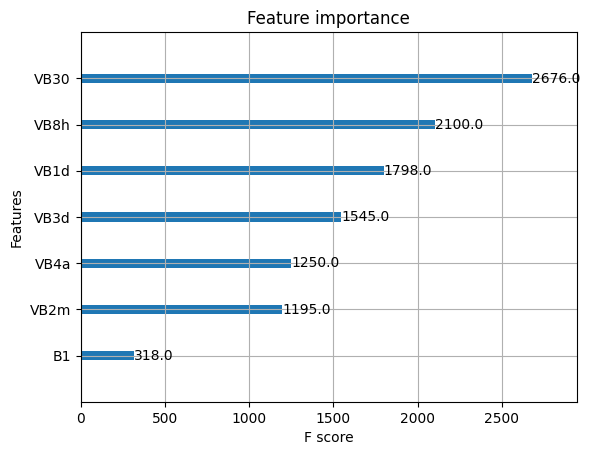

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


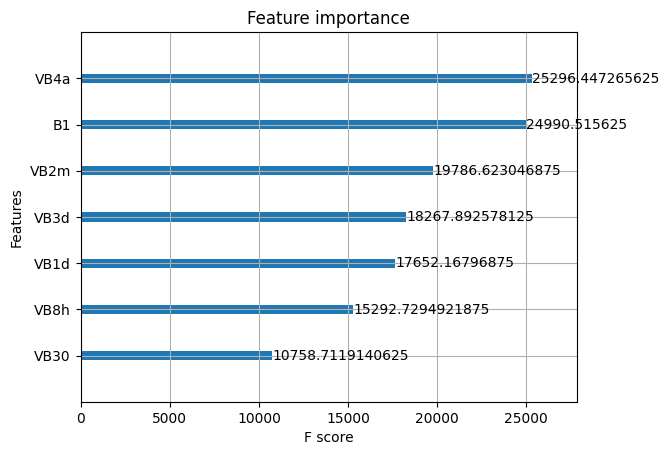

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='cover')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ['VB10','VB15','VB30', 'VB1h']

# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=3)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(3):
#     mf1.loc[subset.index, f'VB_1PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
# PCA sin evaluar
# ['VB30', 'VB8h', 'VB1d', 'VB3d', 'VB2m',  'VB4a']

# Siendo superior muy ligeramente el que tiene los PCA

# Modelado es muy regular en clase 1, lo unico quizas rescatable seria su recall
# Esto nos dice que podria aportar para dar estabilidad al modelo

#VoC

In [ ]:
# Crear VoC dinámicamente a partir de las VVo existentes
for nombre in ventanas_vol.keys():
    vvo_col = f"VVo{nombre}"
    voc_col = f"VoC{nombre}"

    if vvo_col in mf1.columns:
        mf1[voc_col] = np.sqrt(mf1["c2"]* mf1[vvo_col])

/tmp/ipython-input-16-1358318608.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[voc_col] = np.sqrt(mf1["Close"]* mf1[vvo_col])
/tmp/ipython-input-16-1358318608.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[voc_col] = np.sqrt(mf1["Close"]* mf1[vvo_col])
/tmp/ipython-input-16-1358318608.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

**MCP1**

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VoC10", "VoC15", "VoC30", "VoC1h", "VoC2h", "VoC4h", "VoC6h", "VoC8h", "VoC12h",
 "VoC1d", "VoC3d", "VoC5d", "VoC1s", "VoC2s", "VoC1m", "VoC2m", "VoC3m",
 "VoC4m", "VoC5m", "VoC6m", "VoC9m", "VoC1a", "VoC2a", "VoC3a"]
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Variables
X_vars = ["RB", "VoC10", "VoC15", "VoC30", "VoC1h", "VoC2h", "VoC4h", "VoC6h", "VoC8h", "VoC12h",
 "VoC1d", "VoC3d", "VoC5d", "VoC1s", "VoC2s", "VoC1m", "VoC2m", "VoC3m",
 "VoC4m", "VoC5m", "VoC6m", "VoC9m", "VoC1a", "VoC2a", "VoC3a"]

# Definir X e y
X = mf1[X_vars]
y = mf1['Y1_1']

# Unir y limpiar simultáneamente
df_clean = X.copy()
df_clean["Y1_1"] = y
df_clean = df_clean.dropna()

# Redefinir X e y ya limpios
X = df_clean[X_vars]
y = df_clean["Y1_1"]

print(f"Cantidad de muestras: {len(X)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)


Cantidad de muestras: 556587


RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

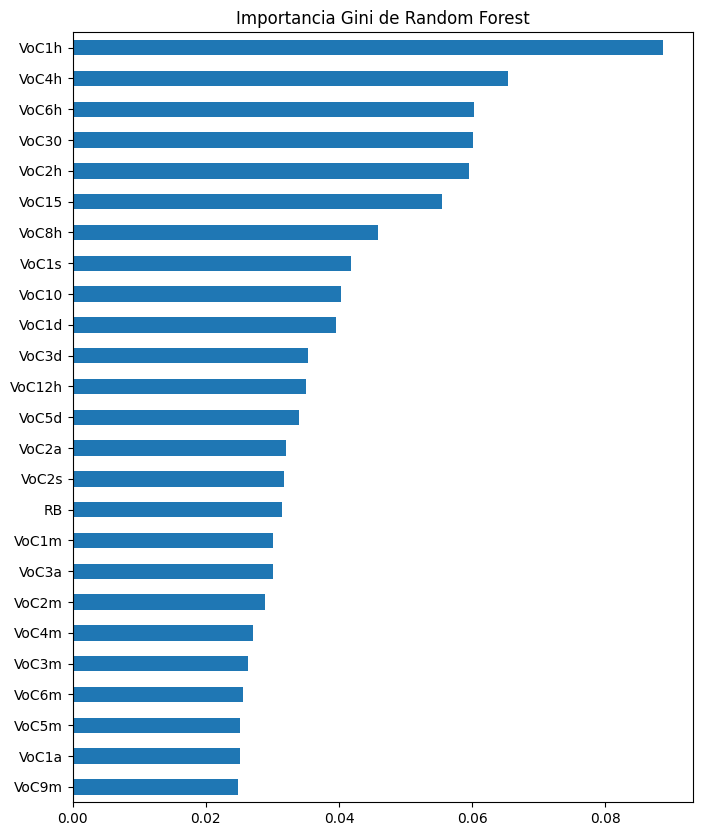

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = pd.Series(rf.feature_importances_, index=X_vars)
importancias.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia Gini de Random Forest")
plt.show()


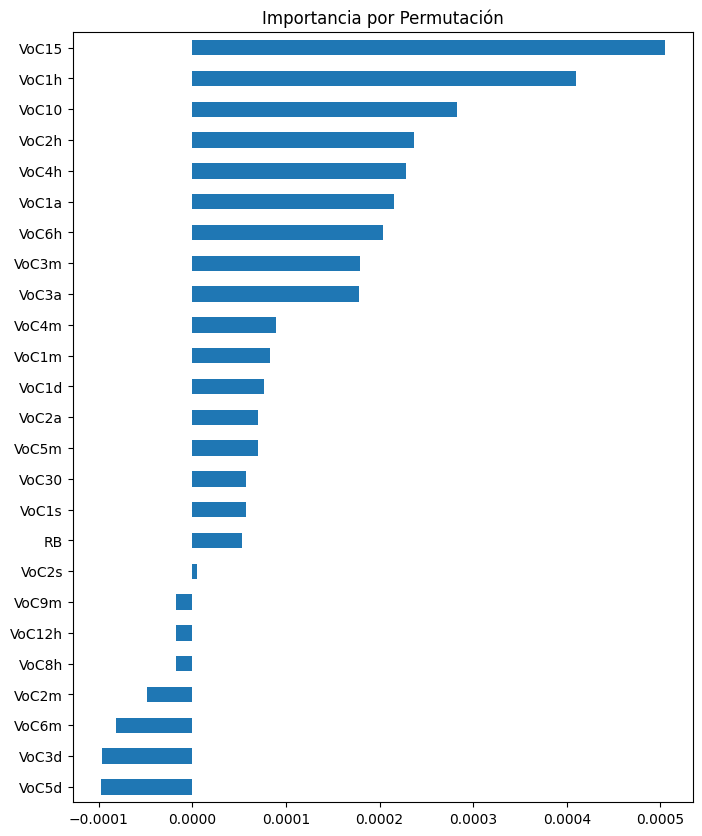

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.Series(perm.importances_mean, index=X_vars)
importancia_perm.sort_values(ascending=True).plot.barh(figsize=(8, 10))
plt.title("Importancia por Permutación")
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Variables de volatilidad
# variables = ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h"]
# # Eliminar filas con NaN en esas columnas
# subset = mf1[variables].dropna()

# # Normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(subset)

# # PCA
# pca = PCA(n_components=4)
# principal_component = pca.fit_transform(X_scaled)

# # Insertar el componente en el dataframe original (manteniendo el índice correcto)
# for i in range(4):
#     mf1.loc[subset.index, f'VVo_1PCA1_{i+1}'] = principal_component[:, i]

**SHAP ZONE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = list(set([
    "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a",
    "VVo_2PCA2_1", "VVo_1PCA1_1", "VVo2m", "VVo3m", "VVo4m"
]))

target = "B3"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()

**RESUMEN**

B1

In [ ]:
# ['VVo_1PCA1_1', "VVo2m", "VVo3m", "VVo4m", "VVo9m", "VVo1a", "VVo3a"]
#Los PCA son con: ["VVo10", "VVo15", "VVo30", "VVo1h", "VVo2h", "VVo4h", "VVo6h"]

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[14167 12248 12295]
#  [ 8341 24323  6925]
#  [14120 12252 11911]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.39      0.37      0.38     38710
#            1       0.50      0.61      0.55     39589
#            2       0.38      0.31      0.34     38283

#     accuracy                           0.43    116582
#    macro avg       0.42      0.43      0.42    116582
# weighted avg       0.42      0.43      0.42    116582

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[ 7076  6153  6126]
#  [ 4271 12182  3342]
#  [ 7070  6092  5980]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.38      0.37      0.37     19355
#            1       0.50      0.62      0.55     19795
#            2       0.39      0.31      0.35     19142

#     accuracy                           0.43     58292
#    macro avg       0.42      0.43      0.42     58292
# weighted avg       0.42      0.43      0.43     58292

B2

In [ ]:
# "VVo_2PCA2_1", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"
# "VVo_2PCA2_1", "VVo9m", "VVo1a", "VVo2a", "VVo3a", "VVo4a"
# PCA armados con: ['VB1m', 'VB2m', 'VB3m', 'VB4m', 'VB5m', 'VB6m', 'VB9m']

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[17313  5301 13090]
#  [ 9663  8775  7030]
#  [16623  5237 13390]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.40      0.48      0.44     35704
#            1       0.45      0.34      0.39     25468
#            2       0.40      0.38      0.39     35250

#     accuracy                           0.41     96422
#    macro avg       0.42      0.40      0.41     96422
# weighted avg       0.41      0.41      0.41     96422

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[8629 2698 6525]
#  [4808 4418 3508]
#  [8351 2587 6688]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.40      0.48      0.44     17852
#            1       0.46      0.35      0.39     12734
#            2       0.40      0.38      0.39     17626

#     accuracy                           0.41     48212
#    macro avg       0.42      0.40      0.41     48212
# weighted avg       0.41      0.41      0.41     48212

B3

In [ ]:
# ""VVo_3PCA_1", "VVo_3PCA_2", "VVo9m", "VVo1a", "VVo2a", "VVo3a"

#LOS PCA ENTORPECIAN EL MODELO. MODELO SIN PCAs:

# 📊 MATRIZ DE CONFUSIÓN (VALIDATION):
# [[27744  2974 15350]
#  [13073  4898  7353]
#  [26247  2983 15960]]
# 📄 REPORT (VALIDATION):
#               precision    recall  f1-score   support

#            0       0.41      0.60      0.49     46068
#            1       0.45      0.19      0.27     25324
#            2       0.41      0.35      0.38     45190

#     accuracy                           0.42    116582
#    macro avg       0.43      0.38      0.38    116582
# weighted avg       0.42      0.42      0.40    116582

# 📊 MATRIZ DE CONFUSIÓN (TEST):
# [[13884  1506  7644]
#  [ 6574  2350  3738]
#  [13170  1441  7985]]
# 📄 REPORT (TEST):
#               precision    recall  f1-score   support

#            0       0.41      0.60      0.49     23034
#            1       0.44      0.19      0.26     12662
#            2       0.41      0.35      0.38     22596

#     accuracy                           0.42     58292
#    macro avg       0.42      0.38      0.38     58292
# weighted avg       0.42      0.42      0.40     58292

Por si sola la volatilidad pierde mucho poder predictivo en BTC, a 5 minutos, marca muy bien la tendencia, pero en 15 ya es casi 100% dummy, esto es llamativo
porque en todos los analisis se extrae de manera cauteloza las variables más influyentes de este universo, para su respectivo B (B, B1 y B2)

#VQ

In [ ]:
mf1["QBpc"] =  (mf1["Volume"] / mf1["Close"])

In [ ]:
# Definir las ventanas para calcular volatilidad
ventanas_vol = {
    "5": 1,
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2016,
    "2s": 4032,
    "1m": 8064,
    "2m": 16128,
    "3m": 24192,
    "4m": 32256,
    "5m": 40320,
    "6m": 48384,
    "9m": 72576,
    "1a": 100800,
    "2a": 201600,
    "3a": 302400
}

# Calcular SD y Volatilidad (VB) para cada ventana
for nombre, ventana in ventanas_vol.items():
    Qsd_col = f"QSD_{ventana}"
    Qb_col = f"VQ{nombre}"

    mf1[Qsd_col] = mf1["QBpc"].rolling(window=ventana, min_periods=ventana).std()
    mf1[Qb_col] = mf1[Qsd_col] * np.sqrt(ventana)

In [ ]:
print(mf1.columns.tolist())

MCP

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VQ5", "VQ10", "VQ15", "VQ30", "VQ1h", "VQ2h", "VQ4h", "VQ6h", "VQ12h", "VQ1d",
 "VQ3d", "VQ4d", "VQ5d", "VQ1s", "VQ2s", "VQ1m", "VQ2m", "VQ3m", "VQ4m", "VQ5m",
 "VQ6m", "VQ9m", "VQ1a", "VQ2a", "VQ3a"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = [ "VQ2s", "VQ1m", "VQ2m", "VQ3m", "VQ4m", "VQ5m",
 "VQ6m", "VQ9m", "VQ1a"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VQ_PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VQ10", "VQ15", "VQ30", "VQ1h", "VQ2h", "VQ4h",
   "VQ1s"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'VQ_PCA2_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["VQ2m", 'VQ_PCA1_1', 'VQ_PCA1_2', 'VQ_PCA1_3', 'VQ_PCA1_4', 'VQ_PCA2_1', 'VQ_PCA2_2', 'VQ_PCA2_3', 'VQ_PCA2_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
variables = ["VQ10", "VQ15", "VQ30", "VQ1h", "VQ2h", "VQ4h",
   "VQ1s", "VQ2s", "VQ1m", "VQ2m", "VQ3m", "VQ4m", "VQ5m",
 "VQ6m", "VQ9m", "VQ1a", "VQ2a", "VQ3a"]
loadings = pd.Series(pca.components_[0], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[0])


SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features =  ["VQ2m", "VQ5m", 'VQ_PCA1_1', 'VQ_PCA1_2', 'VQ_PCA1_3', 'VQ_PCA1_4', 'VQ_PCA2_1', 'VQ_PCA2_2', 'VQ_PCA2_3', 'VQ_PCA2_4']
target = "B"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
#Completito:
# ["VQ2m", "VQ5m", 'VQ_PCA1_1', 'VQ_PCA1_2', 'VQ_PCA1_3', 'VQ_PCA1_4', 'VQ_PCA2_1', 'VQ_PCA2_2', 'VQ_PCA2_3', 'VQ_PCA2_4']
#Optimo:
# ['VQ_PCA_1', 'VQ_PCA_2', 'VQ_PCA_3', 'VQ_PCA_4']

# Modelo de bajo rendimento

# BL

In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, window in ventanas.items():
    mf1[f'HH{label}'] = mf1['High'].rolling(window=window, min_periods=1).max()
    mf1[f'LL{label}'] = mf1['Low'].rolling(window=window, min_periods=1).min()


/tmp/ipython-input-37-460924482.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'HH{label}'] = mf1['High'].rolling(window=window, min_periods=1).max()
/tmp/ipython-input-37-460924482.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'LL{label}'] = mf1['Low'].rolling(window=window, min_periods=1).min()
/tmp/ipython-input-37-460924482.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['HH10', 'LL10', 'HH15', 'LL15', 'HH30', 'LL30', 'HH1h', 'LL1h',
             'HH2h', 'LL2h', 'HH4h', 'LL4h', 'HH6h', 'LL6h', 'HH8h', 'LL8h',
             'HH12h', 'LL12h', 'HH1d', 'LL1d', 'HH3d', 'LL3d', 'HH4d', 'LL4d',
             'HH5d', 'LL5d', 'HH1s', 'LL1s', 'HH2s', 'LL2s', 'HH1m', 'LL1m',
             'HH2m', 'LL2m', 'HH3m', 'LL3m', 'HH4m', 'LL4m', 'HH5m', 'LL5m',
             'HH6m', 'LL6m', 'HH9m', 'LL9m', 'HH1a', 'LL1a', 'HH2a', 'LL2a',
             'HH3a', 'LL3a', 'HH4a', 'LL4a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
ventanas = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2160, "2s": 4320,
    "1m": 9132, "2m": 18264, "3m": 27369, "4m": 36528, "5m": 45660, "6m": 54792,
    "9m": 82188, "1a": 109575, "2a": 219150, "3a": 328725, "4a": 438300
}

for label, window in ventanas.items():
    mf1[f'HH{label}'] = mf1['High'].rolling(window=window, min_periods=1).max()
    mf1[f'LL{label}'] = mf1['Low'].rolling(window=window, min_periods=1).min()
    mf1[f'BLR{label}'] = ((mf1['Close'] - mf1[f'LL{label}']) / (mf1[f'HH{label}'] - mf1[f'LL{label}'])) * 100


/tmp/ipython-input-38-1727415292.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'BLR{label}'] = ((mf1['Close'] - mf1[f'LL{label}']) / (mf1[f'HH{label}'] - mf1[f'LL{label}'])) * 100
/tmp/ipython-input-38-1727415292.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'BLR{label}'] = ((mf1['Close'] - mf1[f'LL{label}']) / (mf1[f'HH{label}'] - mf1[f'LL{label}'])) * 100
/tmp/ipython-input-38-1727415292.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['BLR5', 'BLR10', 'BLR15', 'BLR30', 'BLR1h', 'BLR2h', 'BLR4h', 'BLR6h',
             'BLR8h', 'BLR12h', 'BLR1d', 'BLR3d', 'BLR4d', 'BLR5d', 'BLR1s', 'BLR2s',
             'BLR1m', 'BLR2m', 'BLR3m', 'BLR4m', 'BLR5m', 'BLR6m', 'BLR9m', 'BLR1a',
             'BLR2a', 'BLR3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['BLR5', 'BLR10', 'BLR15']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]

/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]
/tmp/ipython-input-39-3655731759.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1.loc[subset.index, f'BLR_1PCA1_{i+1}'] = principal_component[:, i]


In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['BLR_1PCA1_1', 'BLR_1PCA1_2']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


#MOMVo1

In [ ]:
# Diccionario de ventanas
ventanas_vol = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

# Calcular MOM% para cada ventana
for label, n in ventanas_vol.items():
    close_tn = mf1["Volume"].shift(n)
    mom = ((mf1["Volume"] - close_tn) / close_tn)*(mf1["Volume"])
    mf1[f"MOM_{label}"] = mom


In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['MOM_10', 'MOM_15', 'MOM_30', 'MOM_1h', 'MOM_2h', 'MOM_4h', 'MOM_6h', 'MOM_8h',
             'MOM_12h', 'MOM_1d', 'MOM_3d', 'MOM_4d', 'MOM_5d', 'MOM_1s', 'MOM_2s',
             'MOM_1m', 'MOM_2m', 'MOM_3m', 'MOM_4m', 'MOM_5m', 'MOM_6m', 'MOM_9m', 'MOM_1a', 'MOM_2a', 'MOM_3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# "MOM_10"

**RSIV_PCA1**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['MOM_15', 'MOM_30', 'MOM_1h']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(2):
    mf1.loc[subset.index, f'MOMVo_PCA_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['MOM_15', 'MOM_30', 'MOM_1h', 'MOMVo_PCA_1', 'MOMVo_PCA_2']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
variables = ['MOM_15', 'MOM_30', 'MOM_1h']
loadings = pd.Series(pca.components_[0], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[0])


In [ ]:
# "MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h'

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = ["MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h']
target = "B"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
#Completito:
# "MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h'
# Optimo:
# "MOM_10", 'MOM_15', 'MOM_1h'

# modelo fuerte en extremo superior, sobre todo en su recall es altimsimo
# probabable uso como modelo binario (varia o no?)
# ESTE ES SUPERIOR AL MOM CLASICO

# Cripto

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["Close", "Volume", "ETH_Close", "ETH_Volume", "USDT_Close", "USDT_Volume",
 "XRP_Close", "XRP_Volume", "SOL_Close", "SOL_Volume",
 "DOGE_Close", "DOGE_Volume", "VoM", "DominanciaBTC"]


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
# "MOM_10"

**RSIV_PCA1**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = [ "ETH_Close", "ETH_Volume", "USDT_Close", "USDT_Volume",
 "XRP_Close", "XRP_Volume", "SOL_Close", "SOL_Volume",
 "DOGE_Close", "DOGE_Volume", "VoM", "DominanciaBTC"]
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'Cripto_PCA_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['Cripto_PCA_1', 'Cripto_PCA_2', 'Cripto_PCA_3', 'Cripto_PCA_4',  "SOL_Close", "SOL_Volume"]
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
variables = ["Close", "Volume", "ETH_Close", "ETH_Volume", "USDT_Close", "USDT_Volume",
 "XRP_Close", "XRP_Volume", "SOL_Close", "SOL_Volume",
 "DOGE_Close", "DOGE_Volume", "VoM", "DominanciaBTC"]
loadings = pd.Series(pca.components_[0], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[0])


In [ ]:
variables = ["Close", "Volume", "ETH_Close", "ETH_Volume", "USDT_Close", "USDT_Volume",
 "XRP_Close", "XRP_Volume", "SOL_Close", "SOL_Volume",
 "DOGE_Close", "DOGE_Volume", "VoM", "DominanciaBTC"]
loadings = pd.Series(pca.components_[1], index=variables)

print("Cargas del segundo componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el segundo componente:")
print(pca.explained_variance_ratio_[1])


In [ ]:
# "MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h'

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = ["MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h']
target = "B"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
#Completito:
# "MOM_10", 'MOM_15', 'MOM_30', 'MOM_1h'
# Optimo:
# "MOM_10", 'MOM_15', 'MOM_1h'

# modelo fuerte en extremo superior, sobre todo en su recall es altimsimo
# probabable uso como modelo binario (varia o no?)
# ESTE ES SUPERIOR AL MOM CLASICO

#RSIV

In [ ]:
# Cálculo de deltas
delta = mf1['Close'].diff()
theta =mf1["Volume"]

# Diccionario de ventanas
ventanas_vol = {
    "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72, "8h": 96,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

# RSI con máximas variaciones
for label, n in ventanas_vol.items():
    gain = np.sqrt((delta.where(delta > 0, 0.0).rolling(window=n).max())*theta)
    loss = np.sqrt(((-delta.where(delta < 0, 0.0)).rolling(window=n).max())*theta)

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    mf1[f'RSIV_{label}'] = rsi


/tmp/ipython-input-140-3119771937.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'RSIV_{label}'] = rsi
/tmp/ipython-input-140-3119771937.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'RSIV_{label}'] = rsi
/tmp/ipython-input-140-3119771937.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
print(mf1.columns.tolist())

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['RSIV_10', 'RSIV_15', 'RSIV_30', 'RSIV_1h', 'RSIV_2h',
             'RSIV_4h', 'RSIV_6h', 'RSIV_8h', 'RSIV_12h', 'RSIV_1d', 'RSIV_3d', 'RSIV_4d',
             'RSIV_5d', 'RSIV_1s', 'RSIV_2s', 'RSIV_1m', 'RSIV_2m', 'RSIV_3m',
             'RSIV_4m', 'RSIV_5m', 'RSIV_6m', 'RSIV_9m', 'RSIV_1a', 'RSIV_2a', 'RSIV_3a']


# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


    Variable  Mutual Information
24   RSIV_3a            0.029309
0    RSIV_10            0.018843
23   RSIV_2a            0.015858
22   RSIV_1a            0.006640
21   RSIV_9m            0.004676
1    RSIV_15            0.004443
20   RSIV_6m            0.003720
19   RSIV_5m            0.002290
15   RSIV_1m            0.002027
18   RSIV_4m            0.001959
17   RSIV_3m            0.001943
14   RSIV_2s            0.001224
16   RSIV_2m            0.001206
10   RSIV_3d            0.001168
12   RSIV_5d            0.000850
11   RSIV_4d            0.000776
13   RSIV_1s            0.000408
9    RSIV_1d            0.000190
8   RSIV_12h            0.000000
6    RSIV_6h            0.000000
7    RSIV_8h            0.000000
4    RSIV_2h            0.000000
3    RSIV_1h            0.000000
2    RSIV_30            0.000000
5    RSIV_4h            0.000000


In [ ]:
# "RSIV_10", "RSIV_15"
# Van porque si del resto crearemos dos componentes ensamblados, considerando los lapsos
# mayores a 15 minutos y menores a 1 un dia
# mayores a 12h y menores o iguales a un año

**RSIV_PCA1**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['RSIV_30', 'RSIV_1h', 'RSIV_2h',
             'RSIV_4h', 'RSIV_6h', 'RSIV_12h']
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'RSIV_PCA1_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RSIV_6h", 'RSIV_4h', 'RSIV_PCA1_1', 'RSIV_PCA1_2', 'RSIV_PCA1_3', 'RSIV_PCA1_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
variables = ['RSIV_30', 'RSIV_1h', 'RSIV_2h',
             'RSIV_4h', 'RSIV_6h', 'RSIV_12h']
loadings = pd.Series(pca.components_[0], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[0])


In [ ]:
# "RSIV_10", "RSIV_15", "RSIV_4h", "RSIV_6h"
#primeros pca malos

**RSIV_PCA2**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['RSIV_1d', 'RSIV_3d', 'RSIV_4d', 'RSIV_5d', 'RSIV_1s', 'RSIV_2s',
             'RSIV_1m', 'RSIV_2m', 'RSIV_3m', 'RSIV_4m', 'RSIV_5m', 'RSIV_6m',
             'RSIV_9m', "RSIV_1a"]
# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=4)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
for i in range(4):
    mf1.loc[subset.index, f'RSIV_PCA2_{i+1}'] = principal_component[:, i]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ["RSIV_1d", 'RSIV_3d', 'RSIV_PCA2_1', 'RSIV_PCA2_2', 'RSIV_PCA2_3', 'RSIV_PCA2_4']
# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['B'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


In [ ]:
variables = ['RSIV_1d', 'RSIV_3d', 'RSIV_4d', 'RSIV_5d', 'RSIV_1s', 'RSIV_2s',
             'RSIV_1m', 'RSIV_2m', 'RSIV_3m', 'RSIV_4m', 'RSIV_5m', 'RSIV_6m',
             'RSIV_9m', "RSIV_1a"]
loadings = pd.Series(pca.components_[0], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[0])


In [ ]:
variables = ['RSIV_1d', 'RSIV_3d', 'RSIV_4d', 'RSIV_5d', 'RSIV_1s', 'RSIV_2s',
             'RSIV_1m', 'RSIV_2m', 'RSIV_3m', 'RSIV_4m', 'RSIV_5m', 'RSIV_6m',
             'RSIV_9m', "RSIV_1a"]
loadings = pd.Series(pca.components_[1], index=variables)

print("Cargas del primer componente:")
print(loadings.sort_values(ascending=False))

print("\nVarianza explicada por el primer componente:")
print(pca.explained_variance_ratio_[1])


In [ ]:
# "RSIV_10", "RSIV_15", "RSIV_4h", "RSIV_6h", "RSIV_1d", 'RSIV_3d', 'RSIV_PCA2_1', 'RSIV_PCA2_2'

SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Variables explicativas y objetivo
features = ["RSIV_10", "RSIV_15", "RSIV_4h", "RSIV_6h", "RSIV_1d", 'RSIV_3d', 'RSIV_PCA2_1', 'RSIV_PCA2_2']
target = "B"

# Eliminar filas con NaN
df = mf1[features + [target]].dropna()
df[target] = df[target].astype(int)

# Definir X e y
X = df[features]
y = df[target]

# División: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División: 20% validation, 10% test (sobre el 30% restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)


# Entrenar modelo multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# --- Evaluación en validation ---
y_val_pred = model.predict(X_val)
print("📊 MATRIZ DE CONFUSIÓN (VALIDATION):")
print(confusion_matrix(y_val, y_val_pred))
print("📄 REPORT (VALIDATION):")
print(classification_report(y_val, y_val_pred))

# --- Evaluación en test ---
y_test_pred = model.predict(X_test)
print("📊 MATRIZ DE CONFUSIÓN (TEST):")
print(confusion_matrix(y_test, y_test_pred))
print("📄 REPORT (TEST):")
print(classification_report(y_test, y_test_pred))


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='gain')  # gain, weight, cover
plt.show()


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
#Completito:
# "RSIV_10", "RSIV_15", "RSIV_4h", "RSIV_6h", "RSIV_1d", 'RSIV_3d', 'RSIV_PCA2_1', 'RSIV_PCA2_2'
# Optimo:
# ["RSIV_10", "RSIV_15"]
#Se excpluye al resto porque predicen donde el modelo más se equivoca, la calse neutro

# modelo fuerte en extremos, sobre todo en su recall

# CRIPTO Y FOREX


Crypto

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["Volume", "ETH_Close", "ETH_Volume", "USDT_Close", "USDT_Volume",
 "XRP_Close", "XRP_Volume", "SOL_Close", "SOL_Volume",
 "DOGE_Close", "DOGE_Volume", "VoM", "DominanciaBTC"]



# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'C_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['C_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VoM", "RSFX_EUR", "RSFX_USD", "RSFX_CHF"]



# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'CF_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['CF_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Asegurate de no tener valores nulos
mf1_clean = mf1[['Close', 'C_PCA']].dropna()

# Aplicamos el test con lags hasta 10 (podés ajustarlo)
grangercausalitytests(mf1_clean[['Close', 'C_PCA']], maxlag=10, verbose=True)


VOC

In [ ]:
# Crear VoC dinámicamente a partir de las VVo existentes
for nombre in ventanas_vol.keys():
    vvo_col = f"VVo{nombre}"
    voc_col = f"VoC{nombre}"

    if vvo_col in mf1.columns:
        mf1[voc_col] = np.sqrt(mf1["Close"]* mf1[vvo_col])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VoC10", "VoC15", "VoC30", "VoC1h", "VoC2h", "VoC4h", "VoC6h", "VoC12h",
 "VoC1d", "VoC3d", "VoC5d", "VoC1s", "VoC2s", "VoC1m", "VoC2m", "VoC3m",
 "VoC4m", "VoC5m", "VoC6m", "VoC9m", "VoC1a", "VoC2a", "VoC3a"]

# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'VoC_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['VoC_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Selección de variables
X = mf1[["VoC_PCA", "VoV_PCA"]]
y = mf1["Close"]

# Combinar X e y para eliminar las filas con NaN en cualquiera de ellos
df_temp = pd.concat([X, y], axis=1).dropna()

# Redefinir X e y limpios
X_clean = df_temp[["VoC_PCA", "VoV_PCA"]]
y_clean = df_temp["Close"]

# Ajustar modelo lineal
reg = LinearRegression().fit(X_clean, y_clean)

# Coeficientes
alpha = reg.coef_[0]
beta = reg.coef_[1]
intercept = reg.intercept_

# Predecir y guardar MarketEnergy
mf1.loc[X_clean.index, "MarketEnergy"] = reg.predict(X_clean)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Asegurate de no tener valores nulos
mf1_clean = mf1[['Close', 'MarketEnergy']].dropna()

# Aplicamos el test con lags hasta 10 (podés ajustarlo)
grangercausalitytests(mf1_clean[['Close', 'MarketEnergy']], maxlag=10, verbose=True)


In [ ]:
#neu seu importanchi
mf1["CoB1s"] = mf1["BoC1s"] *mf1["BoV1s"]

In [ ]:
mf1["CoV1s"] = mf1["VoC1s"] *mf1["VoV1s"]

In [ ]:
#volitldad cruzada nein
#mf1["VoB1s"] = mf1["VB1s"] *mf1["VVo1s"]

In [ ]:
mf1["VoB1s"] = np.sqrt(mf1["VB1s"] *mf1["VVo1s"])

In [ ]:
#nao
#mf1["me"] = np.sqrt( mf1["VoC1s"] + mf1["VoV1s"])

In [ ]:
from sklearn.linear_model import LinearRegression

# Selección de variables
X = mf1[["VoC1s", "VoV1s"]]
y = mf1["Close"]

# Combinar X e y para eliminar las filas con NaN en cualquiera de ellos
df_temp = pd.concat([X, y], axis=1).dropna()

# Redefinir X e y limpios
X_clean = df_temp[["VoC1s", "VoV1s"]]
y_clean = df_temp["Close"]

# Ajustar modelo lineal
reg = LinearRegression().fit(X_clean, y_clean)

# Coeficientes
alpha = reg.coef_[0]
beta = reg.coef_[1]
intercept = reg.intercept_

# Predecir y guardar MarketEnergy
mf1.loc[X_clean.index, "MarketEnergy"] = reg.predict(X_clean)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables
vars = ['Close','MarketEnergy', 'VQ_PCA', "VB_PCA"]

# Calcular la matriz de correlación
correlation_matrix = mf1[vars].corr()

# Mostrar la matriz de correlación numérica
print("Matriz de correlación numérica:")
print(correlation_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables
vars = ['Close','VoC_PCA', "VVo_PCA"]

# Calcular la matriz de correlación
correlation_matrix = mf1[vars].corr()

# Mostrar la matriz de correlación numérica
print("Matriz de correlación numérica:")
print(correlation_matrix)

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Variables predictoras (sin incluir Close)
X = mf1[['MarketEnergy', 'VQ_PCA', "VB_PCA"]].copy()

# Eliminar filas con NaN o inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Agregar constante
X = add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


In [ ]:
X = mf1[['MarketEnergy', 'VQ_PCA', "VB_PCA"]].dropna()
y = mf1.loc[X.index, 'Close']  # Para alinear índices

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


DMIN/DMAX

In [ ]:
# Asegurar orden temporal
mf1 = mf1.sort_values(by='Datetime')

# Diccionario de ventanas (en minutos) para granularidad 1m
ventanas = {
    "5min": 5,
    "15min": 15,
    "30min": 30,
    "1h": 60,
    "2h": 120,
    "4h": 240,
    "6h": 360,
    "12h": 720,
    "1d": 1440,
    "3d": 4320,
    "5d": 7200,
    "1s": 10080,
    "2s": 20160,
    "1m": 43200,
    "2m": 86400,
    "6m": 259200,
    "1a": 518400,
    "2a": 1036800
}


# Calcular rolling max y min por cada ventana
for nombre, window in ventanas.items():
    mf1[f"Max {nombre}"] = mf1["High"].rolling(window=window, min_periods=1).max()
    mf1[f"Min {nombre}"] = mf1["Low"].rolling(window=window, min_periods=1).min()

DDDMIN/MAX_5

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "5min" and ventanas[nombre] > ventanas["5min"]:
        mf1[f"dmax5_{nombre}"] = (mf1[f"Max {nombre}"] - mf1["Max 5min"]).abs()
        mf1[f"dmin5_{nombre}"] = (mf1[f"Min {nombre}"] - mf1["Min 5min"]).abs()

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax5_15min', 'dmin5_15min', 'dmax5_30min', 'dmin5_30min', 'dmax5_1h',
        'dmin5_1h', 'dmax5_2h', 'dmin5_2h', 'dmax5_4h', 'dmin5_4h', 'dmax5_6h',
        'dmin5_6h', 'dmax5_12h', 'dmin5_12h', 'dmax5_1d', 'dmin5_1d', 'dmax5_3d',
        'dmin5_3d', 'dmax5_5d', 'dmin5_5d', ]


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close', 'dmax5_1s', 'dmin5_1s', 'dmax5_2s',
        'dmin5_2s', 'dmax5_1m', 'dmin5_1m', 'dmax5_2m', 'dmin5_2m', 'dmax5_6m',
        'dmin5_6m', 'dmax5_1a', 'dmin5_1a', 'dmax5_2a', 'dmin5_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


DMIN/MAX_5

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "5min" and ventanas[nombre] > ventanas["5min"]:
        mf1[f"dmax5_{nombre}"] = mf1["Max 5min"] - mf1[f"Max {nombre}"]
        mf1[f"dmin5_{nombre}"] = mf1["Min 5min"] - mf1[f"Min {nombre}"]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax5_15min', 'dmin5_15min', 'dmax5_30min', 'dmin5_30min', 'dmax5_1h',
        'dmin5_1h', 'dmax5_2h', 'dmin5_2h', 'dmax5_4h', 'dmin5_4h', 'dmax5_6h',
        'dmin5_6h', 'dmax5_12h', 'dmin5_12h', 'dmax5_1d', 'dmin5_1d', 'dmax5_3d',
        'dmin5_3d', 'dmax5_5d', 'dmin5_5d', ]


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close', 'dmax5_1s', 'dmin5_1s', 'dmax5_2s',
        'dmin5_2s', 'dmax5_1m', 'dmin5_1m', 'dmax5_2m', 'dmin5_2m', 'dmax5_6m',
        'dmin5_6m', 'dmax5_1a', 'dmin5_1a', 'dmax5_2a', 'dmin5_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


DMIN/MAX_15

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "15min" and ventanas[nombre] > ventanas["15min"]:
        mf1[f"dmax15_{nombre}"] = mf1["Max 15min"] - mf1[f"Max {nombre}"]
        mf1[f"dmin15_{nombre}"] = mf1["Min 15min"] - mf1[f"Min {nombre}"]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax15_30min', 'dmin15_30min', 'dmax15_1h', 'dmin15_1h', 'dmax15_2h',
        'dmin15_2h', 'dmax15_4h', 'dmin15_4h', 'dmax15_6h', 'dmin15_6h',
        'dmax15_12h', 'dmin15_12h', 'dmax15_1d', 'dmin15_1d', 'dmax15_3d',
        'dmin15_3d', 'dmax15_5d', 'dmin15_5d']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['dmax15_1s', 'dmin15_1s',
        'dmax15_2s', 'dmin15_2s', 'dmax15_1m', 'dmin15_1m', 'dmax15_2m', 'dmin15_2m',
        'dmax15_6m', 'dmin15_6m', 'dmax15_1a', 'dmin15_1a', 'dmax15_2a', 'dmin15_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


DMIN/MAX_30

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "30min" and ventanas[nombre] > ventanas["30min"]:
        mf1[f"dmax30_{nombre}"] = mf1["Max 30min"] - mf1[f"Max {nombre}"]
        mf1[f"dmin30_{nombre}"] = mf1["Min 30min"] - mf1[f"Min {nombre}"]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax15_30min', 'dmin15_30min', 'dmax15_1h', 'dmin15_1h', 'dmax15_2h',
        'dmin15_2h', 'dmax15_4h', 'dmin15_4h', 'dmax15_6h', 'dmin15_6h',
        'dmax15_12h', 'dmin15_12h', 'dmax15_1d', 'dmin15_1d', 'dmax15_3d',
        'dmin15_3d', 'dmax15_5d', 'dmin15_5d']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['dmax15_1s', 'dmin15_1s',
        'dmax15_2s', 'dmin15_2s', 'dmax15_1m', 'dmin15_1m', 'dmax15_2m', 'dmin15_2m',
        'dmax15_6m', 'dmin15_6m', 'dmax15_1a', 'dmin15_1a', 'dmax15_2a', 'dmin15_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


DMIN/MAX_2H

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "2h" and ventanas[nombre] > ventanas["2h"]:
        mf1[f"dmax2h_{nombre}"] = mf1["Max 2h"] - mf1[f"Max {nombre}"]
        mf1[f"dmin2h_{nombre}"] = mf1["Min 2h"] - mf1[f"Min {nombre}"]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax2h_4h', 'dmin2h_4h', 'dmax2h_6h', 'dmin2h_6h', 'dmax2h_12h',
        'dmin2h_12h', 'dmax2h_1d', 'dmin2h_1d', 'dmax2h_3d', 'dmin2h_3d',
        'dmax2h_5d', 'dmin2h_5d']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close', 'dmax2h_1s', 'dmin2h_1s', 'dmax2h_2s', 'dmin2h_2s',
        'dmax2h_1m', 'dmin2h_1m', 'dmax2h_2m', 'dmin2h_2m', 'dmax2h_6m', 'dmin2h_6m',
        'dmax2h_1a', 'dmin2h_1a', 'dmax2h_2a', 'dmin2h_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


DMIN/MAX_1d

In [ ]:
# Recorremos todos los tiempos mayores a 5min para construir las diferencias
for nombre, _ in ventanas.items():
    if nombre != "1d" and ventanas[nombre] > ventanas["1d"]:
        mf1[f"dmax1d_{nombre}"] = mf1["Max 1d"] - mf1[f"Max {nombre}"]
        mf1[f"dmin1d_{nombre}"] = mf1["Min 1d"] - mf1[f"Min {nombre}"]

In [ ]:
print(mf1.columns.tolist())

In [ ]:
mf1.info()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close','dmax1d_3d', 'dmin1d_3d', 'dmax1d_5d', 'dmin1d_5d',
             'dmax1d_1s', 'dmin1d_1s', 'dmax1d_2s', 'dmin1d_2s', 'dmax1d_1m']

# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['Close', 'dmin1d_1m', 'dmax1d_2m', 'dmin1d_2m', 'dmax1d_6m', 'dmin1d_6m',
             'dmax1d_1a', 'dmin1d_1a', 'dmax1d_2a', 'dmin1d_2a']


# Matriz de correlación
correlation_matrix = mf1[variables ].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


#RSI

In [ ]:
print(mf1.columns.tolist())

In [ ]:
# Delta de Close
delta = mf1['Close'].diff()

# Ganancias y pérdidas
gain = delta.where(delta > 0, 0.0)
loss = -delta.where(delta < 0, 0.0)

# Diccionario de ventanas
ventanas_vol = {
    "5": 1, "10": 2, "15": 3, "30": 6, "1h": 12, "2h": 24, "4h": 48, "6h": 72,
    "12h": 144, "1d": 288, "3d": 864, "4d": 1152, "5d": 1440, "1s": 2016, "2s": 4032,
    "1m": 8064, "2m": 16128, "3m": 24192, "4m": 32256, "5m": 40320, "6m": 48384,
    "9m": 72576, "1a": 100800, "2a": 201600, "3a": 302400
}

# Calcular RSI para cada ventana
for label, n in ventanas_vol.items():
    avg_gain = gain.ewm(span=n, adjust=False).mean()
    avg_loss = loss.ewm(span=n, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    mf1[f'RSI_{label}'] = rsi


RIÑO EL ENTERIÑO

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ['RSI_10', 'RSI_15', 'RSI_30', 'RSI_1h', 'RSI_2h', 'RSI_4h',
             'RSI_6h', 'RSI_12h', 'RSI_1d', 'RSI_3d', 'RSI_4d', 'RSI_5d', 'RSI_1s',
             'RSI_2s', 'RSI_1m', 'RSI_2m', 'RSI_3m', 'RSI_4m', 'RSI_5m', 'RSI_6m',
             'RSI_9m', 'RSI_1a', 'RSI_2a', 'RSI_3a']


# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'RSI_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['RSI_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


# MARKET POTENTIAL

VOV2

In [ ]:
# VoV2
for nombre in ventanas_vol.keys():
    vb_col = f"VB{nombre}"
    vov_col = f"VoV2{nombre}"

    if vb_col in mf1.columns:
        mf1[vov_col] = np.sqrt( mf1[vb_col]/mf1["Volume"])


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VoV210", "VoV215", "VoV230", "VoV21h", "VoV22h", "VoV24h", "VoV26h", "VoV212h",
 "VoV21d", "VoV23d", "VoV24d", "VoV25d", "VoV21s", "VoV22s", "VoV21m", "VoV22m"]



# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'VoV2_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['VoV2_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


VOC

In [ ]:
# Crear VoC dinámicamente a partir de las VVo existentes
for nombre in ventanas_vol.keys():
    vvo_col = f"VVo{nombre}"
    voc_col = f"VoC2{nombre}"

    if vvo_col in mf1.columns:
        mf1[voc_col] = np.sqrt(mf1[vvo_col]/mf1["Close"])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["VoC210", "VoC215", "VoC230", "VoC21h", "VoC22h", "VoC24h", "VoC26h", "VoC212h",
 "VoC21d", "VoC23d", "VoC24d", "VoC25d", "VoC21s", "VoC22s", "VoC21m", "VoC22m"]


# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, 'VoC2_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['VoC2_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Selección de variables
X = mf1[["VoC2_PCA", "VoV2_PCA"]]
y = mf1["Close"]

# Combinar X e y para eliminar las filas con NaN en cualquiera de ellos
df_temp = pd.concat([X, y], axis=1).dropna()

# Redefinir X e y limpios
X_clean = df_temp[["VoC2_PCA", "VoV2_PCA"]]
y_clean = df_temp["Close"]

# Ajustar modelo lineal
reg = LinearRegression().fit(X_clean, y_clean)

# Coeficientes
alpha = reg.coef_[0]
beta = reg.coef_[1]
intercept = reg.intercept_

# Predecir y guardar MarketEnergy
mf1.loc[X_clean.index, "MarketFluyd"] = reg.predict(X_clean)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Asegurate de no tener valores nulos
mf1_clean = mf1[['Close', 'MarketFluyd']].dropna()

# Aplicamos el test con lags hasta 10 (podés ajustarlo)
grangercausalitytests(mf1_clean[['Close', 'MarketFluyd']], maxlag=10, verbose=True)


# MARKET PRESSURE


In [ ]:
print(mf1.columns.tolist())

VOV

In [ ]:
mf1["v2"] = mf1["Volume"].diff()

In [ ]:
# 2VoV
for nombre in ventanas_vol.keys():
    vb_col = f"VB{nombre}"
    vov_col = f"2VoV{nombre}"

    if vb_col in mf1.columns:
        mf1[vov_col] = (mf1["v2"]/(mf1["Volume"].shift(1))) * mf1[vb_col]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["2VoV10", "2VoV15", "2VoV30", "2VoV1h", "2VoV2h", "2VoV4h", "2VoV6h", "2VoV12h",
 "2VoV1d", "2VoV3d", "2VoV4d", "2VoV5d", "2VoV1s", "2VoV2s", "2VoV1m", "2VoV2m", "2VoV3m",
 "2VoV4m", "2VoV5m", "2VoV6m", "2VoV9m", "2VoV1a", "2VoV2a", "2VoV3a"]



# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, '2VoV_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['2VoV_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


VOC

In [ ]:
# Crear VoC dinámicamente a partir de las VVo existentes
for nombre in ventanas_vol.keys():
    vvo_col = f"VVo{nombre}"
    voc_col = f"2VoC{nombre}"

    if vvo_col in mf1.columns:
        mf1[voc_col] = (mf1["c2"] /(mf1["Close"].shift(1))) * mf1[vvo_col]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de volatilidad
variables = ["2VoV10", "2VoV15", "2VoV30", "2VoV1h", "2VoV2h", "2VoV4h", "2VoV6h", "2VoV12h",
 "2VoV1d", "2VoV3d", "2VoV4d", "2VoV5d", "2VoV1s", "2VoV2s", "2VoV1m", "2VoV2m", "2VoV3m",
 "2VoV4m", "2VoV5m", "2VoV6m", "2VoV9m", "2VoV1a", "2VoV2a", "2VoV3a"]


# Eliminar filas con NaN en esas columnas
subset = mf1[variables].dropna()

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Insertar el componente en el dataframe original (manteniendo el índice correcto)
mf1.loc[subset.index, '2VoC_PCA'] = principal_component.flatten()

# Matriz de correlación
correlation_matrix = mf1[variables + ['2VoC_PCA'] + ['Close']].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Selección de variables
X = mf1[["VoC_PCA", "VoV_PCA"]]
y = mf1["Close"]

# Combinar X e y para eliminar las filas con NaN en cualquiera de ellos
df_temp = pd.concat([X, y], axis=1).dropna()

# Redefinir X e y limpios
X_clean = df_temp[["VoC_PCA", "VoV_PCA"]]
y_clean = df_temp["Close"]

# Ajustar modelo lineal
reg = LinearRegression().fit(X_clean, y_clean)

# Coeficientes
alpha = reg.coef_[0]
beta = reg.coef_[1]
intercept = reg.intercept_

# Predecir y guardar MarketEnergy
mf1.loc[X_clean.index, "MarketEnergy"] = reg.predict(X_clean)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Asegurate de no tener valores nulos
mf1_clean = mf1[['Close', 'MarketEnergy']].dropna()

# Aplicamos el test con lags hasta 10 (podés ajustarlo)
grangercausalitytests(mf1_clean[['Close', 'MarketEnergy']], maxlag=10, verbose=True)


In [ ]:
#neu seu importanchi
mf1["CoB1s"] = mf1["BoC1s"] *mf1["BoV1s"]

In [ ]:
mf1["CoV1s"] = mf1["VoC1s"] *mf1["VoV1s"]

In [ ]:
#volitldad cruzada nein
#mf1["VoB1s"] = mf1["VB1s"] *mf1["VVo1s"]

In [ ]:
mf1["VoB1s"] = np.sqrt(mf1["VB1s"] *mf1["VVo1s"])

In [ ]:
#nao
#mf1["me"] = np.sqrt( mf1["VoC1s"] + mf1["VoV1s"])

In [ ]:
from sklearn.linear_model import LinearRegression

# Selección de variables
X = mf1[["VoC1s", "VoV1s"]]
y = mf1["Close"]

# Combinar X e y para eliminar las filas con NaN en cualquiera de ellos
df_temp = pd.concat([X, y], axis=1).dropna()

# Redefinir X e y limpios
X_clean = df_temp[["VoC1s", "VoV1s"]]
y_clean = df_temp["Close"]

# Ajustar modelo lineal
reg = LinearRegression().fit(X_clean, y_clean)

# Coeficientes
alpha = reg.coef_[0]
beta = reg.coef_[1]
intercept = reg.intercept_

# Predecir y guardar MarketEnergy
mf1.loc[X_clean.index, "MarketEnergy"] = reg.predict(X_clean)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables
vars = ['Close','MarketEnergy', 'VQ_PCA', "VB_PCA"]

# Calcular la matriz de correlación
correlation_matrix = mf1[vars].corr()

# Mostrar la matriz de correlación numérica
print("Matriz de correlación numérica:")
print(correlation_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables
vars = ['Close','VoC_PCA', "VVo_PCA"]

# Calcular la matriz de correlación
correlation_matrix = mf1[vars].corr()

# Mostrar la matriz de correlación numérica
print("Matriz de correlación numérica:")
print(correlation_matrix)

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Variables predictoras (sin incluir Close)
X = mf1[['MarketEnergy', 'VQ_PCA', "VB_PCA"]].copy()

# Eliminar filas con NaN o inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Agregar constante
X = add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


In [ ]:
X = mf1[['MarketEnergy', 'VQ_PCA', "VB_PCA"]].dropna()
y = mf1.loc[X.index, 'Close']  # Para alinear índices

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


# NORMALIZACION DE DATOS

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Inicialización de escaladores
standard_cols = ['High', 'Low', 'Close', 'ETH_Close', 'USDT_Close', 'XRP_Close', 'SOL_Close', 'DOGE_Close']
robust_cols = ['Volume', 'ETH_Volume', 'USDT_Volume', 'XRP_Volume', 'SOL_Volume', 'DOGE_Volume', 'VoM']
minmax_cols = ['DominanciaBTC']

# Crear copias de los escaladores
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))  # para preservar el signo

# Aplicar transformaciones sobre dlmf1
dlmf1[standard_cols] = standard_scaler.fit_transform(dlmf1[standard_cols])
dlmf1[robust_cols] = robust_scaler.fit_transform(dlmf1[robust_cols])
dlmf1[minmax_cols] = minmax_scaler.fit_transform(dlmf1[minmax_cols])


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

robust_cols_p2 = [col for col in dlmf1.columns if 'Max' in col or 'Min' in col]
robust_scaler_p2 = RobustScaler()
dlmf1[robust_cols_p2] = robust_scaler_p2.fit_transform(dlmf1[robust_cols_p2])


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

robust_cols_p3 = [col for col in dlmf1.columns if col.startswith('VB')]
minmax_cols_p3 = [col for col in dlmf1.columns if col.startswith('EMA')]

scaler_robust_p3 = RobustScaler()
scaler_minmax_p3 = MinMaxScaler(feature_range=(-1, 1))

dlmf1[robust_cols_p3] = scaler_robust_p3.fit_transform(dlmf1[robust_cols_p3])
dlmf1[minmax_cols_p3] = scaler_minmax_p3.fit_transform(dlmf1[minmax_cols_p3])


In [ ]:
#ACA POR error humano p3=p4 por lo que se pasa directamente a p5

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_cols_p5 = ['P_MC']
robust_cols_p5 = [col for col in dlmf1.columns if 'MACD' in col or 'Señal' in col or 'His' in col]

scaler_std_p5 = StandardScaler()
scaler_robust_p5 = RobustScaler()

dlmf1[standard_cols_p5] = scaler_std_p5.fit_transform(dlmf1[standard_cols_p5])
dlmf1[robust_cols_p5] = scaler_robust_p5.fit_transform(dlmf1[robust_cols_p5])


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler


robust_cols_p6 = [col for col in dlmf1.columns if col.startswith('VoV')]
binary_or_unchanged_cols_p6 = [col for col in dlmf1.columns if 'Vol Max' in col or 'Vol Min' in col]

scaler_robust_p6 = RobustScaler()

dlmf1[robust_cols_p6] = scaler_robust_p6.fit_transform(dlmf1[robust_cols_p6])

# Si en algún punto querés transformar las columnas de volumen a binario:
# for col in binary_or_unchanged_cols_p6:
#     dlmf1[col] = (dlmf1[col] != 0).astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

robust_cols_p7 = [col for col in dlmf1.columns if col.startswith('VoSD') or col.startswith('VVo')]
minmax_cols_p7 = [col for col in dlmf1.columns if col.startswith('VoC')]

scaler_robust_p7 = RobustScaler()
scaler_minmax_p7 = MinMaxScaler(feature_range=(-1, 1))

dlmf1[robust_cols_p7] = scaler_robust_p7.fit_transform(dlmf1[robust_cols_p7])
dlmf1[minmax_cols_p7] = scaler_minmax_p7.fit_transform(dlmf1[minmax_cols_p7])


In [ ]:
dlmf1.info()

# MERGE

In [ ]:
# Merge asof por Datetime, tomando último valor disponible (ideal para mercados cerrados)
dlmf1 = pd.merge_asof(
    dlmf1.sort_values("Datetime"),
    mfusd[["Datetime",  "RSFX_USD"]],
    on="Datetime",
    direction="backward"
)

dlmf1 = pd.merge_asof(
    dlmf1.sort_values("Datetime"),
    mfeur[["Datetime", "RSFX_EUR"]],
    on="Datetime",
    direction="backward"
)

dlmf1 = pd.merge_asof(
    dlmf1.sort_values("Datetime"),
    mfchf[["Datetime", "RSFX_CHF"]],
    on="Datetime",
    direction="backward"
)

In [ ]:
# Merge asof por Datetime, tomando último valor disponible (ideal para mercados cerrados)
mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfusd[["Datetime",  "RSFX_USD"]],
    on="Datetime",
    direction="backward"
)

mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfeur[["Datetime", "RSFX_EUR"]],
    on="Datetime",
    direction="backward"
)

mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfchf[["Datetime", "RSFX_CHF"]],
    on="Datetime",
    direction="backward"
)

In [ ]:
# Merge asof por Datetime, tomando último valor disponible (ideal para mercados cerrados)
mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfusd[["Datetime", "Close_EUR"]],
    on="Datetime",
    direction="backward"
)

mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfeur[["Datetime", "Close_USD"]],
    on="Datetime",
    direction="backward"
)

mf1 = pd.merge_asof(
    mf1.sort_values("Datetime"),
    mfchf[["Datetime", "Close_USD"]],
    on="Datetime",
    direction="backward"
)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

standard_cols_p8 = ['RSFX_USD', 'RSFX_EUR', 'RSFX_CHF']
minmax_cols_p8 = [col for col in dlmf1.columns if col.startswith('QSD') or col.startswith('VQ') or col == 'QBpc']
robust_cols_p8 = ['c2']

scaler_std_p8 = StandardScaler()
scaler_minmax_p8 = MinMaxScaler(feature_range=(-1, 1))
scaler_robust_p8 = RobustScaler()

dlmf1[standard_cols_p8] = scaler_std_p8.fit_transform(dlmf1[standard_cols_p8])
dlmf1[minmax_cols_p8] = scaler_minmax_p8.fit_transform(dlmf1[minmax_cols_p8])
dlmf1[robust_cols_p8] = scaler_robust_p8.fit_transform(dlmf1[robust_cols_p8])


In [ ]:
dlmf1.info()

In [ ]:
bin.info()

In [ ]:
dlmf1.info()

DMINT/DMAXT

# CORR

MF1

In [ ]:
print(mf1.columns.tolist())

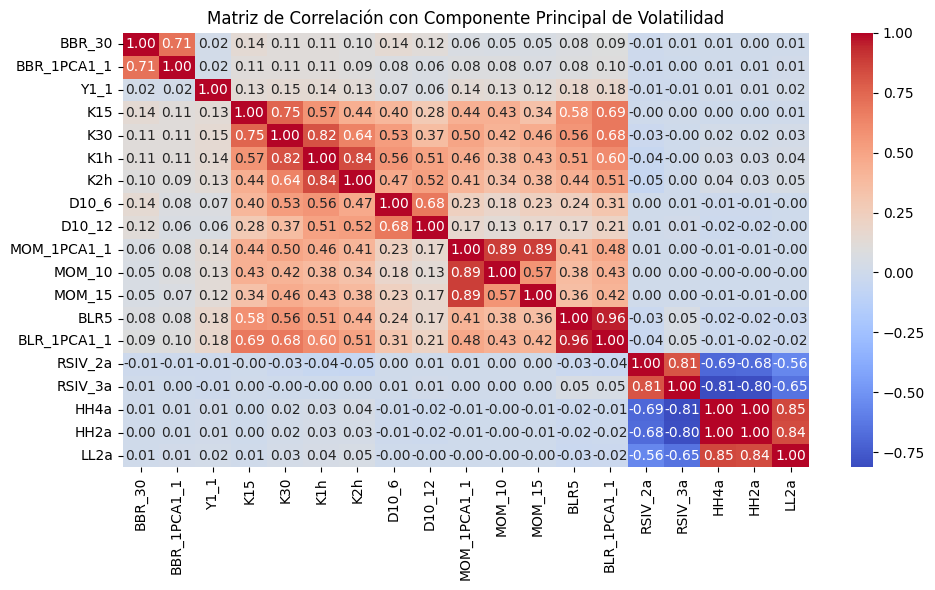

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables
vars = ["BBR_30", 'BBR_1PCA1_1', 'Y1_1', 'K15', 'K30', 'K1h', 'K2h', 'D10_6',
            'D10_12', 'MOM_1PCA1_1','MOM_10', 'MOM_15', "BLR5", "BLR_1PCA1_1", "RSIV_2a", "RSIV_3a", 'HH4a', 'HH2a', "LL2a"]
# Calcular la matriz de correlación
correlation_matrix = mf1[vars].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación con Componente Principal de Volatilidad")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
vars = ["BBR_30", 'BBR_1PCA1_1', 'Y1_1', 'K15', 'K30', 'K1h', 'K2h', 'D10_6',
            'D10_12', 'MOM_1PCA1_1','MOM_10', 'MOM_15', "BLR5", "BLR_1PCA1_1", "RSIV_2a", "RSIV_3a", 'HH4a', 'HH2a', "LL2a"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf1[variables].fillna(0)
y = mf1['K10'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


  Variable  Mutual Information
0    D10_6            0.123059
2   D10_12            0.074179
4   D10_24            0.043963
1    D15_6            0.035593
6   D10_48            0.028060
3   D15_12            0.026086
7   D15_48            0.023833
5   D15_24            0.023659
9   D15_96            0.022584
8   D10_96            0.018527


In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Variables predictoras (sin incluir Close)
X = mf1[["VB_PCA", 'MarketEnergy', 'VoE_PCA', "VVo_PCA", "C_PCA"]].copy()

# Eliminar filas con NaN o inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Agregar constante
X = add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


In [ ]:
X = mf1[[ "VB_PCA", 'MarketEnergy',  "VVo_PCA", "C_PCA"]].dropna()
y = mf1.loc[X.index, 'Close']  # Para alinear índices

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [ ]:
columnas_p1 = [
    'Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume',
    'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume',
    'DOGE_Close', 'DOGE_Volume', 'VoM', 'DominanciaBTC', 'Max 30min', 'Min 30min',
    'Max 1h', 'Min 1h', 'Max 2h', 'Min 2h', 'Max 4h', 'Min 4h', 'Max 6h',
    'Min 6h', 'Max 12h', 'Min 12h', 'Max 1d', 'Min 1d', 'Max 3d', 'Min 3d',
    'Max 5d', 'Min 5d', 'Max 1s', 'Min 1s', 'Max 2s', 'Min 2s', 'Max 1m',
    'Min 1m', 'Max 2m', 'Min 2m', 'Max 6m', 'Min 6m', 'VB5m',  'VB10m', 'VB15m',
    'VB1h', 'VB2h', 'VB6h', 'VB12h', 'VB1d', 'VB3d',    'VB1s', 'EMA_2m', 'EMA_5m',
    'EMA_10m',     'EMA_15m', 'EMA_30m',    'EMA_1h', 'EMA_6h', 'MACD_5_2',
    'Señal_5_2', 'MACD_2_10',    'MACD_2_15', 'Señal_2_15',     'MACD_2_30',
    'Señal_2_30',  'MACD_10_30',    'Señal_10_30',  'MACD_1h_6h', 'Señal_1h_6h',]

P1 = mf1[columnas_p1].copy()

In [ ]:
P1 = P1.astype({col: "float32" for col in P1.select_dtypes(include=["float64"]).columns})
correlation_matrix = P1.select_dtypes(include=['float32']).corr()
Close_correlation_matrix = correlation_matrix[["Close"]]
Close_correlation_matrix

In [ ]:
columnas_p2 = [
    'Datetime', 'Close', 'P_MC', 'VoV2m', 'VoV5m', 'VoV10m', 'VoV15m', 'VoV1h',
    'VoV2h', 'VoV6h', 'VoV12h', 'VoV1d', 'VoV3d', 'VoV1s', 'Vol Max 10min',
    'Vol Min 10min', 'Vol Max 15min', 'Vol Min 15min', 'Vol Max 30min', 'Vol Min 30min',
    'Vol Max 1h', 'Vol Min 1h', 'Vol Max 2h', 'Vol Min 2h', 'Vol Max 4h',
    'Vol Min 4h', 'Vol Max 6h', 'Vol Min 6h', 'Vol Max 12h', 'Vol Min 12h',
    'Vol Max 1d', 'Vol Min 1d', 'Vol Max 3d', 'Vol Min 3d', 'Vol Max 5d',
    'Vol Min 5d', 'Vol Max 1s', 'Vol Min 1s', 'Vol Max 2s', 'Vol Min 2s',
    'Vol Max 1m', 'Vol Min 1m', 'Vol Max 2m', 'Vol Min 2m', 'Vol Max 6m',
    'Vol Min 6m', 'VoSD_2', 'VVo2m', 'VoSD_5', 'VVo5m', 'VoSD_10', 'VVo10m',
    'VoSD_15', 'VVo15m', 'VoSD_60', 'VVo1h', 'VoSD_120', 'VVo2h', 'VoSD_360',
    'VVo6h', 'VoSD_720', 'VVo12h', 'VoSD_1440', 'VVo1d', 'VoSD_4320', 'VVo3d',
    'VoSD_10080', 'VVo1s', 'VoC2m', 'VoC5m', 'VoC10m', 'VoC15m', 'VoC1h', 'VoC2h',
    'VoC6h', 'VoC12h', 'VoC1d', 'VoC3d', 'VoC1s', 'QBpc', 'QSD_2', 'VQ2m', 'QSD_5',
    'VQ5m', 'QSD_10', 'VQ10m', 'QSD_15', 'VQ15m', 'QSD_60', 'VQ1h', 'QSD_120',
    'VQ2h', 'QSD_360', 'VQ6h', 'QSD_720', 'VQ12h', 'QSD_1440', 'VQ1d', 'QSD_4320',
    'VQ3d', 'QSD_10080', 'VQ1s', 'c2', 'Close_EUR', 'Close_USD_x', 'Close_USD_y']

P2 = mf1[columnas_p2].copy()

In [ ]:
P2 = P2.astype({col: "float32" for col in P2.select_dtypes(include=["float64"]).columns})
correlation_matrix = P2.select_dtypes(include=['float32']).corr()
Close_correlation_matrix = correlation_matrix[["Close"]]
Close_correlation_matrix

DLMF1

In [ ]:
columnas_p3 = [
    'Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume',
    'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume',
    'DOGE_Close', 'DOGE_Volume', 'VoM', 'DominanciaBTC', 'Max 30min', 'Min 30min',
    'Max 1h', 'Min 1h', 'Max 2h', 'Min 2h', 'Max 4h', 'Min 4h', 'Max 6h',
    'Min 6h', 'Max 12h', 'Min 12h', 'Max 1d', 'Min 1d', 'Max 3d', 'Min 3d',
    'Max 5d', 'Min 5d', 'Max 1s', 'Min 1s', 'Max 2s', 'Min 2s', 'Max 1m',
    'Min 1m', 'Max 2m', 'Min 2m', 'Max 6m', 'Min 6m', 'VB5m',  'VB10m', 'VB15m',
    'VB1h', 'VB2h', 'VB6h', 'VB12h', 'VB1d', 'VB3d',    'VB1s', 'EMA_2m', 'EMA_5m',
    'EMA_10m',     'EMA_15m', 'EMA_30m',    'EMA_1h', 'EMA_6h', 'MACD_5_2',
    'Señal_5_2', 'MACD_2_10',    'MACD_2_15', 'Señal_2_15',     'MACD_2_30',
    'Señal_2_30',  'MACD_10_30',    'Señal_10_30',  'MACD_1h_6h', 'Señal_1h_6h',]

P3 = dlmf1[columnas_p3].copy()

In [ ]:
P3 = P3.astype({col: "float32" for col in P3.select_dtypes(include=["float64"]).columns})
correlation_matrix = P3.select_dtypes(include=['float32']).corr()
Close_correlation_matrix = correlation_matrix[["Close"]]
Close_correlation_matrix

In [ ]:
columnas_p4 = [
    'Datetime', 'Close', 'P_MC', 'VoV2m', 'VoV5m', 'VoV10m', 'VoV15m', 'VoV1h',
    'VoV2h', 'VoV6h', 'VoV12h', 'VoV1d', 'VoV3d', 'VoV1s', 'Vol Max 10min',
    'Vol Min 10min', 'Vol Max 15min', 'Vol Min 15min', 'Vol Max 30min', 'Vol Min 30min',
    'Vol Max 1h', 'Vol Min 1h', 'Vol Max 2h', 'Vol Min 2h', 'Vol Max 4h',
    'Vol Min 4h', 'Vol Max 6h', 'Vol Min 6h', 'Vol Max 12h', 'Vol Min 12h',
    'Vol Max 1d', 'Vol Min 1d', 'Vol Max 3d', 'Vol Min 3d', 'Vol Max 5d',
    'Vol Min 5d', 'Vol Max 1s', 'Vol Min 1s', 'Vol Max 2s', 'Vol Min 2s',
    'Vol Max 1m', 'Vol Min 1m', 'Vol Max 2m', 'Vol Min 2m', 'Vol Max 6m',
    'Vol Min 6m', 'VoSD_2', 'VVo2m', 'VoSD_5', 'VVo5m', 'VoSD_10', 'VVo10m',
    'VoSD_15', 'VVo15m', 'VoSD_60', 'VVo1h', 'VoSD_120', 'VVo2h', 'VoSD_360',
    'VVo6h', 'VoSD_720', 'VVo12h', 'VoSD_1440', 'VVo1d', 'VoSD_4320', 'VVo3d',
    'VoSD_10080', 'VVo1s', 'VoC2m', 'VoC5m', 'VoC10m', 'VoC15m', 'VoC1h', 'VoC2h',
    'VoC6h', 'VoC12h', 'VoC1d', 'VoC3d', 'VoC1s', 'QBpc', 'QSD_2', 'VQ2m', 'QSD_5',
    'VQ5m', 'QSD_10', 'VQ10m', 'QSD_15', 'VQ15m', 'QSD_60', 'VQ1h', 'QSD_120',
    'VQ2h', 'QSD_360', 'VQ6h', 'QSD_720', 'VQ12h', 'QSD_1440', 'VQ1d', 'QSD_4320',
    'VQ3d', 'QSD_10080', 'VQ1s', 'c2', 'RSFX_USD', 'RSFX_EUR', 'RSFX_CHF']

P4 = dlmf1[columnas_p4].copy()

In [ ]:
P4 = P4.astype({col: "float32" for col in P4.select_dtypes(include=["float64"]).columns})
correlation_matrix = P4.select_dtypes(include=['float32']).corr()
Close_correlation_matrix = correlation_matrix[["Close"]]
Close_correlation_matrix

---

# CVS

---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


SAVE

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/mf1.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
mf1.to_parquet(ruta_guardado, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'mf1' is not defined

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/dlmf1.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
dlmf1.to_parquet(ruta_guardado, index=False)


In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/bin.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
bin.to_parquet(ruta_guardado, index=False)


In [ ]:
# Asegurarse de que el directorio existe y está bien escrito
import os

# Corregimos el path: "MyDrive" (no "MyDrIve")
ruta_csv = '/content/drive/MyDrive/Close.csv'

# Guardar como CSV
Close_correlation_matrix.to_csv(ruta_csv, index=False)

print(f"Archivo guardado exitosamente en: {ruta_csv}")


APERTURA

In [ ]:
bin = pd.read_parquet('/content/drive/MyDrive/bin.parquet')


In [ ]:
mf1 = bin.copy()

In [ ]:
mf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885312 entries, 0 to 885311
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     885312 non-null  datetime64[ns]
 1   BTC_Open     885312 non-null  float64       
 2   BTC_High     885312 non-null  float64       
 3   BTC_Low      885312 non-null  float64       
 4   BTC_Close    885312 non-null  float64       
 5   BTC_Volume   885312 non-null  float64       
 6   ETH_Open     884831 non-null  float64       
 7   ETH_High     884831 non-null  float64       
 8   ETH_Low      884831 non-null  float64       
 9   ETH_Close    884831 non-null  float64       
 10  ETH_Volume   884831 non-null  float64       
 11  USDT_Open    735903 non-null  float64       
 12  USDT_High    735903 non-null  float64       
 13  USDT_Low     735903 non-null  float64       
 14  USDT_Close   735903 non-null  float64       
 15  USDT_Volume  735903 non-null  floa

# DIAS

# Sección nueva

In [ ]:
# API Key y parámetros generales
api_key = "EjsF3b55e_87hI7reA6lHGP9bDuqETeL"
tickers = ["BTC"]
start_date = "2016-01-01"
end_date = "2025-05-27"
limit = 50000

# Headers para autenticación
headers = {
    "Authorization": f"Bearer {api_key}"
}


dataframes = {}

# Bucle para cada ticker
for symbol in tickers:
    print(f"Extrayendo datos de {symbol}...")
    base_url = f"https://api.polygon.io/v2/aggs/ticker/X:{symbol}USD/range/1/hour"
    next_url = f"{base_url}/{start_date}/{end_date}?adjusted=true&sort=asc&limit={limit}&apiKey={api_key}"

    all_data = []

    while next_url:
        response = requests.get(next_url, headers=headers)

        if response.status_code == 200:
            data = response.json()

            if "results" in data:
                all_data.extend(data["results"])

                if "next_url" in data:
                    next_url = data["next_url"]
                    time.sleep(1)
                else:
                    break
            else:
                print(f"No se encontraron más datos para {symbol}.")
                break
        else:
            print(f"Error al obtener datos de {symbol}: {response.status_code}, {response.text}")
            break

    # Convertir a DataFrame con sufijos si hay datos
    if all_data:
        df = pd.DataFrame(all_data)
        df["Datetime"] = pd.to_datetime(df["t"], unit="ms")
        df = df[["Datetime", "o", "h", "l", "c", "v"]]
        df.columns = ["Datetime", f"{symbol}_Open", f"{symbol}_High", f"{symbol}_Low", f"{symbol}_Close", f"{symbol}_Volume"]
        dataframes[symbol] = df
        print(f"{symbol} extraído con éxito. Total de filas: {len(df)}")
    else:
        print(f"No se pudo obtener datos para {symbol}.")

# Unir todos los DataFrames por la columna 'Datetime'
Bon = None
for df in dataframes.values():
    if B is None:
        B = df
    else:
        B = pd.merge(B, df, on="Datetime", how="outer")

# Ordenar por fecha y mostrar info
B = B.sort_values("Datetime").reset_index(drop=True)
B.info()


In [ ]:
# Crear columnas auxiliares con la fecha solamente (sin hora)
B["Date"] = B["Datetime"].dt.date

# Agrupar por fecha para calcular el máximo y mínimo diario
daily_high = B.groupby("Date")["BTC_Close"].max()
daily_low = B.groupby("Date")["BTC_Close"].min()

# Combinar en un nuevo DataFrame
daily_range = pd.DataFrame({
    "High": daily_high,
    "Low": daily_low
})

# Calcular la diferencia porcentual diaria
daily_range["Pct"] = (daily_range["High"] - daily_range["Low"]) / daily_range["Low"]

# Ordenar por la columna 'Pct'
B_Dias = daily_range.sort_values("Pct", ascending=False).reset_index()

In [ ]:
B_Dias.head(100)

In [ ]:
# Crear columnas auxiliares con la fecha solamente (sin hora)
B["Date"] = B["Datetime"].dt.date

# Agrupar por fecha para calcular el máximo y mínimo diario
daily_high = B.groupby("Date")["BTC_Close"].max()
daily_low = B.groupby("Date")["BTC_Close"].min()

# Combinar en un nuevo DataFrame
daily_range = pd.DataFrame({
    "High": daily_high,
    "Low": daily_low
})

# Calcular la diferencia porcentual diaria
daily_range["Pct"] = (daily_range["Low"] - daily_range["High"]) / daily_range["High"]

# Ordenar por la columna 'Pct'
B_Dias = daily_range.sort_values("Pct", ascending=False).reset_index()
B_Dias.head(100)

In [ ]:
B_Dias.tail(100)

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(B["Datetime"], B["BTC_Close"], label="Close", color="blue")
plt.title("Serie de Tiempo - Close")
plt.xlabel("Fecha")
plt.ylabel("Precio Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


MESES

In [ ]:
import matplotlib.pyplot as plt

start_date = "2025-04-03 00:00"
end_date = "2025-04-03 18:00"
bon_filtrado = B[(B["Datetime"] >= start_date) & (bon["Datetime"] <= end_date)].copy()


# 4. Graficar
plt.figure(figsize=(14, 6))
plt.plot(bon_filtrado["Datetime"], bon_filtrado["c"], label="c", linewidth=1)

# Agregar cada EMA
for label in ema_spans:
    plt.plot(bon_filtrado["Datetime"], bon_filtrado[f"EMA_{label}"], label=f"EMA {label}", linestyle='--')

plt.title("Serie de Tiempo - Close con EMAs")
plt.xlabel("Fecha")
plt.ylabel("Precio Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# JUEGUIÑOS

In [ ]:
# API Key y parámetros generales
api_key = "EjsF3b55e_87hI7reA6lHGP9bDuqETeL"
tickers = ["BTC"]
start_date = "2016-01-01"
end_date = "2025-05-27"
limit = 50000

# Headers para autenticación
headers = {
    "Authorization": f"Bearer {api_key}"
}


dataframes = {}

# Bucle para cada ticker
for symbol in tickers:
    print(f"Extrayendo datos de {symbol}...")
    base_url = f"https://api.polygon.io/v2/aggs/ticker/X:{symbol}USD/range/1/minute"
    next_url = f"{base_url}/{start_date}/{end_date}?adjusted=true&sort=asc&limit={limit}&apiKey={api_key}"

    all_data = []

    while next_url:
        response = requests.get(next_url, headers=headers)

        if response.status_code == 200:
            data = response.json()

            if "results" in data:
                all_data.extend(data["results"])

                if "next_url" in data:
                    next_url = data["next_url"]
                    time.sleep(1)
                else:
                    break
            else:
                print(f"No se encontraron más datos para {symbol}.")
                break
        else:
            print(f"Error al obtener datos de {symbol}: {response.status_code}, {response.text}")
            break

    # Convertir a DataFrame con sufijos si hay datos
    if all_data:
        df = pd.DataFrame(all_data)
        df["Datetime"] = pd.to_datetime(df["t"], unit="ms")
        df = df[["Datetime", "o", "h", "l", "c", "v"]]
        dataframes[symbol] = df
        print(f"{symbol} extraído con éxito. Total de filas: {len(df)}")
    else:
        print(f"No se pudo obtener datos para {symbol}.")

# Unir todos los DataFrames por la columna 'Datetime'
bon = None
for df in dataframes.values():
    if bon is None:
        bon = df
    else:
        bon = pd.merge(bon, df, on="Datetime", how="outer")

# Ordenar por fecha y mostrar info
bon = bon.sort_values("Datetime").reset_index(drop=True)
bon.info()


In [ ]:
import matplotlib.pyplot as plt

start_date = "2022-03-16 00:00"
end_date = "2022-03-16 18:00"
bon_filtrado = bon[(bon["Datetime"] >= start_date) & (bon["Datetime"] <= end_date)].copy()

# 2. Diccionario con spans en minutos
ema_spans = {
    "2m": 2,
    "3m": 3,
    "4m": 4,
    "5m": 5,
    "10m": 10,
    "15m": 15,
    "30m": 30,
    "45m": 45,
    "1h": 60,
    "2h": 120,
    "3h": 180,
    "6h": 360,

}

# 3. Calcular todas las EMAs
for label, span in ema_spans.items():
    bon_filtrado[f"EMA_{label}"] = bon_filtrado["c"].ewm(span=span, adjust=False).mean()

# 4. Graficar
plt.figure(figsize=(14, 6))
plt.plot(bon_filtrado["Datetime"], bon_filtrado["c"], label="c", linewidth=1)

# Agregar cada EMA
for label in ema_spans:
    plt.plot(bon_filtrado["Datetime"], bon_filtrado[f"EMA_{label}"], label=f"EMA {label}", linestyle='--')

plt.title("Serie de Tiempo - Close con EMAs")
plt.xlabel("Fecha")
plt.ylabel("Precio Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
mf1.info()

# JUEGUIÑOS MF1

In [ ]:
mf1.info()

In [ ]:
import matplotlib.pyplot as plt

start_date = "2025-04-03 00:00"
end_date = "2025-04-03 18:00"
mf1_filtrado = mf1[(mf1["Datetime"] >= start_date) & (mf1["Datetime"] <= end_date)].copy()

# 2. Diccionario con spans en minutos
ema_spans = {
    "2m": 2,
    "3m": 3,
    "4m": 4,
    "5m": 5,
    "10m": 10,
    "15m": 15,
    "30m": 30,
    "45m": 45,
    "1h": 60,
    "2h": 120,
    "3h": 180,
    "6h": 360,

}

# 3. Calcular todas las EMAs
for label, span in ema_spans.items():
    mf1_filtrado[f"EMA_{label}"] = mf1_filtrado["c"].ewm(span=span, adjust=False).mean()

# 4. Graficar
plt.figure(figsize=(14, 6))
plt.plot(mf1_filtrado["Datetime"], mf1_filtrado["c"], label="c", linewidth=1)

# Agregar cada EMA
for label in ema_spans:
    plt.plot(mf1_filtrado["Datetime"], mf1_filtrado[f"EMA_{label}"], label=f"EMA {label}", linestyle='--')

plt.title("Serie de Tiempo - Close con EMAs")
plt.xlabel("Fecha")
plt.ylabel("Precio Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



VB


In [ ]:
mf1.info()

TIMER

In [ ]:
import matplotlib.pyplot as plt

# Fechas de inicio y fin
start_date = "2024-12-01 00:00"
end_date = "2024-12-01 18:00"

# Filtrar el DataFrame
mf1_filtered = mf1[(mf1["Datetime"] >= start_date) & (mf1["Datetime"] <= end_date)]

# Columnas a graficar
columns_to_plot = ["Close"]

# Crear el gráfico
plt.figure(figsize=(16, 8))
for col in columns_to_plot:
    if col == "Close":
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1.2, linestyle='--')
    else:
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1)

plt.title("Close (línea punteada) y Volatilidades entre 2025-04-03 00:00 y 2025-04-03 18:00")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Fechas de inicio y fin
start_date = "2024-12-01 00:00"
end_date = "2024-12-01 18:00"

# Filtrar el DataFrame
mf1_filtered = mf1[(mf1["Datetime"] >= start_date) & (mf1["Datetime"] <= end_date)]

# Columnas a graficar
columns_to_plot = ["Close", "VB2m", "VB5m", "VB10m", "VB15m", "VB1h", "VB2h", "VB6h", "VB12h", "VB1d", "VB3d", "VB1s"]

# Crear el gráfico
plt.figure(figsize=(16, 8))
for col in columns_to_plot:
    if col == "Close":
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1.2, linestyle='--')
    else:
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1)

plt.title("Close (línea punteada) y Volatilidades entre 2025-04-03 00:00 y 2025-04-03 18:00")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Fechas de inicio y fin
start_date = "2024-12-01 00:00"
end_date = "2024-12-01 18:00"

# Filtrar el DataFrame
mf1_filtered = mf1[(mf1["Datetime"] >= start_date) & (mf1["Datetime"] <= end_date)]

# Columnas a graficar
columns_to_plot = [ "VoV2m", "VoV5m",  "VoV1h", "VoV10m", "VoV15m", "VoV1h", "VoV2h", "VoV6h", "VoV1d", "VoV3d", "VoV1s"]

# Crear el gráfico
plt.figure(figsize=(16, 8))
for col in columns_to_plot:
    if col == "VoV2m":
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1.2, linestyle='--')
    else:
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1)

plt.title("Close (línea punteada) y Volatilidades entre 2025-04-03 00:00 y 2025-04-03 18:00")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Fechas de inicio y fin
start_date = "2024-12-01 00:00"
end_date = "2024-12-01 18:00"

# Filtrar el DataFrame
mf1_filtered = mf1[(mf1["Datetime"] >= start_date) & (mf1["Datetime"] <= end_date)]

# Columnas a graficar
columns_to_plot = [ "Voc2m", "Voc5m",  "Voc1h", "Voc10m", "Voc15m", "Voc1h", "Voc2h", "Voc6h", "VoC1d", "VoC3d", "VoC1s"]

# Crear el gráfico
plt.figure(figsize=(16, 8))
for col in columns_to_plot:
    if col == "Voc2m":
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1.2, linestyle='--')
    else:
        plt.plot(mf1_filtered["Datetime"], mf1_filtered[col], label=col, linewidth=1)

plt.title("Close (línea punteada) y Volatilidades entre 2025-04-03 00:00 y 2025-04-03 18:00")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mf1["VoC2m"] = np.sqrt( mf1["Close"] *mf1["VVo2m"])
mf1["VoC5m"] = np.sqrt( mf1["Close"] *mf1["VVo5m"])
mf1["VoC10m"] = np.sqrt( mf1["Close"] *mf1["VVo10m"])
mf1["VoC15m"] = np.sqrt( mf1["Close"] *mf1["VVo15m"])
mf1["VoC1h"] = np.sqrt( mf1["Close"] *mf1["VVo1h"])
mf1["VoC2h"] = np.sqrt( mf1["Close"] *mf1["VVo2h"])
mf1["VoC6h"] = np.sqrt( mf1["Close"] *mf1["VVo6h"])
mf1["VoC12h"] = np.sqrt( mf1["Close"] *mf1["VVo12h"])
mf1["VoC1d"] = np.sqrt( mf1["Close"] *mf1["VVo1d"])
mf1["VoC3d"] = np.sqrt( mf1["Close"] *mf1["VVo3d"])
mf1["VoC1s"] = np.sqrt( mf1["Close"] *mf1["VVo1s"])